<div align="center">
  <div style="max-width:800px;margin:40px auto;background-image:url('https://miro.medium.com/v2/resize:fit:1100/format:webp/0*3zniUD4nSJpDMwxO');background-size:cover;background-position:center;border-radius:24px;box-shadow:0 20px 40px rgba(0,0,0,0.5);overflow:hidden;border:1px solid #333;text-align:left;font-family:Arial,Helvetica,sans-serif;position:relative;">
    <div style="padding:80px 45px;background:rgba(0,0,0,0.6);backdrop-filter:blur(4px);color:#ffffff;line-height:1.7;">
      <h2 style="color:#ff4d4d;margin:0 0 25px 0;font-size:2.2rem;font-weight:800;">📊 M5 Sales Data EDA</h2>
      <p style="font-size:1.1rem;color:#f0f0f0;margin-bottom:25px;font-weight:400;">
        This exploratory data analysis (EDA) focuses on the <strong style="color:#ffffff;">M5 sales dataset</strong>, examining historical sales patterns, seasonal trends, and outliers. The goal is to uncover insights that can drive <strong style="color:#ffffff;">accurate forecasting and strategy</strong> for retail sales.
      </p>
      <div style="background:rgba(255,255,255,0.15);border-radius:16px;padding:28px;border:1px solid rgba(255,255,255,0.2);">
        <p style="margin:0 0 15px 0;font-weight:700;color:#ff6b6b;text-transform:uppercase;font-size:0.85rem;letter-spacing:1px;">Key Focus Areas</p>
        <ul style="margin:0;padding-left:20px;color:#e0e0e0;">
          <li><strong style="color:#ffffff;">Seasonal Trends</strong> – Identifying patterns across months and years</li>
          <li><strong style="color:#ffffff;">Promotional Effects</strong> – Analyzing impact of special events and SNAP promotions</li>
          <li><strong style="color:#ffffff;">Outlier Detection</strong> – Spotting unusual spikes or drops in sales</li>
          <li><strong style="color:#ffffff;">State-Level Insights</strong> – Understanding regional variations</li>
        </ul>
      </div>
    </div>
  </div>
</div>


In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib.cm as cm
import matplotlib.colors as colors
import seaborn as sns
import numpy as np
import plotly as px
from geopy.geocoders import Nominatim
from geopy.geocoders import Nominatim
import time
import plotly.express as px
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
import geopandas as gpd
import plotly.graph_objects as go
from IPython.core.display import display, HTML
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms
from matplotlib.patches import ConnectionPatch
from plotly.subplots import make_subplots
import itertools
import math
import re
import io
import base64

from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [12]:
df1=pd.read_csv("/kaggle/input/m5-forecasting-accuracy/calendar.csv")
df1.head()

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1


In [13]:
df=pd.read_csv("/kaggle/input/m5-forecasting-accuracy/sales_train_validation.csv")
df.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,1,0,1,1,2,2,2,4


</div>
<a id="cell-2"></a>

<div style="
    background: linear-gradient(135deg, #e3f2fd, #bbdefb);
    width: 60%;
    margin: 30px auto;
    border-radius: 20px;
    text-align: center;
    box-shadow: 0 6px 12px rgba(33, 150, 243, 0.3);
    color: #0d47a1;
    font-size: 26px;
    padding: 20px 30px;
    font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
    font-weight: bold;
    border: 2px solid #90caf9;
">
First of all, I see a flowery view of the columns.
</div>


EDA --If you don't want to see this episode, go ahead and watch it.

  <a href="#eda" style="
            width:fit-content;
            text-decoration: none; 
            color: #ffffff; 
            background: rgba(255, 255, 255, 0.03); 
            padding: 16px 20px; 
            border-radius: 15px; 
            display: flex; 
            align-items: center; 
            border: 1px solid rgba(255, 255, 255, 0.05);">
            <span style="font-size: 20px; margin-right: 15px; filter: drop-shadow(0 0 5px #00ffddff);">⬇️</span>
            <span style="font-weight: 500; font-size: 15px; letter-spacing: 1px;">CLick</span>
        </a>

<div id="Feature" style="   
    width: 90%; 
    max-width: 450px; 
    margin: 40px auto;
    padding: 25px 15px;
    background: rgba(15, 15, 15, 0.8);
    backdrop-filter: blur(10px);
    border-radius: 16px;
    border: 1px solid rgba(74, 194, 0, 0.4);
    box-shadow: 0 10px 30px rgba(0, 0, 0, 0.5), inset 0 0 15px rgba(74, 194, 0, 0.05);   
    color: #4ac200;
    text-align: center;
    font-family: 'Orbitron', 'Segoe UI', sans-serif; /* استفاده از فونت هندسی‌تر در صورت وجود */
    font-size: clamp(16px, 4vw, 22px);
    font-weight: 900;
    text-transform: uppercase;
    letter-spacing: 4px;
    position: relative;
    overflow: hidden;
    transition: all 0.3s ease;
">
    <div style="position: absolute; top: 0; left: 50%; transform: translateX(-50%); width: 60%; height: 1px; background: linear-gradient(90deg, transparent, #4ac200, transparent);"></div>   
    <span style="text-shadow: 0 0 15px rgba(74, 194, 0, 0.6);">
        Structural Analysis of Item-Level Sales Time Series
    </span>
    <div style="position: absolute; bottom: 5px; right: 10px; font-size: 8px; opacity: 0.5; letter-spacing: 1px;">dataset1</div>
</div>

<div style="
    background: #0B0F13; 
    max-width: 90%; /* تغییر از مقدار ثابت به درصد برای موبایل */
    width: 500px; 
    margin: 40px auto; 
    padding: 25px; /* کمی کاهش پدینگ برای فضای بیشتر در موبایل */
    border-radius: 25px; 
    border: 1px solid rgba(0, 212, 255, 0.2);
    box-shadow: 0 25px 50px rgba(0, 0, 0, 0.5);
    font-family: 'Segoe UI', Roboto, sans-serif;
    box-sizing: border-box; /* برای جلوگیری از بزرگتر شدن باکس از عرض تعیین شده */
">
    <h2 style="
        text-align: center; 
        color: #ffffff; 
        font-size: clamp(20px, 5vw, 26px); /* اندازه فونت متغیر نسبت به اندازه صفحه */
        margin-bottom: 30px; 
        font-weight: 800; 
        letter-spacing: 2px;
        text-transform: uppercase;">
        <span style="border-bottom: 3px solid #00d4ff; padding-bottom: 8px;">columns</span>
    </h2>
    <div style="display: flex; flex-direction: column; gap: 12px;">       
        <a href="#Feature" style="
            text-decoration: none; 
            color: #ffffff; 
            background: rgba(255, 255, 255, 0.03); 
            padding: 14px 18px; 
            border-radius: 15px; 
            display: flex; 
            align-items: center; 
            border: 1px solid rgba(255, 255, 255, 0.05);
            transition: 0.3s; /* اضافه کردن انیمیشن نرم */
        ">
            <span style="font-size: 20px; margin-right: 15px; filter: drop-shadow(0 0 5px #00ffddff);">🏪</span>
            <span style="font-weight: 500; font-size: 15px; letter-spacing: 1px;">id</span>
        </a>
    </div>
</div>

In [4]:
df["id"][0]

'HOBBIES_1_001_CA_1_validation'

<style>
:root {
    --primary: #1abc9c;
    --bg-card: #ffffff;
    --text-dark: #2c3e50;
    --text-light: #576574;
    --code-bg: #1e272e;
}
.shop-style {
    display: flex;
    justify-content: center;
    padding: 10px;
    font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
}
.shop-style .card {
    background: var(--bg-card);
    border-radius: 16px;
    box-shadow: 0 10px 30px rgba(0,0,0,0.08);
    padding: 24px;
    max-width: 500px;
    width: 100%;
    border: 1px solid rgba(0,0,0,0.05);
    transition: all 0.3s ease;
}
.shop-style .card:hover {
    transform: translateY(-5px);
    box-shadow: 0 15px 35px rgba(0,0,0,0.12);
}
.shop-style .title-section {
    display: flex;
    align-items: center;
    margin-bottom: 16px;
    border-left: 4px solid var(--primary);
    padding-left: 12px;
}
.shop-style .title-section h3 {
    margin: 0;
    color: var(--text-dark);
    font-size: 18px;
    text-transform: uppercase;
    letter-spacing: 1px;
}
.shop-style .text {
    font-size: 15px;
    color: var(--text-light);
    line-height: 1.6;
    margin-bottom: 20px;
}
.shop-style .highlight {
    color: var(--primary);
    background: rgba(26, 188, 156, 0.1);
    padding: 2px 6px;
    border-radius: 4px;
    font-weight: 600;
}
.shop-style .code-container {
    position: relative;
    background: var(--code-bg);
    border-radius: 8px;
    padding: 14px;
    overflow: hidden;
}
.shop-style .code-container::before {
    content: "SAMPLE ID";
    position: absolute;
    top: 0;
    right: 0;
    background: var(--primary);
    color: white;
    font-size: 9px;
    padding: 2px 8px;
    border-bottom-left-radius: 8px;
}
.shop-style .card .code {
    font-family: 'Consolas', 'Monaco', monospace;
    color: #00d4ff;
    font-size: 13px;
    white-space: nowrap;
    display: block;
}
</style>
<div class="shop-style">
<div class="card">
<div class="title-section">
<h3>ID Column Definition</h3>
</div>
<div class="text">
The <span class="highlight">ID Column</span> is a composite identifier created by concatenating three specific attributes. It consists of the <span class="highlight">item_id</span>, followed by the <span class="highlight">store_id</span>, and ends with the dataset horizon, such as <span class="highlight">validation</span>, indicating the data belongs to the validation set.
</div>
<div class="code-container">
<code class="code">HOBBIES_1_001_CA_1_validation</code>
</div>
</div>
</div>


<div style="
    background: #0B0F13; 
    max-width: 90%; /* تغییر از مقدار ثابت به درصد برای موبایل */
    width: 500px; 
    margin: 40px auto; 
    padding: 25px; /* کمی کاهش پدینگ برای فضای بیشتر در موبایل */
    border-radius: 25px; 
    border: 1px solid rgba(0, 212, 255, 0.2);
    box-shadow: 0 25px 50px rgba(0, 0, 0, 0.5);
    font-family: 'Segoe UI', Roboto, sans-serif;
    box-sizing: border-box; /* برای جلوگیری از بزرگتر شدن باکس از عرض تعیین شده */
">
    <h2 style="
        text-align: center; 
        color: #ffffff; 
        font-size: clamp(20px, 5vw, 26px); /* اندازه فونت متغیر نسبت به اندازه صفحه */
        margin-bottom: 30px; 
        font-weight: 800; 
        letter-spacing: 2px;
        text-transform: uppercase;">
        <span style="border-bottom: 3px solid #00d4ff; padding-bottom: 8px;">columns</span>
    </h2>
    <div style="display: flex; flex-direction: column; gap: 12px;">       
        <a href="#Feature" style="
            text-decoration: none; 
            color: #ffffff; 
            background: rgba(255, 255, 255, 0.03); 
            padding: 14px 18px; 
            border-radius: 15px; 
            display: flex; 
            align-items: center; 
            border: 1px solid rgba(255, 255, 255, 0.05);
            transition: 0.3s; /* اضافه کردن انیمیشن نرم */
        ">
            <span style="font-size: 20px; margin-right: 15px; filter: drop-shadow(0 0 5px #00ffddff);">🏪</span>
            <span style="font-weight: 500; font-size: 15px; letter-spacing: 1px;">item_id</span>
        </a>
    </div>
</div>

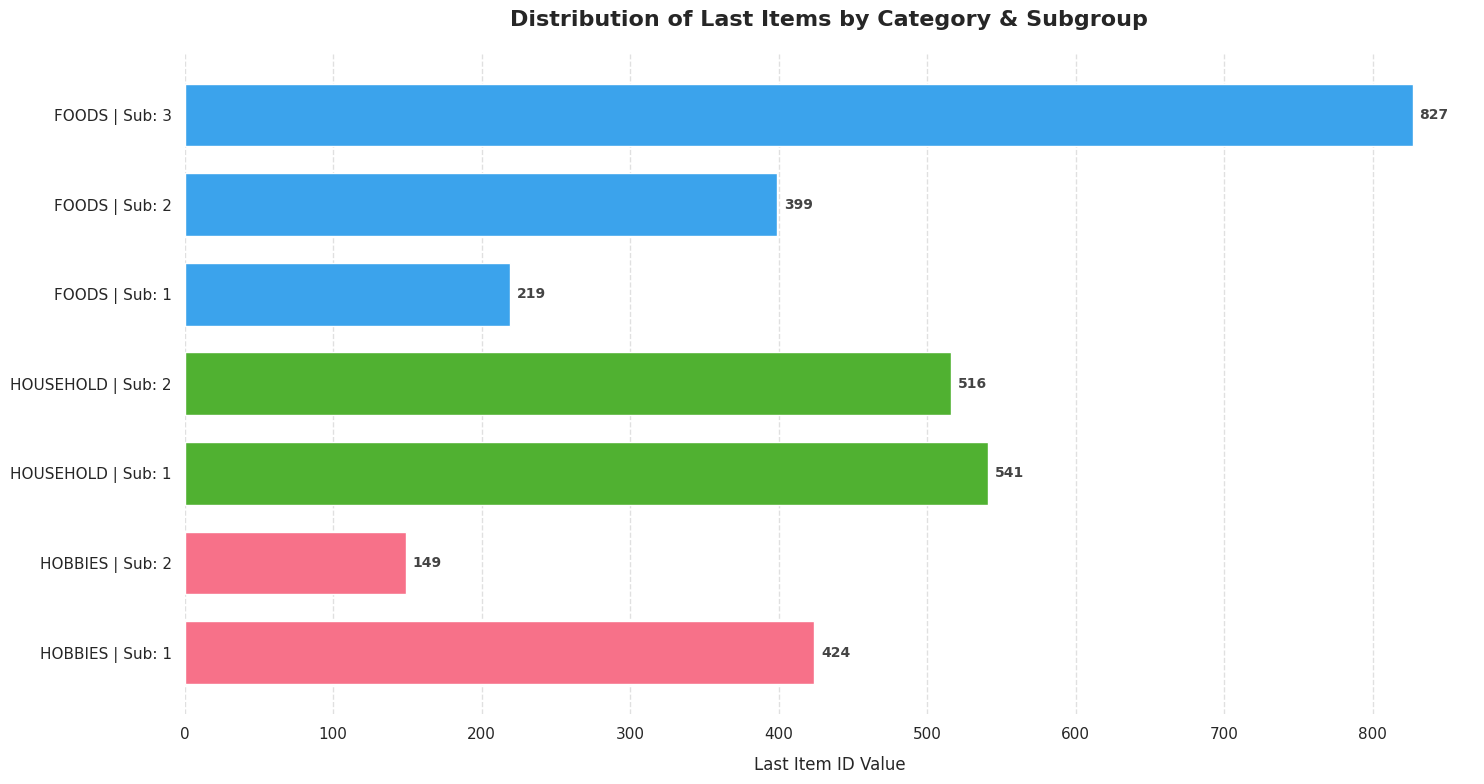

In [5]:

rows = []

for cat in df["cat_id"].unique():
    fo = df[df['cat_id'] == cat].copy()
    
    fo['subgroup'] = fo['item_id'].apply(lambda x: int(re.findall(r'_(\d+)_', x)[0]))
    
    for sub in sorted(fo['subgroup'].unique()):
        sub_df = fo[fo['subgroup'] == sub]
        counts = sub_df['item_id'].value_counts().sort_index()
        
        first_index = counts.index[0]
        last_index = counts.index[-1]
        
        rows.append({
            'cat_id': cat,
            'subgroup': sub,
            'first_item': first_index,
            'last_item': last_index,
        })

result_df = pd.DataFrame(rows)
result_df['last_item'] = result_df['last_item'].str.split('_').str[-1].astype(int)
result_df['first_item'] = result_df['first_item'].str.split('_').str[-1].astype(int)



sns.set_theme(style="whitegrid")
plt.rcParams['font.family'] = 'sans-serif'

fig, ax = plt.subplots(figsize=(15, 8))


colors = sns.color_palette("husl", len(result_df['cat_id'].unique()))
color_map = dict(zip(result_df['cat_id'].unique(), colors))


bars = ax.barh(
    [f"{cat} | Sub: {sg}" for cat, sg in zip(result_df['cat_id'], result_df['subgroup'])],
    result_df['last_item'],
    color=[color_map[c] for c in result_df['cat_id']],
    height=0.7
)


ax.bar_label(bars, padding=5, fontsize=10, fontweight='bold', color='#444444')


ax.set_xlabel('Last Item ID Value', fontsize=12, labelpad=10)
ax.set_title('Distribution of Last Items by Category & Subgroup', fontsize=16, pad=20, fontweight='bold')
ax.xaxis.grid(True, linestyle='--', alpha=0.6)
ax.yaxis.grid(False)

sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()


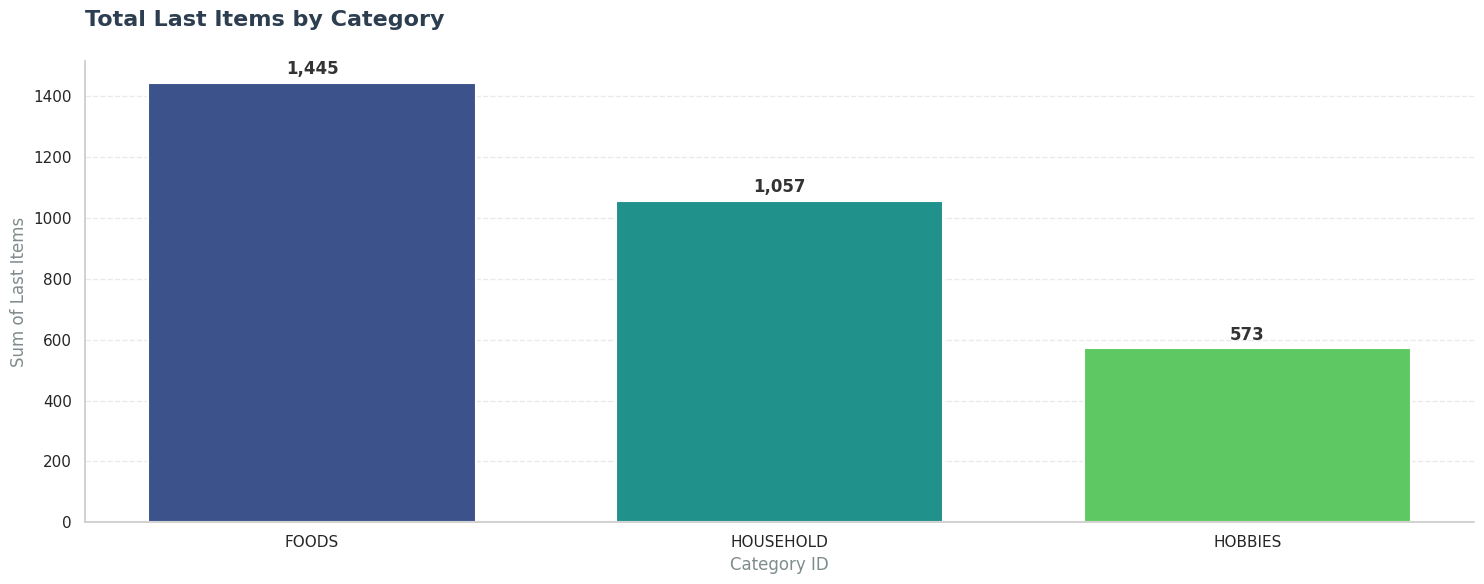

In [6]:

sns.set_style("white")
plt.figure(figsize=(15, 6))


result_df_grouped = result_df.groupby('cat_id').agg({'last_item': 'sum'}).reset_index()
result_df_grouped_sorted = result_df_grouped.sort_values('last_item', ascending=False)


palette = sns.color_palette("viridis", len(result_df_grouped_sorted))

bars = plt.bar(
    result_df_grouped_sorted['cat_id'], 
    result_df_grouped_sorted['last_item'], 
    color=palette,
    edgecolor='white',
    linewidth=1.5,
    width=0.7
)


for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2., 
        height + (max(result_df_grouped_sorted['last_item']) * 0.01),
        f'{int(height):,}', 
        ha='center', va='bottom', 
        fontsize=12, fontweight='600', color='#333333'
    )

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('#cccccc')
ax.spines['bottom'].set_color('#cccccc')


plt.title('Total Last Items by Category', fontsize=16, fontweight='bold', pad=25, loc='left', color='#2c3e50')
plt.ylabel('Sum of Last Items', fontsize=12, color='#7f8c8d')
plt.xlabel('Category ID', fontsize=12, color='#7f8c8d')


plt.grid(axis='y', linestyle='--', alpha=0.4, zorder=0)
ax.set_axisbelow(True)

plt.tight_layout()
plt.show()

<div style="
    background: linear-gradient(135deg, #ffffff 0%, #f3e5f5 100%);
    border: 1px solid rgba(142, 68, 173, 0.2);
    border-left: 8px solid #6a1b9a;
    max-width: 900px;
    width: 90%;
    margin: 30px auto;
    padding: 24px 28px;
    border-radius: 22px;
    box-shadow: 0 20px 40px rgba(106, 27, 154, 0.1), 0 5px 15px rgba(0, 0, 0, 0.05);
    font-family: 'Segoe UI', Roboto, Helvetica, Arial, sans-serif;
    position: relative;
    display: flex;
    align-items: center;
    gap: 18px;
    overflow: hidden;
">

  <!-- glow -->
  <div style="
      position: absolute;
      top: -40px;
      right: -40px;
      width: 120px;
      height: 120px;
      background: radial-gradient(circle, rgba(142, 68, 173, 0.15) 0%, rgba(255, 255, 255, 0) 70%);
      border-radius: 50%;
  "></div>

  <!-- icon -->
  <div style="
      background: #6a1b9a;
      width: 46px;
      height: 46px;
      display: flex;
      align-items: center;
      justify-content: center;
      border-radius: 12px;
      font-size: 22px;
      box-shadow: 0 8px 16px rgba(106, 27, 154, 0.3);
      flex-shrink: 0;
  ">🫙</div>

  <!-- text -->
  <div style="flex: 1;">
    <p style="
        color: #2e003e; 
        font-size: 22px; 
        margin: 0; 
        font-weight: 800; 
        line-height: 1.25;
    ">
    </p>
    <p style="
        color: #8e44ad; 
        font-size: 15px; 
        margin-top: 6px; 
        font-weight: 500;
        letter-spacing: 0.5px;
    ">
      HOBBIES_1_001 — This will make 3 columns: the first is the product category, the second is the category of that category, and the third is the product ID.
    </p>
  </div>
</div>

<style>
@media (max-width: 600px) {
  div[style*="display: flex"][style*="border-left"] {
    flex-direction: column;
    align-items: flex-start;
    padding: 18px 20px;
    gap: 12px;
  }

  div[style*="font-size: 22px"] {
    font-size: 18px !important;
  }

  div[style*="font-size: 15px"] {
    font-size: 13px !important;
    line-height: 1.5;
  }

  div[style*="background: #6a1b9a"] {
    width: 42px;
    height: 42px;
    font-size: 20px;
  }
}
</style>


# dept_id

In [7]:
df["dept_id"].value_counts().sort_index()

dept_id
FOODS_1        2160
FOODS_2        3980
FOODS_3        8230
HOBBIES_1      4160
HOBBIES_2      1490
HOUSEHOLD_1    5320
HOUSEHOLD_2    5150
Name: count, dtype: int64

<style>
.dataset-description {
  font-family: 'Segoe UI', Tahoma, sans-serif;
  line-height: 1.6;
  color: #2d3436;
  max-width: 800px;
  margin: 20px auto;
  padding: 25px;
  background-color: #ffffff;
  border-left: 6px solid #0984e3;
  border-radius: 10px;
  box-shadow: 0 4px 6px rgba(0,0,0,0.1);
}
.dataset-description h2 { color: #0984e3; margin-bottom: 15px; }
.dataset-description h3 { color: #636e72; margin-top: 20px; }
.dataset-description ul { margin-left: 25px; }
.dataset-description li { margin-bottom: 10px; }
</style>

<div class="dataset-description">
  <h2>Product Dataset Overview</h2>
  <p>
    This dataset contains hierarchical information regarding available products, structured across multiple levels of categorization.
  </p>

  <h3>Categorization Structure:</h3>
  <ul>
    <li><strong>cat_id:</strong> Represents the primary product category. For example, the <em>FOODS</em> category is divided into:
      <ul>
        <li>Category 1: Dry Goods</li>
        <li>Category 2: Beverages</li>
        <li>Category 3: Refrigerated Products</li>
      </ul>
    </li>
    <li><strong>subgroup / dept_id:</strong> These columns represent the internal hierarchy and departments within each primary category.</li>
    <li><strong>item_id / first_item / last_item:</strong> Unique identifiers for each product, used to organize and sequence items within their respective subgroups.</li>
  </ul>

  <h3>Key Considerations:</h3>
  <ul>
    <li>All categorical columns (<em>item_id, dept_id, cat_id</em>) offer different granularities of the product hierarchy.</li>
    <li>These classifications enable multi-level analysis, from broad categories down to specific product IDs.</li>
  </ul>
</div>


# cat_id

In [8]:
df['cat_id'].value_counts()

cat_id
FOODS        14370
HOUSEHOLD    10470
HOBBIES       5650
Name: count, dtype: int64

<div style="
  display: flex;
  flex-wrap: wrap;
  gap: 16px;
  font-family: Arial, sans-serif;
">
  <!-- FODS -->
  <div style="
    flex: 1 1 250px;
    border-radius: 12px;
    padding: 16px;
    background: #e3f2fd;
    border-left: 6px solid #1e88e5;
  ">
    <h3 style="margin-top:0; color:#1e88e5;">FOODS</h3>
    <p style="margin:0; color:#333;">
      Category of food products
    </p>
    <p style="font-size:13px; color:#555; margin-top:8px;">
      Includes all food items sold in stores
    </p>
  </div>
  <!-- HOUSEHOLD -->
  <div style="
    flex: 1 1 250px;
    border-radius: 12px;
    padding: 16px;
    background: #e8f5e9;
    border-left: 6px solid #43a047;
  ">
    <h3 style="margin-top:0; color:#2e7d32;">HOUSEHOLD</h3>
    <p style="margin:0; color:#333;">
      Category of household consumables
    </p>
    <p style="font-size:13px; color:#555; margin-top:8px;">
      Daily-use household products
    </p>
  </div>
  <!-- HOBBIES -->
  <div style="
    flex: 1 1 250px;
    border-radius: 12px;
    padding: 16px;
    background: #fff3e0;
    border-left: 6px solid #fb8c00;
  ">
    <h3 style="margin-top:0; color:#ef6c00;">HOBBIES</h3>
    <p style="margin:0; color:#333;">
      Category of non-food and leisure products
    </p>
    <p style="font-size:13px; color:#555; margin-top:8px;">
      Includes entertainment, hobby, and leisure items
    </p>
  </div>
</div>
<p style="font-size:12px; color:#666; margin-top:14px; font-family: Arial;">
These three are the official M5 dataset categories, directly defined in the <code>cat_id</code> column.
</p>


--------------------------------------------------------------------------------------------------------------------------------------------

<div class="dataset-description">
  <h2>Regional & Store-Level Sales Data</h2>
  <p>
    The dataset features two columns with similar naming conventions but distinct functions. One column serves as a <strong>Regional Classification</strong>, utilizing numerical values to identify different regions across the United States.
  </p>

  <h3>Store Hierarchy & Granularity:</h3>
  <ul>
    <li><strong>Store Identifiers:</strong> In states like <strong>CA (California)</strong>, the data is divided into four distinct categories, each representing an independent retail store.</li>
    <li><strong>Data Depth:</strong> For every individual store, there are <strong>3,049 daily sales records</strong>. This provides a complete historical performance log.</li>
    <li><strong>Analytical Potential:</strong> This granular structure is ideal for high-precision store-level analysis and the development of robust <span style="color:#c0392b;font-weight:700">Time-Series Forecasting</span> models.</li>
  </ul>
</div>

<style>
.dataset-description {
  font-family: 'Segoe UI', Arial, sans-serif;
  line-height: 1.7;
  color: #2f3640;
  max-width: 850px;
  margin: 20px auto;
  padding: 25px;
  background: #ffffff;
  border-right: 6px solid #c0392b; /* Changed to right-aligned for consistent UI if mixing RTL/LTR */
  border-radius: 12px;
  box-shadow: 0 10px 25px rgba(0,0,0,0.05);
}
.dataset-description h2 { color: #2d3436; margin-top: 0; }
.dataset-description h3 { color: #c0392b; margin-top: 20px; }
.dataset-description ul { padding-left: 20px; }
.dataset-description li { margin-bottom: 12px; }
</style>

# store_id

In [9]:
from IPython.display import HTML

states = df["state_id"].unique()

html = """
<style>
    @import url('https://fonts.googleapis.com/css2?family=Orbitron:wght@400;700&display=swap');
    
    .main-container {
        background: #0f0c29;
        background: linear-gradient(to right, #24243e, #302b63, #0f0c29);
        padding: 40px;
        border-radius: 30px;
        font-family: 'Segoe UI', Roboto, sans-serif;
    }
    
    .state-section {
        margin-bottom: 50px;
    }
    
    .state-title {
        color: #00d2ff;
        font-family: 'Orbitron', sans-serif;
        font-size: 2.5em;
        text-transform: uppercase;
        letter-spacing: 5px;
        text-shadow: 0 0 15px rgba(0, 210, 255, 0.6);
        margin-bottom: 20px;
        border-bottom: 1px solid rgba(255,255,255,0.1);
    }
    
    .grid {
        display: flex;
        flex-wrap: wrap;
        gap: 20px;
    }
    
    .card {
        background: rgba(255, 255, 255, 0.05);
        backdrop-filter: blur(10px);
        border: 1px solid rgba(255, 255, 255, 0.1);
        padding: 20px;
        border-radius: 20px;
        min-width: 180px;
        transition: all 0.4s cubic-bezier(0.175, 0.885, 0.32, 1.275);
        cursor: pointer;
    }
    
    .card:hover {
        background: rgba(255, 255, 255, 0.15);
        transform: scale(1.1) rotate(2deg);
        box-shadow: 0 15px 30px rgba(0,0,0,0.5);
        border-color: #ff0080;
    }
    
    .store-name {
        display: block;
        color: #aaa;
        font-size: 0.8em;
        text-transform: uppercase;
        margin-bottom: 8px;
    }
    
    .store-id {
        color: #fff;
        font-size: 1.4em;
        font-weight: bold;
    }
    
    .count-value {
        display: block;
        margin-top: 10px;
        font-size: 1.8em;
        font-weight: 800;
        background: linear-gradient(to right, #ff0080, #ff8c00);
        -webkit-background-clip: text;
        -webkit-text-fill-color: transparent;
    }
</style>
<div class="main-container">
"""

for state in states:
    html += f'<div class="state-section"><h2 class="state-title">{state}</h2>'
    counts = df[df["state_id"]==state]["store_id"].value_counts().sort_index()
    html += '<div class="grid">'
    
    for store, count in counts.items():
        html += f"""
        <div class="card">
            <span class="store-name">Registry Unit</span>
            <span class="store-id">{store}</span>
            <span class="count-badge">
                <span class="count-value">{count:,}</span>
                <small style="color:#666; font-size:0.6em;">DAILY RECORDS</small>
            </span>
        </div>
        """
    html += '</div></div>'

html += "</div>"
display(HTML(html))

# state_id

In [10]:
df["state_id"].value_counts()

state_id
CA    12196
TX     9147
WI     9147
Name: count, dtype: int64

In [11]:
from IPython.core.display import display, HTML

display(HTML('''
<style>
.tag-container {
    display: flex;
    flex-wrap: wrap;
    gap: 10px;
    justify-content: center;
    text-align: center;
    margin-top: 20px;
}
.tag {
    background: black; 
    color: white;
    padding: 8px 14px;
    border-radius: 12px;
    font-weight: bold;
    box-shadow: 0 2px 5px rgba(0,0,0,0.2);
    transition: transform 0.2s;
}
.tag:hover {
    transform: scale(1.1);
}
</style>

<div class="tag-container">
  <div class="tag">CA → California</div>
  <div class="tag">TX → Texas</div>
  <div class="tag">WI → Wisconsin</div>
</div>
'''))


In [12]:

display(HTML('''
<style>
.report-container {
    font-family: Tahoma, Arial, sans-serif;
    line-height: 1.7;
    color: black;
    max-width: 800px;
    margin: 20px auto;
    background-color: #fff;
    padding: 25px 30px;
    border-radius: 12px;
    box-shadow: 0 4px 15px rgba(0,0,0,0.1);
    border: 1px solid #ddd;
}
.report-container p {
    margin-bottom: 18px;
    text-align: justify;
}
strong {
    color: #1a73e8;
}
</style>

<div class="report-container">
  <p>Now we come to the columns that start with the letter <strong>D</strong> followed by a number. At first glance, it is clear that these columns represent the daily sales, starting from day one and continuing up to day 1913, covering over 5 years of daily sales data. Each column corresponds to a single day of sales. Next, these columns are separated from the main table to make data analysis and processing easier and more organized.</p>
</div>
'''))


In [14]:
day=df.iloc[:,6:]
day.head()


,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,0,0,0,0,0,0,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,0,0,0,0,0,0,0,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,0,0,0,0,0,0,0,0,0,0,...,2,1,1,0,1,1,2,2,2,4


یه روز رو باز کنیم ببینم داخلش چطوریه 

In [14]:
df["d_1"].describe()

count    30490.000000
mean         1.070220
std          5.126689
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        360.000000
Name: d_1, dtype: float64

In [15]:
df["d_1"].value_counts().sort_index().head(5)

d_1
0    23511
1     2385
2     1313
3      881
4      599
Name: count, dtype: int64

<div style="font-family:Arial, sans-serif;font-size:14px;line-height:1.9;color:#2f3640;background:rgba(255,255,255,0.95);padding:20px 22px;border-radius:16px;box-shadow:0 10px 22px rgba(0,0,0,0.06);max-width:900px;margin:20px auto" dir="ltr">

  <p style="margin:0 0 10px 0">
    <b>Mean = 1.07</b> → This value is misleading because the distribution is
    heavily <b>zero-inflated</b>, making the mean statistically weak and
    analytically unreliable.
  </p>

  <p style="margin:0 0 10px 0">
    <b>Std = 5.12</b> → The standard deviation is several times larger than the mean,
    indicating extreme dispersion and the presence of
    <span style="color:#c0392b;font-weight:700;">outliers</span>.
  </p>

  <p style="margin:0 0 10px 0">
    <b>75% of observations have zero sales</b> → This severely skews the distribution
    and violates normality assumptions.
  </p>

  <p style="margin:0">
    <b>Median = 0</b> → The distribution is strongly
    <span style="color:#c0392b;font-weight:700;">right-skewed</span>,
    confirming that the vast majority of items had no sales on this day.
  </p>

</div>


In [16]:
flags = []

for i in day.columns:
    s = df[i]
    desc = s.describe()

    cv = desc["std"] / (desc["mean"] + 1e-6)
    zero_ratio = (s == 0).mean()

    Q1, Q3 = s.quantile([0.25, 0.75])
    IQR = Q3 - Q1
    outlier_ratio = ((s < Q1 - 1.5*IQR) | (s > Q3 + 1.5*IQR)).mean()

    if cv > 2 and outlier_ratio > 0.05 and zero_ratio < 0.7:
        flags.append(i)

In [17]:
display(len(flags))

1160

In [18]:
outlier=day[flags].head()

<p style="font-family:Arial, sans-serif;font-size:14px;line-height:1.9;color:#2f3640;background:rgba(255,255,255,0.95);padding:18px 20px;border-radius:14px;box-shadow:0 8px 18px rgba(0,0,0,0.06);max-width:900px;margin:20px auto" dir="ltr">
  These values are highly likely to contain <b>outliers</b>.
  A detailed investigation will be conducted in the next analysis section
  to quantify their impact on downstream results.
</p>


<div id="Feature" style="   
    width: 90%; 
    max-width: 450px; 
    margin: 40px auto;
    padding: 25px 15px;
    background: rgba(15, 15, 15, 0.8);
    backdrop-filter: blur(10px);
    border-radius: 16px;
    border: 1px solid rgba(74, 194, 0, 0.4);
    box-shadow: 0 10px 30px rgba(0, 0, 0, 0.5), inset 0 0 15px rgba(74, 194, 0, 0.05);   
    color: #4ac200;
    text-align: center;
    font-family: 'Orbitron', 'Segoe UI', sans-serif; /* استفاده از فونت هندسی‌تر در صورت وجود */
    font-size: clamp(16px, 4vw, 22px);
    font-weight: 900;
    text-transform: uppercase;
    letter-spacing: 4px;
    position: relative;
    overflow: hidden;
    transition: all 0.3s ease;
">
    <div style="position: absolute; top: 0; left: 50%; transform: translateX(-50%); width: 60%; height: 1px; background: linear-gradient(90deg, transparent, #4ac200, transparent);"></div>   
    <span style="text-shadow: 0 0 15px rgba(74, 194, 0, 0.6);">
Exploratory Analysis of Temporal & Event-Based Features
    </span>
    <div style="position: absolute; bottom: 5px; right: 10px; font-size: 8px; opacity: 0.5; letter-spacing: 1px;">dataset2</div>
</div>

In [19]:
df1.head()

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1


<div style="max-width:700px;background:#ffffff;border-radius:12px;padding:24px 28px;box-shadow:0 8px 20px rgba(0,0,0,0.08);border-left:6px solid #4f46e5;margin:24px auto;font-family:Arial, sans-serif;direction:ltr;">

  <h2 style="margin:0 0 16px 0;font-size:20px;color:#1f2937;">
    Temporal Features — Second Dataset
  </h2>

  <p style="font-size:15px;line-height:1.9;color:#374151;margin-bottom:16px;">
    The second dataset contains <strong>14 columns</strong>, a subset of which
    represents calendar and temporal information. These features are critical
    for capturing trends, seasonal patterns, and time-dependent behavior.
  </p>

  <div>
    <span style="display:inline-block;background:#eef2ff;color:#4338ca;padding:6px 12px;border-radius:8px;font-size:14px;margin:4px;">date</span>
    <span style="display:inline-block;background:#eef2ff;color:#4338ca;padding:6px 12px;border-radius:8px;font-size:14px;margin:4px;">wm_yr_wk</span>
    <span style="display:inline-block;background:#eef2ff;color:#4338ca;padding:6px 12px;border-radius:8px;font-size:14px;margin:4px;">wday</span>
    <span style="display:inline-block;background:#eef2ff;color:#4338ca;padding:6px 12px;border-radius:8px;font-size:14px;margin:4px;">month</span>
    <span style="display:inline-block;background:#eef2ff;color:#4338ca;padding:6px 12px;border-radius:8px;font-size:14px;margin:4px;">year</span>
  </div>

</div>


<div style="max-width:900px;margin:24px auto;font-family:Arial, sans-serif;direction:ltr;">

  <div style="background:#ffffff;border-radius:14px;padding:22px 26px;box-shadow:0 8px 22px rgba(0,0,0,0.08);border-left:6px solid #4f46e5;margin-bottom:20px;">
    <h3 style="margin:0 0 12px 0;font-size:18px;color:#1f2937;">
      Weekly Features
    </h3>
    <p style="margin:0;font-size:15px;line-height:1.9;color:#374151;">
      The <strong>wday</strong> column represents the day of the week for each observation.
      It is used to capture recurring weekly patterns and differences in sales behavior
      across weekdays.
    </p>
    <div style="margin-top:14px;">
      <span style="display:inline-block;background:#eef2ff;color:#4338ca;padding:6px 12px;border-radius:8px;font-size:13px;">
        wday
      </span>
    </div>
  </div>

  <div style="background:#ffffff;border-radius:14px;padding:22px 26px;box-shadow:0 8px 22px rgba(0,0,0,0.08);border-left:6px solid #4f46e5;">
    <h3 style="margin:0 0 12px 0;font-size:18px;color:#1f2937;">
      Event-Based Features
    </h3>
    <p style="margin:0;font-size:15px;line-height:1.9;color:#374151;">
      The <strong>event_name</strong> and <strong>event_type</strong> columns describe
      the name and category of special events, respectively. These features are essential
      for modeling the impact of holidays, promotions, and special occasions on sales.
    </p>
    <div style="margin-top:14px;">
      <span style="display:inline-block;background:#eef2ff;color:#4338ca;padding:6px 12px;border-radius:8px;font-size:13px;margin-right:6px;">
        event_name
      </span>
      <span style="display:inline-block;background:#eef2ff;color:#4338ca;padding:6px 12px;border-radius:8px;font-size:13px;">
        event_type
      </span>
    </div>
  </div>

</div>


<div style="max-width:900px;margin:auto;direction:ltr;font-family:Arial, sans-serif;">

  <div style="background:#ffffff;border-radius:12px;padding:20px;margin-bottom:16px;border-top:4px solid #2563eb;">
    <h3 style="margin:0 0 10px 0;color:#1f2937;">snap_CA</h3>
    <p style="margin:0;font-size:14.5px;line-height:1.8;color:#374151;">
      Indicates whether the SNAP (Supplemental Nutrition Assistance Program)
      was active in California on a given day. SNAP activation often leads
      to increased demand and higher sales in specific product categories.
    </p>
    <div style="margin-top:12px;display:inline-block;padding:6px 12px;background:#eff6ff;color:#1d4ed8;border-radius:8px;font-size:13px;">
      1 = Active | 0 = Inactive
    </div>
  </div>

  <div style="background:#ffffff;border-radius:12px;padding:20px;margin-bottom:16px;border-top:4px solid #2563eb;">
    <h3 style="margin:0 0 10px 0;color:#1f2937;">snap_TX</h3>
    <p style="margin:0;font-size:14.5px;line-height:1.8;color:#374151;">
      Represents the SNAP program status in Texas.
      This feature is critical for identifying abnormal sales spikes
      driven by food assistance payment schedules.
    </p>
    <div style="margin-top:12px;display:inline-block;padding:6px 12px;background:#eff6ff;color:#1d4ed8;border-radius:8px;font-size:13px;">
      1 = Active | 0 = Inactive
    </div>
  </div>

  <div style="background:#ffffff;border-radius:12px;padding:20px;margin-bottom:16px;border-top:4px solid #2563eb;">
    <h3 style="margin:0 0 10px 0;color:#1f2937;">snap_WI</h3>
    <p style="margin:0;font-size:14.5px;line-height:1.8;color:#374151;">
      Indicates whether SNAP was active in Wisconsin on that day.
      Differences in SNAP calendars across states make this feature
      highly valuable for regional sales analysis.
    </p>
    <div style="margin-top:12px;display:inline-block;padding:6px 12px;background:#eff6ff;color:#1d4ed8;border-radius:8px;font-size:13px;">
      1 = Active | 0 = Inactive
    </div>
  </div>

</div>


<div style="
    background:#0f0f0f;
    border-left:10px solid #ff0000;
    max-width:900px;
    margin:40px auto;
    padding:24px 32px;
    border-radius:16px;
    box-shadow:0 0 10px rgba(255,0,0,0.25);
    font-family:Arial, sans-serif;
    text-align:center;
">
  <p style="
      color:#ff0000;
      font-size:32px;
      margin:0;
      font-weight:700;
      letter-spacing:2px;
  ">
    Exploratory Data Analysis (EDA)
  </p>
</div>


<p style="font-family:Arial, sans-serif;font-size:14px;line-height:1.9;color:#2f3640;background:rgba(255,255,255,0.95);padding:18px 20px;border-radius:14px;box-shadow:0 8px 18px rgba(0,0,0,0.06);max-width:900px;margin:20px auto" dir="ltr">
  In this stage, we perform a comprehensive examination of the dataset:
  ensuring the data is <b>clean and complete</b>, imputing missing values,
  handling noise and outliers, generating various visualizations, and conducting
  thorough statistical and exploratory analyses. Ultimately, a
  <b>precise conclusion</b> about this dataset will be drawn.
</p>


<div style="
    max-width:900px;
    margin:30px auto;
    font-family:Arial, sans-serif;
    line-height:1.8;
    color:#2f3640;
    background:rgba(255,255,255,0.95);
    padding:20px 28px;
    border-radius:16px;
    box-shadow:0 8px 20px rgba(0,0,0,0.08);
    border-left:6px solid #4f46e5;
">

  <p style="margin:0 0 14px 0; font-size:16px; font-weight:700; color:#1f2937;">
    What we did:
  </p>
  <p style="margin:0 0 16px 0;">
    Aggregated total sales across all items for each day and merged this with calendar information,
    including day of the week, month, year, special events, and SNAP indicators.
  </p>

  <p style="margin:0 0 14px 0; font-size:16px; font-weight:700; color:#1f2937;">
    Why:
  </p>
  <p style="margin:0 0 16px 0;">
    To understand overall daily trends, seasonal patterns, and the impact of holidays or promotional events on sales.
  </p>

  <p style="margin:0 0 14px 0; font-size:16px; font-weight:700; color:#1f2937;">
    Future use:
  </p>
  <p style="margin:0;">
    Identify high- and low-performing days, apply log-transformed sales and Z-scores to detect outliers,
    and generate normalized features for downstream modeling.
  </p>

</div>


In [20]:

day_cols = [c for c in df.columns if c.startswith("d_")]


daily_total_sales = df[day_cols].sum(axis=0)


eda_daily = pd.DataFrame({
    "d": daily_total_sales.index,      
    "total_sales": daily_total_sales.values
})


eda_daily["d"] = eda_daily["d"].astype(str)
df1["d"] = df1["d"].astype(str)

calendar_cols = [
    "d", "wday", "weekday", "month", "year",
    "event_name_1", "event_type_1",
    "snap_CA", "snap_TX", "snap_WI"
]

eda_daily = eda_daily.merge(df1[calendar_cols], on="d", how="left")


eda_daily["log_total_sales"] = np.log1p(eda_daily["total_sales"])
eda_daily["sales_zscore"] = (eda_daily["total_sales"] - eda_daily["total_sales"].mean()) / eda_daily["total_sales"].std()

print("EDA daily ready ✅")
eda_daily.head()


EDA daily ready ✅


,d,total_sales,wday,weekday,month,year,event_name_1,event_type_1,snap_CA,snap_TX,snap_WI,log_total_sales,sales_zscore
0,d_1,32631,1,Saturday,1,2011,NaN,NaN,0,0,0,10.393049,-0.232859
1,d_2,31749,2,Sunday,1,2011,NaN,NaN,0,0,0,10.365648,-0.352926
2,d_3,23783,3,Monday,1,2011,NaN,NaN,0,0,0,10.076768,-1.437340
3,d_4,25412,4,Tuesday,2,2011,NaN,NaN,1,1,0,10.143016,-1.215584
4,d_5,19146,5,Wednesday,2,2011,NaN,NaN,1,0,1,9.859901,-2.068576


<div style="
    max-width:900px;
    margin:30px auto;
    font-family:Arial, sans-serif;
    line-height:1.8;
    color:#2f3640;
    background:rgba(255,255,255,0.95);
    padding:20px 28px;
    border-radius:16px;
    box-shadow:0 8px 20px rgba(0,0,0,0.08);
    border-left:6px solid #10b981;
">

  <p style="margin:0 0 14px 0; font-size:16px; font-weight:700; color:#065f46;">
    What we did:
  </p>
  <p style="margin:0 0 16px 0;">
    Calculated the average daily sales for each combination of store and department.
  </p>

  <p style="margin:0 0 14px 0; font-size:16px; font-weight:700; color:#065f46;">
    Why:
  </p>
  <p style="margin:0 0 16px 0;">
    To analyze long-term performance per store and department, highlighting strong and weak segments.
  </p>

  <p style="margin:0 0 14px 0; font-size:16px; font-weight:700; color:#065f46;">
    Future use:
  </p>
  <p style="margin:0;">
    - <strong>Feature engineering:</strong> These averages can be used as predictive features in forecasting models.<br>
    - Compare performance across stores or departments for strategic decision-making.
  </p>

</div>


In [21]:

store_dept_eda = df.groupby(["store_id", "dept_id"])[day_cols].mean().reset_index()


store_dept_eda.rename(columns={c: f"avg_{c}" for c in day_cols}, inplace=True)

print("Store × Dept EDA ready ✅")
store_dept_eda.head()


Store × Dept EDA ready ✅


,store_id,dept_id,avg_d_1,avg_d_2,avg_d_3,avg_d_4,avg_d_5,avg_d_6,avg_d_7,avg_d_8,...,avg_d_1904,avg_d_1905,avg_d_1906,avg_d_1907,avg_d_1908,avg_d_1909,avg_d_1910,avg_d_1911,avg_d_1912,avg_d_1913
0,CA_1,FOODS_1,1.375000,1.314815,0.990741,0.810185,0.842593,0.884259,1.037037,1.217593,...,1.356481,1.467593,1.240741,1.398148,1.097222,1.328704,1.375000,1.532407,1.939815,1.523148
1,CA_1,FOODS_2,1.693467,1.645729,0.994975,1.195980,0.889447,1.221106,1.391960,1.876884,...,1.092965,1.253769,1.600503,1.329146,0.982412,1.062814,0.917085,1.228643,1.482412,1.844221
2,CA_1,FOODS_3,2.755772,2.670717,1.698663,1.952612,1.817740,2.102066,2.326853,3.586877,...,2.403402,3.238153,3.765492,2.496962,2.260024,2.162819,2.273390,2.600243,3.215067,3.633050
3,CA_1,HOBBIES_1,1.269231,1.175481,0.983173,0.920673,0.632212,1.088942,0.814904,1.802885,...,0.889423,1.658654,1.435096,1.242788,1.108173,0.800481,0.913462,1.132212,1.492788,1.540865
4,CA_1,HOBBIES_2,0.187919,0.060403,0.040268,0.060403,0.033557,0.093960,0.046980,0.127517,...,0.208054,0.214765,0.389262,0.167785,0.228188,0.201342,0.201342,0.375839,0.328859,0.489933


<div style="
    max-width:900px;
    margin:30px auto;
    font-family:Arial, sans-serif;
    line-height:1.8;
    color:#2f3640;
    background:rgba(255,255,255,0.95);
    padding:20px 28px;
    border-radius:16px;
    box-shadow:0 8px 20px rgba(0,0,0,0.08);
    border-left:6px solid #f59e0b;
">

  <p style="margin:0 0 14px 0; font-size:16px; font-weight:700; color:#78350f;">
    What we did:
  </p>
  <p style="margin:0 0 16px 0;">
    Transformed the dataset from wide format (columns for each day) to long format, 
    where each row represents sales of a single item on a single day.
  </p>

  <p style="margin:0 0 14px 0; font-size:16px; font-weight:700; color:#78350f;">
    Why:
  </p>
  <p style="margin:0 0 16px 0;">
    Long format simplifies analysis, plotting, and feature engineering at the item level.
  </p>

  <p style="margin:0 0 14px 0; font-size:16px; font-weight:700; color:#78350f;">
    Future use:
  </p>
  <p style="margin:0;">
    - Track daily trends per item.<br>
    - Identify outlier days and prepare data for forecasting models.<br>
    - Enable combining with calendar features for advanced modeling.
  </p>

</div>


In [22]:

sample_items = df.sample(300, random_state=42)

item_eda = sample_items.melt(
    id_vars=["item_id", "store_id", "dept_id"],
    value_vars=day_cols,
    var_name="d",
    value_name="sales"
)


item_eda["d"] = item_eda["d"].astype(str)

print("Item-level EDA ready ✅")
item_eda.head()


Item-level EDA ready ✅


,item_id,store_id,dept_id,d,sales
0,FOODS_3_180,CA_1,FOODS_3,d_1,0
1,HOUSEHOLD_2_383,CA_3,HOUSEHOLD_2,d_1,2
2,FOODS_3_409,CA_3,FOODS_3,d_1,0
3,FOODS_1_097,CA_2,FOODS_1,d_1,0
4,HOBBIES_1_272,TX_2,HOBBIES_1,d_1,0


<div style=" max-width:900px; margin:30px auto; font-family:Arial, sans-serif; line-height:1.8; color:#1f2937; background:rgba(255,255,255,0.95); padding:24px 28px; border-radius:16px; box-shadow:0 8px 20px rgba(0,0,0,0.08); border-left:6px solid #4f46e5; "> <h2 style="margin-bottom:16px; color:#1f2937;">EDA — M5 Dataset Overview</h2> <p style="margin-bottom:16px;"> For initial sales analysis in the M5 dataset, we created three lightweight, RAM-friendly datasets, each with a clear purpose and ready for exploration and visualization. </p> <h3 style="margin-top:20px; color:#2563eb;">1. <span style="color:#065f46;">eda_daily</span> — Daily Total Sales</h3> <p style="margin-bottom:12px;"> This dataset contains total daily sales across all products. Key columns include <strong>d</strong> (day number), <strong>total_sales</strong> (total daily sales), <strong>log_total_sales</strong> (log-transformed to reduce skew), and <strong>sales_zscore</strong> (to detect outliers), along with time and event features like <strong>wday, month, year, event_name_1, snap_CA</strong>, etc. </p> <p style="margin-bottom:16px;"> <strong>Purpose:</strong> Observe overall sales trends, detect daily outliers, analyze event and SNAP effects, examine days with zero sales, and prepare for daily visualizations. </p> <h3 style="margin-top:20px; color:#2563eb;">2. <span style="color:#065f46;">store_dept_eda</span> — Store × Department Average Sales</h3> <p style="margin-bottom:12px;"> Each row represents a store × department combination, including daily averages (<strong>avg_d_1, avg_d_2, ...</strong>). </p> <p style="margin-bottom:16px;"> <strong>Purpose:</strong> Analyze sales distribution across stores and departments, identify top and low performers, examine variability, and prepare aggregated trends for analysis without excessive RAM usage. </p> <h3 style="margin-top:20px; color:#2563eb;">3. <span style="color:#065f46;">item_eda</span> — Sample Item-Level Data</h3> <p style="margin-bottom:12px;"> A sample of 300 items, with key columns: <strong>item_id, store_id, dept_id, d, sales</strong>. This allows detailed exploration of individual product sales over time. </p> <p style="margin-bottom:16px;"> <strong>Purpose:</strong> Analyze actual sales distributions, detect item-level outliers, examine items with zero sales, evaluate event and SNAP effects on sample products, and prepare precise item-level visualizations. </p> <h3 style="margin-top:20px; color:#1f2937;">Summary</h3> <p> The goal of these three datasets: reduce memory usage during analysis, provide a multi-level perspective (daily, store × department, item-level), identify trends and outliers, assess calendar and event effects, and prepare data for comprehensive EDA and professional visualizations before modeling. </p> </div>

<div style="
    max-width:900px;
    margin:30px auto;
    font-family:Arial, sans-serif;
    line-height:1.7;
    background:linear-gradient(135deg, #1e3a8a, #3b82f6);
    color:white;
    padding:24px 28px;
    border-radius:16px;
    box-shadow:0 12px 25px rgba(0,0,0,0.3);
    border-left:8px solid #facc15;
    text-align:center;
">
    🔍 Time to Explore the Data!<br>
    Let's dive into the M5 datasets and see what story the numbers tell. We'll check distributions, identify outliers, visualize trends, and prepare for feature engineering and modeling.<br><br>
    <strong>Three levels of analysis:</strong> Daily Totals | Store × Department | Sample Item-Level

</div>


 
<div id="Feature" style="    
    width: 90%; 
    max-width: 400px; 
    margin: 20px auto;
    padding: 18px 10px;
    background: linear-gradient(145deg, #0f0f0f, #151515);
    border-radius: 12px;
    border: 1px solid #c20000;
    box-shadow: 0 0 20px rgba(194, 0, 0, 0.2), inset 0 0 5px rgba(194, 0, 0, 0.1);   
    color: #c20000;
    text-align: center;
    font-family: 'Segoe UI', system-ui, -apple-system, sans-serif;
    font-size: clamp(18px, 5vw, 24px);
    font-weight: 800;
    text-transform: uppercase;
    letter-spacing: 3px;
    text-shadow: 0 0 10px rgba(194, 0, 0, 0.5);   
    position: relative;
    overflow: hidden;
">
    <div style="position: absolute; top: 0; left: 50%; transform: translateX(-50%); width: 40%; height: 2px; background: #c20000; box-shadow: 0 0 10px #c20000;"></div>   
Overview of dataset dimensions and data types
</div>

In [23]:
Data=[item_eda,eda_daily,store_dept_eda]
names = ['item_eda','eda_daily','store_dept_eda']  

In [24]:


html_wrapper = '<div style="display: flex; flex-wrap: wrap; gap: 20px; justify-content: flex-start;">'

for idx, df in enumerate(Data, 1):

    table_html = df.describe().to_html(classes='table table-hover', border=0)
    
    card_html = f"""
    <div style="
        color:#1f2937;
        flex: 1;
        min-width: 300px;
        max-width: 450px;
        border: 1px solid #e5e7eb;
        border-radius: 12px;
        padding: 16px;
        box-shadow: 0 6px 12px rgba(0,0,0,0.08);
        background-color: #ffffff;
        font-family: Arial, sans-serif;
        display: flex;
        flex-direction: column;
        gap: 12px;
    ">
        <div style="
            background-color: #4f46e5;
            color: white;
            padding: 10px 15px;
            border-radius: 8px;
            font-weight: bold;
            display: flex;
            justify-content: space-between;
            font-size: 0.95em;
        ">
            <span>Data {idx}</span>
            <span>{df.shape[0]} R × {df.shape[1]} C</span>
        </div>
        <div style="
            overflow-x: auto;
            font-size: 0.85em;
        ">
            {table_html}
        </div>
    </div>
    """
    html_wrapper += card_html

html_wrapper += '</div>'

display(HTML(html_wrapper))


In [25]:
eda_datasets = [item_eda, eda_daily]
eda_names = ['item_eda', 'eda_daily']
def get_dtype_list_improved(df):
    sub = df.dtypes.sort_values().head(15)
    items = ""
    for col, dt in sub.items():

        bg_color = "#d1fae5" if 'int' in str(dt) else "#dbeafe" if 'float' in str(dt) else "#fee2e2"
        text_color = "#065f46" if 'int' in str(dt) else "#1e40af" if 'float' in str(dt) else "#991b1b"
        
        items += f"""
        <li style='margin-bottom:6px; display:flex; justify-content:space-between; align-items:center;'>
            <span style='font-weight:500; color:#334155;'>{col}</span>
            <span style='background:{bg_color}; color:{text_color}; padding:1px 8px; border-radius:12px; font-size:10px; font-weight:bold;'>{dt}</span>
        </li>"""
    return items

obj_cols = store_dept_eda.select_dtypes(include='object').columns
obj_tags = "".join([f"<span style='background:#f8fafc; color:#6366f1; border:1px solid #e2e8f0; padding:3px 10px; border-radius:6px; margin:3px; display:inline-block; font-size:11px; font-weight:600;'>{c}</span>" for c in obj_cols])

html_code = f"""
<div style="display: flex; flex-wrap: wrap; gap: 15px; font-family: -apple-system, BlinkMacSystemFont, 'Segoe UI', Roboto, Helvetica, Arial, sans-serif; background: #f8fafc; padding: 20px; border-radius: 12px; border: 1px solid #e2e8f0;">
    
    <div style="flex: 1; min-width: 280px; background: white; border-radius: 10px; padding: 18px; box-shadow: 0 1px 3px rgba(0,0,0,0.1);">
        <div style="display:flex; align-items:center; margin-bottom:15px; border-bottom: 2px solid #10b981; padding-bottom:8px;">
            <span style="font-size:20px; margin-right:8px;">📊</span>
            <h3 style="margin:0; color:#1e293b; font-size:15px; text-transform:uppercase; letter-spacing:0.5px;">{eda_names[0]}</h3>
        </div>
        <ul style="list-style:none; padding:0; margin:0; font-size:12px;">
            {get_dtype_list_improved(eda_datasets[0])}
        </ul>
    </div>

    <div style="flex: 1; min-width: 280px; background: white; border-radius: 10px; padding: 18px; box-shadow: 0 1px 3px rgba(0,0,0,0.1);">
        <div style="display:flex; align-items:center; margin-bottom:15px; border-bottom: 2px solid #3b82f6; padding-bottom:8px;">
            <span style="font-size:20px; margin-right:8px;">📈</span>
            <h3 style="margin:0; color:#1e293b; font-size:15px; text-transform:uppercase; letter-spacing:0.5px;">{eda_names[1]}</h3>
        </div>
        <ul style="list-style:none; padding:0; margin:0; font-size:12px;">
            {get_dtype_list_improved(eda_datasets[1])}
        </ul>
    </div>

    <div style="flex: 1; min-width: 280px; background: #6366f1; border-radius: 10px; padding: 18px; box-shadow: 0 4px 12px rgba(99,102,241,0.2); color:white;">
        <h3 style="margin-top:0; color:white; font-size:15px; display:flex; align-items:center;">
            <span style="margin-right:8px;">🔍</span> Metadata Details
        </h3>
        <p style="font-size:12px; color:rgba(255,255,255,0.8); margin-bottom:12px;">Categorical Features (Object Type):</p>
        <div style="margin-bottom:15px;">
            {obj_tags}
        </div>
        <div style="margin-top:auto; padding-top:12px; border-top:1px solid rgba(255,255,255,0.2); font-size:11px; color:rgba(255,255,255,0.7);">
            💡 <i>Note: All other features are treated as numerical.</i>
        </div>
    </div>

</div>
"""

display(HTML(html_code))

<div style="font-family: 'Segoe UI', Tahoma, sans-serif; color: #2c3e50; padding: 24px; border-left: 5px solid #34495e; background: #ffffff; border-radius:12px;">
    <h2 style="color: #34495e; border-bottom: 2px solid #eee; padding-bottom: 12px; margin-bottom: 28px; font-size: 22px;">
        📊 Dataset Structure Overview
    </h2>
    <div style="margin-bottom: 28px; position: relative; padding-left: 28px;">
        <div style="position: absolute; left: -30px; top: 0; width: 14px; height: 14px; background: #16a085; border-radius: 50%; border: 3px solid #fff; box-shadow: 0 0 0 3px #16a085;"></div>
        <h3 style="margin: 0; color: #16a085; font-size: 18px;">1️⃣ item_eda</h3>
        <p style="margin: 6px 0; font-size: 0.95em;">
            Contains <b>6 core columns</b>. The main focus is on the numeric <code style="background: #f1f1f1; padding: 2px 5px;">sales</code> column.
            Categorical columns include <b>item_id</b>, <b>store_id</b>, and <b>dept_id</b>.
        </p>
    </div>
    <div style="margin-bottom: 28px; position: relative; padding-left: 28px;">
        <div style="position: absolute; left: -30px; top: 0; width: 14px; height: 14px; background: #2980b9; border-radius: 50%; border: 3px solid #fff; box-shadow: 0 0 0 3px #2980b9;"></div>
        <h3 style="margin: 0; color: #2980b9; font-size: 18px;">2️⃣ store_dept_eda</h3>
        <p style="margin: 6px 0; font-size: 0.95em;">
            The largest dataset with <b>21 columns</b>. 19 columns are <span style="color: #2563eb;">float64</span>, storing rolling averages and statistics (like <code style="font-size: 0.85em;">avg_d_...</code>).
        </p>
    </div>
    <div style="margin-bottom: 10px; position: relative; padding-left: 28px;">
        <div style="position: absolute; left: -30px; top: 0; width: 14px; height: 14px; background: #8e44ad; border-radius: 50%; border: 3px solid #fff; box-shadow: 0 0 0 3px #8e44ad;"></div>
        <h3 style="margin: 0; color: #8e44ad; font-size: 18px;">3️⃣ eda_daily</h3>
        <p style="margin: 6px 0; font-size: 0.95em;">
            Contains <b>14 time-related columns</b>. Includes SNAP indicators, events, and statistical columns like <span style="color: #8e44ad;">zscore</span> and <span style="color: #8e44ad;">log_sales</span>.
        </p>
    </div>
</div>



<div  id="Duplicate Values Analysis" style="    
    width: 90%; 
    max-width: 400px; 
    margin: 20px auto;
    padding: 18px 10px;
    background: linear-gradient(145deg, #0f0f0f, #151515);
    border-radius: 12px;
    border: 1px solid #c20000;
    box-shadow: 0 0 20px rgba(194, 0, 0, 0.2), inset 0 0 5px rgba(194, 0, 0, 0.1);   
    color: #c20000;
    text-align: center;
    font-family: 'Segoe UI', system-ui, -apple-system, sans-serif;
    font-size: clamp(18px, 5vw, 24px); 
    font-weight: 800;
    text-transform: uppercase;
    letter-spacing: 3px;
    text-shadow: 0 0 10px rgba(194, 0, 0, 0.5);   
    position: relative;
    overflow: hidden;
">
    <div style="position: absolute; top: 0; left: 50%; transform: translateX(-50%); width: 40%; height: 2px; background: #c20000; box-shadow: 0 0 10px #c20000;"></div>   
  # Duplicate Values Analysis 
</div>

In [26]:
cards_html = ""
colors = ["#10b981", "#3b82f6", "#8b5cf6"] 

for i, (name, df) in enumerate(zip(names, Data)):
    total_rows = len(df)
    dup_count = df.duplicated().sum()
    dup_pct = (dup_count / total_rows) * 100 if total_rows > 0 else 0
    

    status_color = "#ef4444" if dup_count > 0 else "#10b981"
    
    cards_html += f"""
    <div style="flex: 1; min-width: 250px; background: #ffffff; border-radius: 12px; padding: 15px; box-shadow: 0 4px 6px rgba(0,0,0,0.05); border: 1px solid #e5e7eb;">
        <div style="display: flex; justify-content: space-between; align-items: center; margin-bottom: 10px;">
            <span style="font-weight: bold; color: #1e293b;">{name}</span>
            <span style="font-size: 10px; background: {status_color}22; color: {status_color}; padding: 2px 8px; border-radius: 10px;">
                { 'Duplicate Found' if dup_count > 0 else 'Clean' }
            </span>
        </div>
        
        <div style="font-size: 20px; font-weight: bold; color: #1e293b; margin-bottom: 5px;">
            {dup_count:,} <span style="font-size: 12px; color: #64748b; font-weight: normal;">Duplicate row</span>
        </div>
        
        <div style="width: 100%; background: #f1f5f9; height: 8px; border-radius: 4px; overflow: hidden; margin-top: 10px;">
            <div style="width: {max(dup_pct, 2) if dup_count > 0 else 0}%; background: {status_color}; height: 100%; border-radius: 4px;"></div>
        </div>
        
        <div style="display: flex; justify-content: space-between; margin-top: 8px; font-size: 11px; color: #94a3b8;">
            <span>Total rows: {total_rows:,}</span>
            <span>{dup_pct:.2f}%</span>
        </div>
    </div>
    """

final_layout = f"""
<div style="display: flex; flex-wrap: wrap; gap: 15px; direction: rtl; font-family: Tahoma, sans-serif; padding: 10px;">
    {cards_html}
</div>
"""

display(HTML(final_layout))


NO DUPLICATES FOUND ✅



<div id="Feature" style="    
    width: 90%; 
    max-width: 400px; 
    margin: 20px auto;
    padding: 18px 10px;
    background: linear-gradient(145deg, #0f0f0f, #151515);
    border-radius: 12px;
    border: 1px solid #c20000;
    box-shadow: 0 0 20px rgba(194, 0, 0, 0.2), inset 0 0 5px rgba(194, 0, 0, 0.1);   
    color: #c20000;
    text-align: center;
    font-family: 'Segoe UI', system-ui, -apple-system, sans-serif;
    font-size: clamp(18px, 5vw, 24px); /* فونت هوشمند که با سایز صفحه تغییر میکند */
    font-weight: 800;
    text-transform: uppercase;
    letter-spacing: 3px;
    text-shadow: 0 0 10px rgba(194, 0, 0, 0.5);   
    position: relative;
    overflow: hidden;
">
    <div style="position: absolute; top: 0; left: 50%; transform: translateX(-50%); width: 40%; height: 2px; background: #c20000; box-shadow: 0 0 10px #c20000;"></div>   
    Null / Missing     
</div>

In [27]:
eda_datasets = [item_eda, eda_daily]
eda_names = ['item_eda', 'eda_daily']

for name, df in zip(eda_names, eda_datasets):
    print(f"\n{'='*40}")
    print(f"EDA Dataset: {name}")
    print(f"{'-'*40}")
    missing_pct = df.isnull().mean() * 100
    for col, val in missing_pct.sort_values().items():
        print(f"{col:<25} {val:>7.2f}%")
    print(f"{'='*40}")

# store_dept_eda
missing_pct = store_dept_eda.isnull().mean() * 100
missing_cols = missing_pct[missing_pct > 0].sort_values()

print(f"\n{'='*40}")
print("EDA Dataset: store_dept_eda")
print(f"Columns with missing values: {len(missing_cols)}")
print(f"{'-'*40}")
for col, val in missing_cols.items():
    print(f"{col:<25} {val:>7.2f}%")
print(f"{'='*40}")



EDA Dataset: item_eda
----------------------------------------
item_id                      0.00%
store_id                     0.00%
dept_id                      0.00%
d                            0.00%
sales                        0.00%

EDA Dataset: eda_daily
----------------------------------------
d                            0.00%
total_sales                  0.00%
wday                         0.00%
weekday                      0.00%
month                        0.00%
year                         0.00%
snap_TX                      0.00%
snap_CA                      0.00%
sales_zscore                 0.00%
log_total_sales              0.00%
snap_WI                      0.00%
event_name_1                91.95%
event_type_1                91.95%

EDA Dataset: store_dept_eda
Columns with missing values: 0
----------------------------------------


<p style="color: green; font-size: 16px;">
We fill the events column for days that did not have events with a normal day so that we can perform analysis on it in the future. ✅
</p>


In [28]:
eda_daily['event_name_1'] = eda_daily['event_name_1'].fillna("No_occasion")
eda_daily['event_type_1'] = eda_daily['event_type_1'].fillna("No_occasion")



<div id="Feature" style="    
    width: 90%; 
    max-width: 400px; 
    margin: 20px auto;
    padding: 18px 10px;
    background: linear-gradient(145deg, #0f0f0f, #151515);
    border-radius: 12px;
    border: 1px solid #c20000;
    box-shadow: 0 0 20px rgba(194, 0, 0, 0.2), inset 0 0 5px rgba(194, 0, 0, 0.1);   
    color: #c20000;
    text-align: center;
    font-family: 'Segoe UI', system-ui, -apple-system, sans-serif;
    font-size: clamp(18px, 5vw, 24px); /* فونت هوشمند که با سایز صفحه تغییر میکند */
    font-weight: 800;
    text-transform: uppercase;
    letter-spacing: 3px;
    text-shadow: 0 0 10px rgba(194, 0, 0, 0.5);   
    position: relative;
    overflow: hidden;
">
    <div style="position: absolute; top: 0; left: 50%; transform: translateX(-50%); width: 40%; height: 2px; background: #c20000; box-shadow: 0 0 10px #c20000;"></div>   
   Descriptive statistics and outlier analysis
</div>

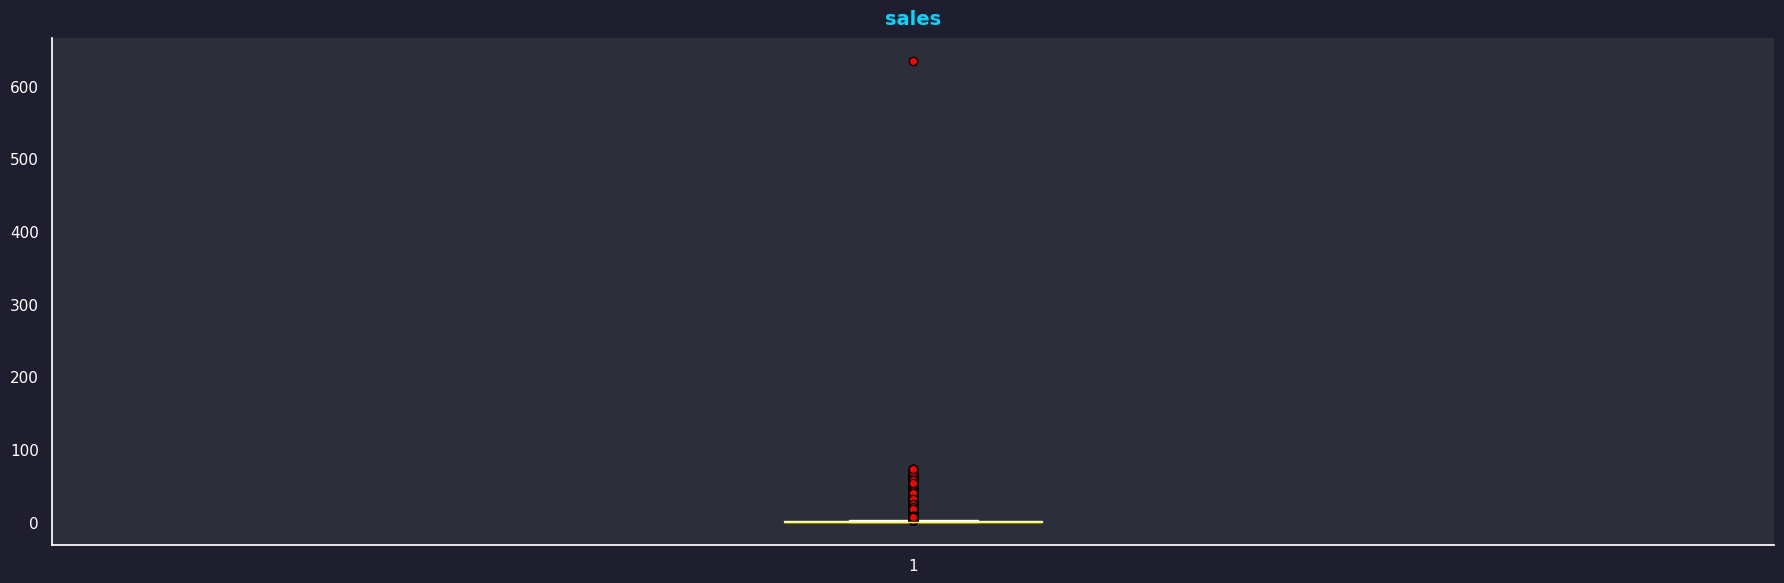

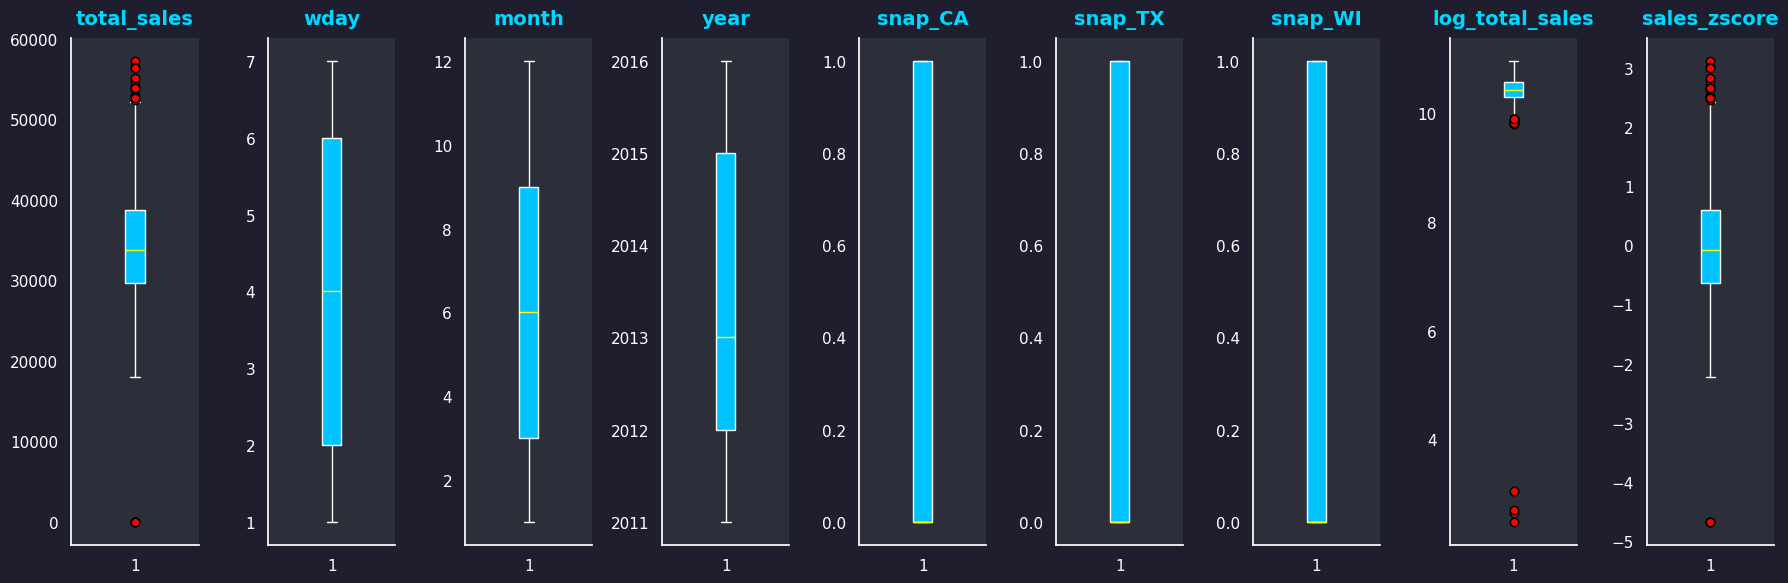

In [29]:

Data1 = [item_eda, eda_daily]

for df_idx, df in enumerate(Data1, start=1):
    numeric_columns = df.select_dtypes(include=['int', 'float']).columns
    
    if len(numeric_columns) == 0:
        continue
    
    fig, ax = plt.subplots(1, len(numeric_columns), figsize=(18, 6))
    fig.patch.set_facecolor("#1e1e2f")


    if len(numeric_columns) == 1:
        ax = [ax]

    for i, col in enumerate(numeric_columns):
        ax[i].patch.set_facecolor("#2c2f3a")
        ax[i].boxplot(df[col], patch_artist=True,
                      boxprops=dict(facecolor='#00c3ff', color='white'),
                      capprops=dict(color='white'),
                      whiskerprops=dict(color='white'),
                      flierprops=dict(markerfacecolor='red', marker='o', markersize=6, linestyle='none'),
                      medianprops=dict(color='yellow'))
        
        ax[i].set_title(col, color='#00d9ff', fontsize=14, pad=10, weight='bold')
        ax[i].tick_params(colors='white', labelsize=11)
        ax[i].spines['top'].set_visible(False)
        ax[i].spines['right'].set_visible(False)
        ax[i].spines['bottom'].set_color('white')
        ax[i].spines['left'].set_color('white')

    plt.tight_layout()
    plt.show()



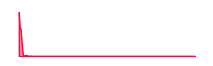


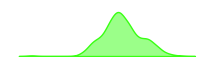
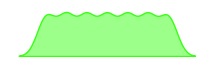
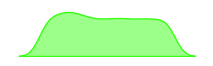
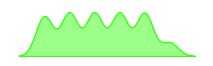
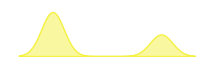
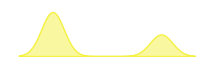
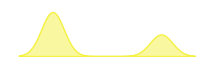
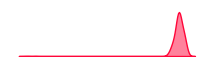
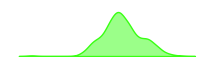

In [30]:
container_style = """
<div style="display: flex; flex-wrap: wrap; gap: 15px; justify-content: center; direction: ltr; background-color: #0a0a0a; padding: 20px; border-radius: 15px;">
"""

for df_idx, df in enumerate(eda_datasets):
    numeric_columns = df.select_dtypes(include=['int', 'float']).columns
    if len(numeric_columns) == 0: continue

 
    display(HTML(f"<h2 style='color: #fff; font-family: sans-serif; text-align: center; border-bottom: 2px solid #333; padding-bottom: 10px; margin-top: 40px;'>📂 Dataset: {eda_names[df_idx]}</h2>"))
    
    cards_html = container_style 
    
    for col in numeric_columns:
        data = df[col].dropna()
        skew_val = data.skew()
        kurt_val = data.kurt()
        normality_score = max(0, round(100 - (abs(skew_val) * 35), 1))
        
        if abs(skew_val) < 0.5:
            status, color_status = "Highly Normal", "#39FF14"
        elif abs(skew_val) < 1:
            status, color_status = "Moderately Skewed", "#F4F142"
        else:
            status, color_status = "Highly Skewed", "#FF073A"

     
        fig, ax = plt.subplots(figsize=(2.5, 0.6))
        fig.patch.set_alpha(0)
        ax.set_facecolor("none")
        sns.kdeplot(data, fill=True, color=color_status, alpha=0.5, linewidth=1, ax=ax)
        ax.axis('off')
        
        buf = io.BytesIO()
        plt.savefig(buf, format='png', transparent=True, bbox_inches='tight')
        plt.close(fig)
        img_base64 = base64.b64encode(buf.getvalue()).decode('utf-8')
        
  
        cards_html += f"""
        <div style="background-color: #111; border: 1px solid #222; padding: 12px; 
                    border-radius: 10px; font-family: sans-serif; width: 280px; color: white; box-shadow: 0 4px 15px rgba(0,0,0,0.5);">
            
            <div style="font-size: 0.9rem; font-weight: bold; color: #fff; margin-bottom: 4px; display: flex; justify-content: space-between;">
                <span>{col.upper()}</span>
                <span style="color: {color_status}; font-size: 0.7rem;">{status}</span>
            </div>

            <div style="width: 100%; height: 3px; background: #222; border-radius: 2px; margin-bottom: 10px;">
                <div style="width: {normality_score}%; height: 100%; background: {color_status}; box-shadow: 0 0 8px {color_status};"></div>
            </div>
            
            <div style="display: flex; align-items: center; justify-content: space-between;">
                <div style="text-align: center;">
                    <div style="color: {color_status}; font-size: 1.2rem; font-weight: 900;">{normality_score}%</div>
                    <div style="color: #555; font-size: 7px; letter-spacing: 1px;">NORMALITY</div>
                </div>
                <img src="data:image/png;base64,{img_base64}" style="width: 80px; filter: drop-shadow(0 0 2px {color_status});">
                <div style="font-size: 0.7rem; border-left: 1px solid #333; padding-left: 8px;">
                    <div style="color: #666;">SKW: <b style="color: #ddd;">{skew_val:.2f}</b></div>
                    <div style="color: #666;">KUR: <b style="color: #ddd;">{kurt_val:.2f}</b></div>
                </div>
            </div>
        </div>
        """
    
    cards_html += "</div>" 
    display(HTML(cards_html))

In [31]:
item_eda["LOG_SALES"] = np.log1p(item_eda["sales"]) 




<div id="Feature" style="    
    width: 90%; 
    max-width: 400px; 
    margin: 20px auto;
    padding: 18px 10px;
    background: linear-gradient(145deg, #0f0f0f, #151515);
    border-radius: 12px;
    border: 1px solid #c20000;
    box-shadow: 0 0 20px rgba(194, 0, 0, 0.2), inset 0 0 5px rgba(194, 0, 0, 0.1);   
    color: #c20000;
    text-align: center;
    font-family: 'Segoe UI', system-ui, -apple-system, sans-serif;
    font-size: clamp(18px, 5vw, 24px); /* فونت هوشمند که با سایز صفحه تغییر میکند */
    font-weight: 800;
    text-transform: uppercase;
    letter-spacing: 3px;
    text-shadow: 0 0 10px rgba(194, 0, 0, 0.5);   
    position: relative;
    overflow: hidden;
">
    <div style="position: absolute; top: 0; left: 50%; transform: translateX(-50%); width: 40%; height: 2px; background: #c20000; box-shadow: 0 0 10px #c20000;"></div>   
  heatmap
</div>

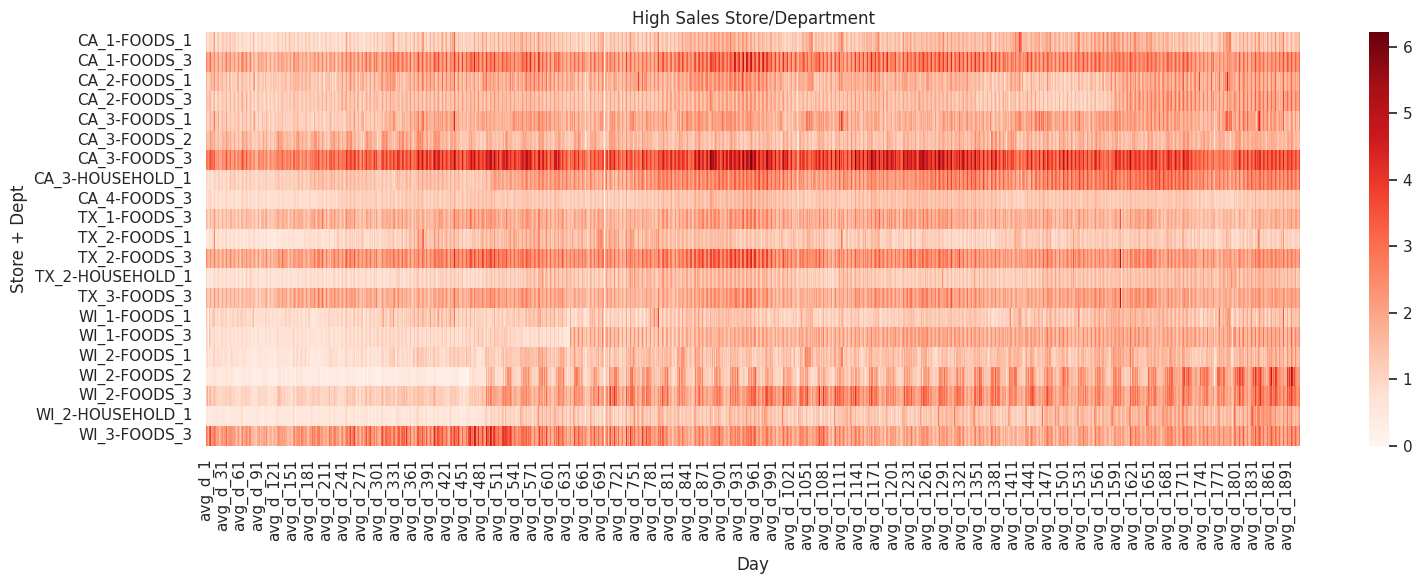

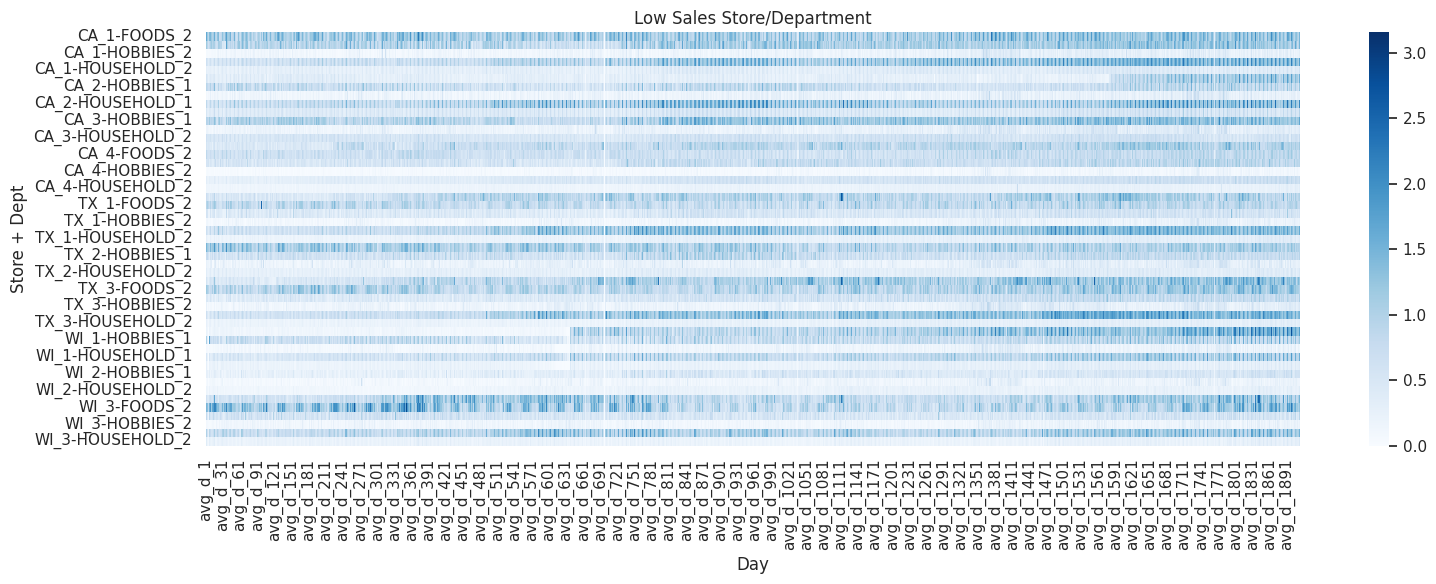

In [32]:

sample_store_dept = store_dept_eda.copy()

day_cols_store = [c for c in sample_store_dept.columns if c.startswith("avg_d_")]

sales_matrix = sample_store_dept.set_index(
    ["store_id", "dept_id"]
)[day_cols_store]


store_mean_sales = sales_matrix.mean(axis=1)


threshold = store_mean_sales.quantile(0.70)

high_sales_matrix = sales_matrix.loc[
    store_mean_sales > threshold
]

low_sales_matrix = sales_matrix.loc[
    store_mean_sales <= threshold
]

plt.figure(figsize=(16, 6))
sns.heatmap(
    high_sales_matrix,
    cmap="Reds",
    cbar=True
)
plt.title("High Sales Store/Department")
plt.xlabel("Day")
plt.ylabel("Store + Dept")
plt.tight_layout()
plt.show()

plt.figure(figsize=(16, 6))
sns.heatmap(
    low_sales_matrix,
    cmap="Blues",
    cbar=True
)
plt.title("Low Sales Store/Department")
plt.xlabel("Day")
plt.ylabel("Store + Dept")
plt.tight_layout()
plt.show()


In [33]:

low_sales_mean = low_sales_matrix.mean(axis=1)
lowest_index = low_sales_mean.idxmin()
lowest_value = low_sales_mean.min()

print(f"🔹 Lowest selling Store+Dept: {lowest_index} with average sales of {lowest_value:.2f}")

# -------------------------------
high_sales_mean = high_sales_matrix.mean(axis=1)
highest_index = high_sales_mean.idxmax()
highest_value = high_sales_mean.max()

print(f"🔹 Best-selling Store+Dept: {highest_index} with average sales of {highest_value:.2f}")


🔹 Lowest selling Store+Dept: ('CA_4', 'HOBBIES_2') with average sales of 0.08
🔹 Best-selling Store+Dept: ('CA_3', 'FOODS_3') with average sales of 3.54


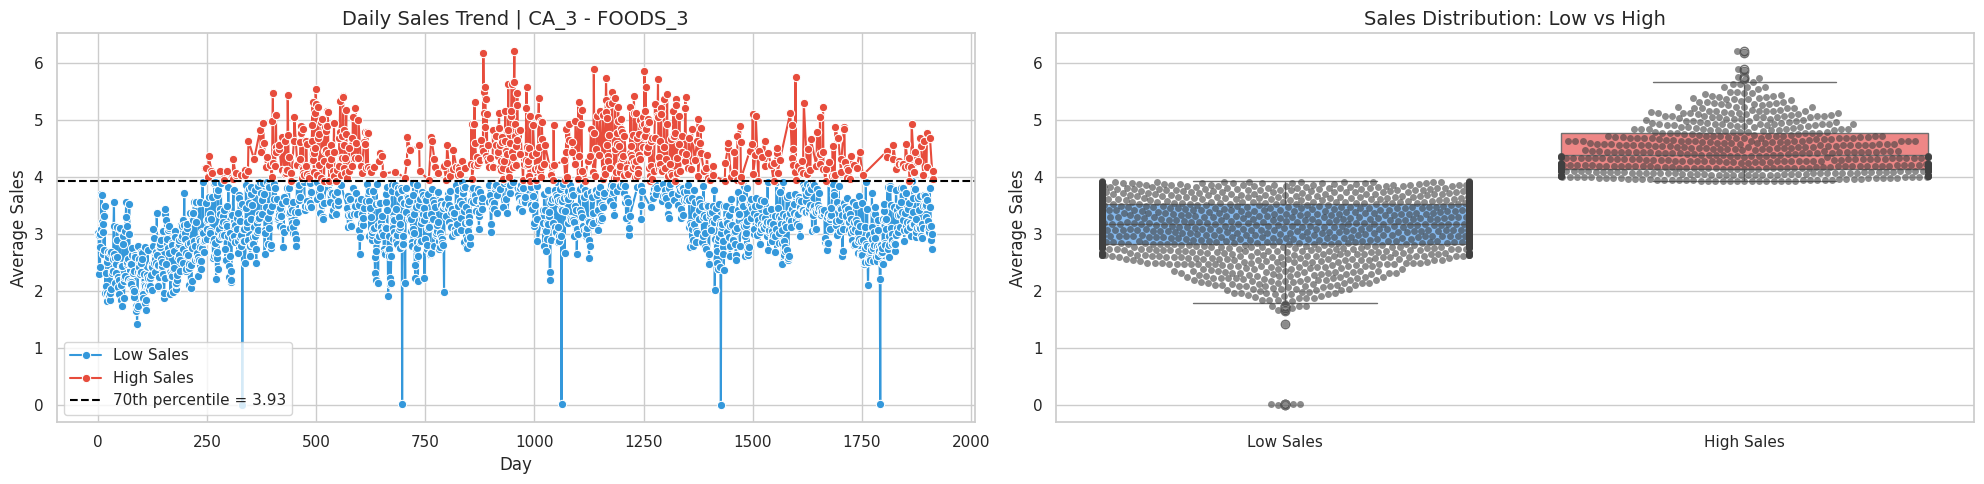


📊 Sales Summary:



,Count,Mean,Median,Min,Max
sales_class,,,,,
High Sales,574,4.50,4.38,3.93,6.22
Low Sales,1339,3.13,3.18,0.00,3.93


In [34]:

import warnings
warnings.filterwarnings("ignore")
# -------------------------------
# Sample filtered data
sample_store_dept = store_dept_eda.copy()

filtered = sample_store_dept[
    (sample_store_dept["store_id"] == "CA_3") &
    (sample_store_dept["dept_id"] == "FOODS_3")
]

# -------------------------------
# Prepare daily sales trend
day_cols = [c for c in filtered.columns if c.startswith("avg_d_")]
sales_series = filtered[day_cols].iloc[0]

df_trend = pd.DataFrame({
    "day": range(1, len(sales_series)+1),
    "avg_sales": sales_series.values
})

# Classify high vs low sales
threshold = df_trend["avg_sales"].quantile(0.70)
df_trend["sales_class"] = np.where(df_trend["avg_sales"] > threshold,
                                   "High Sales", "Low Sales")

# -------------------------------
# Create plots
sns.set_style("whitegrid")
plt.figure(figsize=(20, 5))

# 1️⃣ Line plot: Daily trend
plt.subplot(1, 2, 1)
sns.lineplot(x="day", y="avg_sales", data=df_trend, marker="o", hue="sales_class",
             palette={"Low Sales":"#3498db", "High Sales":"#e74c3c"})
plt.axhline(y=threshold, color="black", linestyle="--", label=f"70th percentile = {threshold:.2f}")
plt.title("Daily Sales Trend | CA_3 - FOODS_3", fontsize=14)
plt.xlabel("Day")
plt.ylabel("Average Sales")
plt.legend()

# 2️⃣ Box plot: Low vs High sales distribution
plt.subplot(1, 2, 2)
sns.boxplot(x="sales_class", y="avg_sales", data=df_trend,
            palette={"Low Sales":"#74b9ff", "High Sales":"#ff7675"})
sns.swarmplot(x="sales_class", y="avg_sales", data=df_trend,
              color=".25", alpha=0.6)
plt.title("Sales Distribution: Low vs High", fontsize=14)
plt.xlabel("")
plt.ylabel("Average Sales")

plt.tight_layout()
plt.show()

# -------------------------------
# 3️⃣ Summary table
summary = df_trend.groupby("sales_class")["avg_sales"].agg(
    Count="count", Mean="mean", Median="median", Min="min", Max="max"
).round(2)

print("\n📊 Sales Summary:\n")
display(summary)


Review of the lowest and highest selling

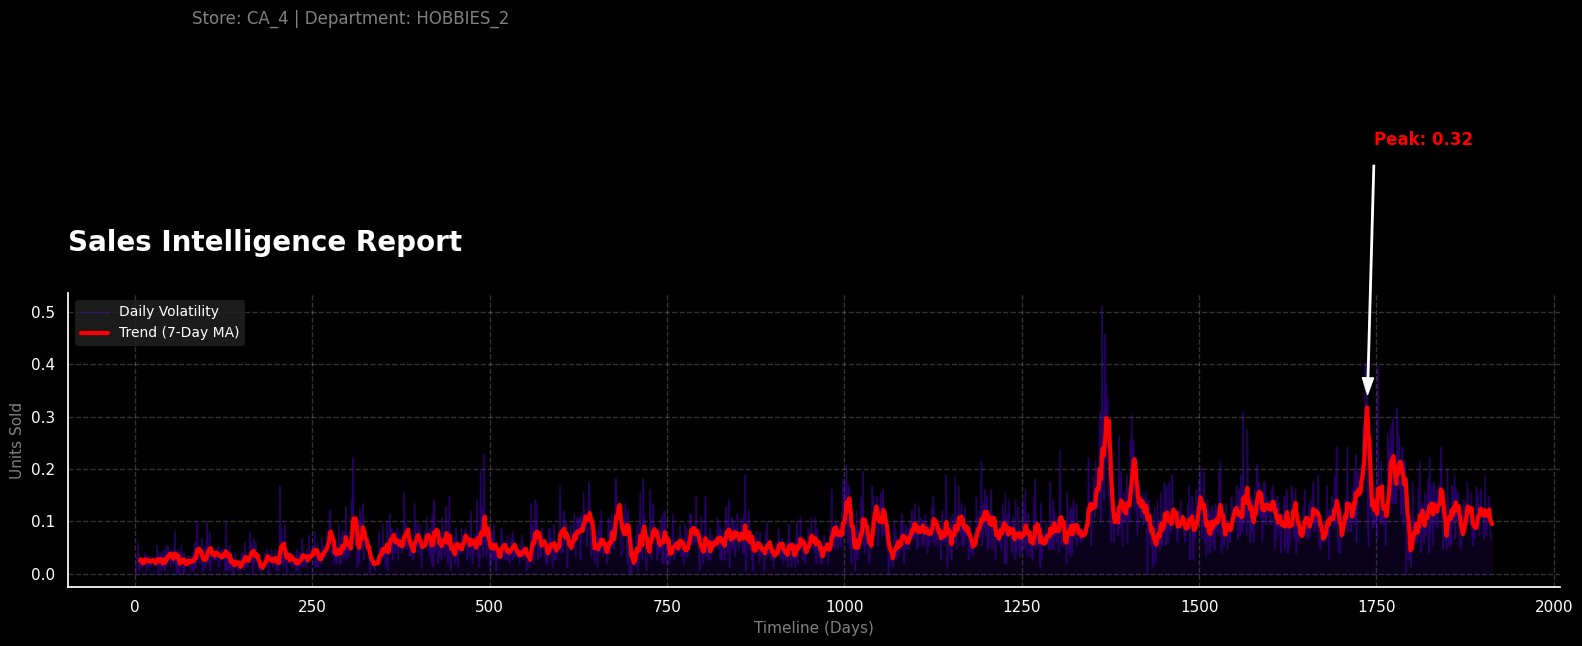

In [35]:

target_data = sales_matrix.xs(
    ('CA_4', 'HOBBIES_2'), 
    level=("store_id", "dept_id")
)

ts = target_data.T
ts.index = ts.index.str.replace("avg_d_", "").astype(int)
ts = ts.sort_index()

rolling_mean = ts.mean(axis=1).rolling(window=7).mean()
actual_values = ts.mean(axis=1)

plt.style.use('dark_background')
colors = ["#6200FF", "red"]

fig, ax = plt.subplots(figsize=(16, 7))

ax.fill_between(ts.index, actual_values, color=colors[0], alpha=0.1)
ax.plot(ts.index, actual_values, color=colors[0], alpha=0.3, linewidth=1, label='Daily Volatility')
line, = ax.plot(ts.index, rolling_mean, color=colors[1], linewidth=3, label='Trend (7-Day MA)')

max_val = rolling_mean.max()
max_idx = rolling_mean.idxmax()
ax.annotate(f'Peak: {max_val:.2f}', 
            xy=(max_idx, max_val), 
            xytext=(max_idx+10, max_val+0.5),
            arrowprops=dict(facecolor='white', shrink=0.05, width=1, headwidth=8),
            fontsize=12, color=colors[1], fontweight='bold')

ax.grid(True, linestyle='--', alpha=0.2)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.title("Sales Intelligence Report", loc='left', fontsize=20, color='white', fontweight='bold', pad=30)
plt.suptitle("Store: CA_4 | Department: HOBBIES_2", x=0.125, y=0.92, ha='left', fontsize=12, color='gray')

plt.xlabel("Timeline (Days)", fontsize=11, color='gray')
plt.ylabel("Units Sold", fontsize=11, color='gray')

plt.legend(facecolor='#222222', edgecolor='none', fontsize=10)

plt.tight_layout()
plt.show()


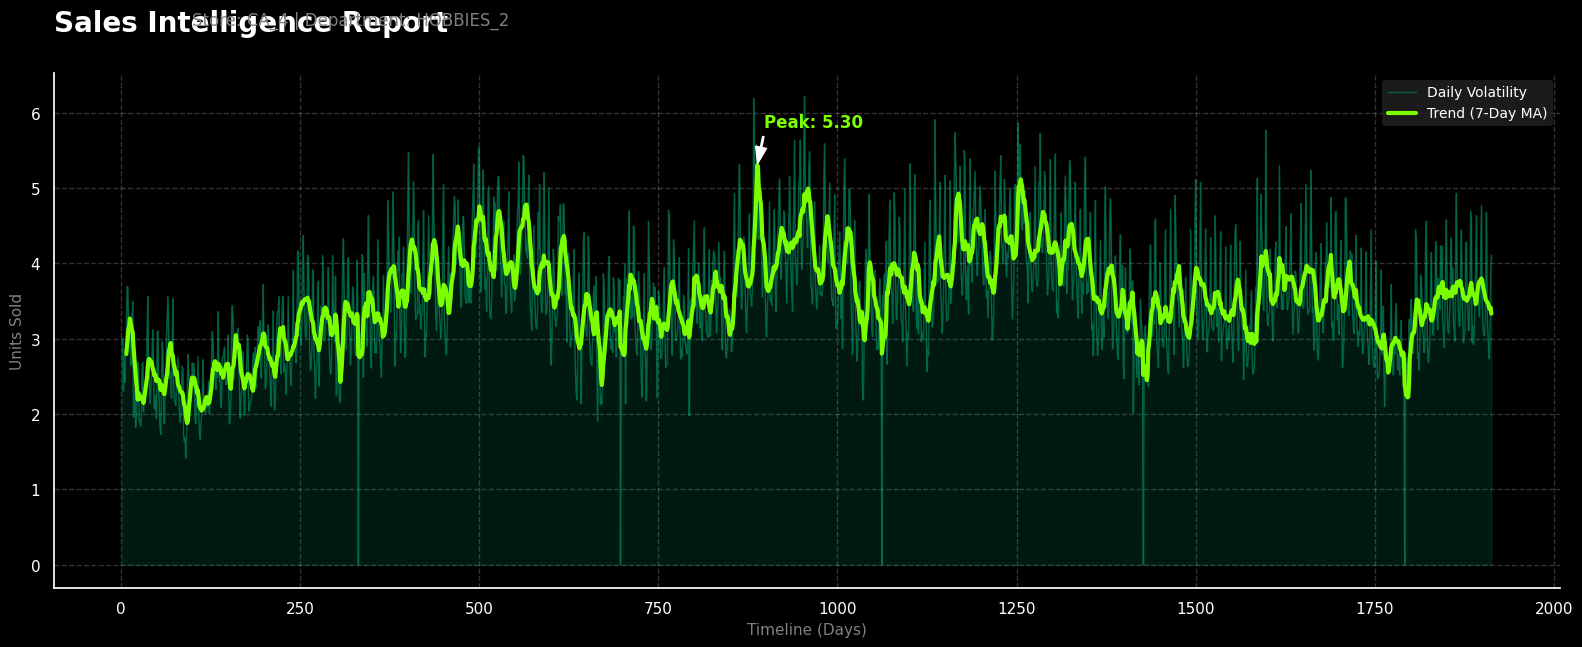

In [36]:
ca3_foods3=sales_matrix.xs(
    ('CA_3', 'FOODS_3'),
    level=("store_id", "dept_id")
)

ts = ca3_foods3.T
ts.index = ts.index.str.replace("avg_d_", "").astype(int)
ts = ts.sort_index()

rolling_mean = ts.mean(axis=1).rolling(window=7).mean()
actual_values = ts.mean(axis=1)

plt.style.use('dark_background')
colors = ["#00FFAA", "#7BFF00"]

fig, ax = plt.subplots(figsize=(16, 7))

ax.fill_between(ts.index, actual_values, color=colors[0], alpha=0.1)
ax.plot(ts.index, actual_values, color=colors[0], alpha=0.3, linewidth=1, label='Daily Volatility')
line, = ax.plot(ts.index, rolling_mean, color=colors[1], linewidth=3, label='Trend (7-Day MA)')

max_val = rolling_mean.max()
max_idx = rolling_mean.idxmax()
ax.annotate(f'Peak: {max_val:.2f}', 
            xy=(max_idx, max_val), 
            xytext=(max_idx+10, max_val+0.5),
            arrowprops=dict(facecolor='white', shrink=0.05, width=1, headwidth=8),
            fontsize=12, color=colors[1], fontweight='bold')

ax.grid(True, linestyle='--', alpha=0.2)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.title("Sales Intelligence Report", loc='left', fontsize=20, color='white', fontweight='bold', pad=30)
plt.suptitle("Store: CA_4 | Department: HOBBIES_2", x=0.125, y=0.92, ha='left', fontsize=12, color='gray')

plt.xlabel("Timeline (Days)", fontsize=11, color='gray')
plt.ylabel("Units Sold", fontsize=11, color='gray')

plt.legend(facecolor='#222222', edgecolor='none', fontsize=10)

plt.tight_layout()
plt.show()



We will go and do these challenges one by one.

<div style="
width: 90%;
max-width: 400px;
margin: 20px auto;
padding: 18px 10px;
background: linear-gradient(145deg, #0f0f0f, #151515);
border-radius: 12px;
border: 1px solid #c200b8;
box-shadow: 0 0 20px rgba(191, 0, 194, 0.2), inset 0 0 5pxrgba(194, 0, 139, 0.1));
color: #ffffff;
text-align: center;
font-family: 'Segoe UI', system-ui, -apple-system, sans-serif;
font-size: clamp(18px, 5vw, 24px); /* Smart font that changes with screen size */
font-weight: 800;
text-transform: uppercase;
letter-spacing: 3px;
text-shadow: 0 0 10px rgba(194, 0, 133, 0.5);
position: relative;
overflow: hidden;
">
<div style="position: absolute; top: 0; left: 50%; transform: translateX(-50%); width: 40%; height: 2px; background: #7400c2; box-shadow: 0 0 10px #9e00c2;"></div>
Seasonal Sales Patterns
</div>

In [37]:
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['axes.unicode_minus'] = False
sns.set_style("whitegrid")

calendar_sales = eda_daily
avg_data = store_dept_eda
sales_data = eda_daily


In [38]:

avg_cols = [col for col in store_dept_eda.columns if col.startswith('avg_d_')]

avg_long = store_dept_eda.melt(
    id_vars=['store_id', 'dept_id'],
    value_vars=avg_cols,
    var_name='d',
    value_name='avg_sales'
)


avg_long['d'] = avg_long['d'].str.replace('avg_', '')


merged_data = pd.merge(eda_daily, avg_long, on='d', how='left')

merged_data['is_weekend'] = merged_data['weekday'].isin(['Saturday', 'Sunday'])
merged_data['sales_category'] = merged_data['dept_id'].str.split('_').str[0]

print(f"  - Number of categories: {merged_data['sales_category'].nunique()}")
merged_data.head()

  - Number of categories: 3


,d,total_sales,wday,weekday,month,year,event_name_1,event_type_1,snap_CA,snap_TX,snap_WI,log_total_sales,sales_zscore,store_id,dept_id,avg_sales,is_weekend,sales_category
0,d_1,32631,1,Saturday,1,2011,No_occasion,No_occasion,0,0,0,10.393049,-0.232859,CA_1,FOODS_1,1.375000,True,FOODS
1,d_1,32631,1,Saturday,1,2011,No_occasion,No_occasion,0,0,0,10.393049,-0.232859,CA_1,FOODS_2,1.693467,True,FOODS
2,d_1,32631,1,Saturday,1,2011,No_occasion,No_occasion,0,0,0,10.393049,-0.232859,CA_1,FOODS_3,2.755772,True,FOODS
3,d_1,32631,1,Saturday,1,2011,No_occasion,No_occasion,0,0,0,10.393049,-0.232859,CA_1,HOBBIES_1,1.269231,True,HOBBIES
4,d_1,32631,1,Saturday,1,2011,No_occasion,No_occasion,0,0,0,10.393049,-0.232859,CA_1,HOBBIES_2,0.187919,True,HOBBIES


In [39]:
from IPython.display import HTML, display
sns.set_theme(style="whitegrid")
plt.rcParams['font.family'] = 'DejaVu Sans'
base_color = sns.color_palette("viridis", 7)

daily_stats = merged_data.groupby('weekday').agg({
    'avg_sales': ['mean', 'std', 'min', 'max', 'count'],
    'total_sales': 'mean',
    'log_total_sales': 'mean'
}).round(4)

daily_stats.columns = ['avg_mean', 'avg_std', 'avg_min', 'avg_max', 'count', 
                       'total_mean', 'log_mean']

day_order = ['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 
             'Thursday', 'Friday']

existing_days = [day for day in day_order if day in daily_stats.index]
daily_stats = daily_stats.reindex(existing_days)
table_html = daily_stats[['avg_mean', 'avg_std', 'total_mean', 'count']].to_html(
    classes="kaggle-table",
    border=0
)

overall_avg = daily_stats['avg_mean'].mean()
daily_stats['relative_performance'] = (
    daily_stats['avg_mean'] / overall_avg * 100
).round(1)

performance_rows = ""
for day in daily_stats.index:
    rel = daily_stats.loc[day, 'relative_performance']
    status = "Above Average" if rel > 100 else "Below Average"
    color = "#2e7d32" if rel > 100 else "#c62828"

    performance_rows += f"""
    <tr>
        <td>{day}</td>
        <td style="color:{color}; font-weight:bold;">{rel}%</td>
        <td>{status}</td>
    </tr>
    """

html_output = f"""
<style>
.kaggle-box {{
    color: #f5f5f5;
    background: #0b0b0b;
    border: 1px solid #8b0000;
    border-radius: 8px;
    padding: 16px;
    margin: 16px 0;
    overflow-x: auto;  /* مهم برای ریسپانسیو */
}}

.kaggle-title {{
    font-size: 18px;
    font-weight: 600;
    margin-bottom: 12px;
    color: #ff3b3b;
}}

.kaggle-table {{
    background: #0b0b0b;
    width: 100%;
    border-collapse: collapse;
    text-align: center;
    font-size: 14px;
    color: #f5f5f5;
    min-width: 300px;  /* برای موبایل */
}}

.kaggle-table th {{
    background: #1a0000;
    color: #ff4d4d;
    padding: 8px;
    border-bottom: 2px solid #8b0000;
}}

.kaggle-table td {{
    padding: 8px;
    border-bottom: 1px solid #330000;
}}

.kaggle-table tr:hover {{
    background: #140000;
}}

@media (max-width: 768px) {{
    .kaggle-table {{
        font-size: 12px;
    }}
}}
</style>

<div class="kaggle-box">
    <div class="kaggle-title">📊 Descriptive Sales Statistics by Weekday</div>
    {table_html}
</div>

<div class="kaggle-box">
    <div class="kaggle-title">📈 Relative Weekday Performance</div>
    <table class="kaggle-table">
        <thead>
            <tr>
                <th>Weekday</th>
                <th>Performance (%)</th>
                <th>Status</th>
            </tr>
        </thead>
        <tbody>
            {performance_rows}
        </tbody>
    </table>
</div>
"""

display(HTML(html_output))



In [42]:

import matplotlib.gridspec as gridspec

plt.style.use('dark_background')
face_color = '#0A0A0A'
accent_color = '#00E676'
fig = plt.figure(figsize=(20, 14), facecolor=face_color)
gs = gridspec.GridSpec(3, 3, figure=fig, hspace=0.4, wspace=0.3)


ax1 = fig.add_subplot(gs[0, :2])
sns.lineplot(x=daily_stats.index, y=daily_stats['avg_mean'], ax=ax1, color=accent_color, lw=4, marker='o', markersize=10)
ax1.fill_between(daily_stats.index, daily_stats['avg_mean'], alpha=0.1, color=accent_color)
ax1.set_title('WEEKLY SALES VELOCITY', loc='left', fontsize=18, fontweight='bold', color='white')


ax2 = fig.add_subplot(gs[0, 2])
ax2.text(0.5, 0.6, f"{overall_avg:.2f}", fontsize=50, fontweight='bold', ha='center', color=accent_color)
ax2.text(0.5, 0.4, "OVERALL AVG SALES", fontsize=14, ha='center', color='gray')
ax2.axis('off')


ax3 = fig.add_subplot(gs[1, 0])
sns.barplot(x=daily_stats.index, y=daily_stats['relative_performance'], ax=ax3, palette='viridis', saturation=0.8)
ax3.axhline(100, ls='--', color='white', alpha=0.5)
ax3.set_title('RELATIVE PERFORMANCE (%)', fontsize=14, fontweight='bold')
plt.xticks(rotation=30)


ax4 = fig.add_subplot(gs[1, 1])
weekend_data = merged_data.groupby('is_weekend')['avg_sales'].mean()
ax4.pie(weekend_data, labels=['Weekdays', 'Weekend'], colors=['#222222', accent_color], 
        autopct='%1.1f%%', startangle=140, pctdistance=0.8, wedgeprops={'width':0.4})
ax4.set_title('MARKET SHARE', fontsize=14, fontweight='bold')


ax5 = fig.add_subplot(gs[1, 2])
ax5.stackplot(daily_stats.index, daily_stats['avg_std'], color='#FF3D00', alpha=0.3)
ax5.plot(daily_stats.index, daily_stats['avg_std'], color='#FF3D00', lw=2)
ax5.set_title('VOLATILITY INDEX', fontsize=14, fontweight='bold')
plt.xticks(rotation=30)


ax6 = fig.add_subplot(gs[2, :])
sns.heatmap(heatmap_data, annot=True, fmt='.2f', cmap='magma', cbar=False, ax=ax6, linewidths=1)
ax6.set_title('CATEGORY DYNAMICS HEATMAP', fontsize=16, fontweight='bold', pad=15)

for ax in [ax1, ax3, ax5, ax6]:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.grid(axis='y', alpha=0.05)
    ax.set_xlabel('')
    ax.set_ylabel('')

plt.savefig('kaggle_dashboard.png', dpi=300, bbox_inches='tight', facecolor=face_color)
plt.show()

KeyError: 'category'

In [43]:

html_report = """
<div style="max-width:550px; margin:20px auto; font-family:Segoe UI, Roboto, sans-serif;
            background:#fff; border-radius:16px; box-shadow:0 10px 30px rgba(0,0,0,0.08);
            border:1px solid #eaeaea; overflow:hidden; padding:0;">

  <div style="background:#2c3e50; padding:20px; text-align:center; color:#fff;">
    <h2 style="margin:0; font-size:1.25rem;">Weekly Sales Analytics Report</h2>
  </div>

  <div style="padding:24px;">
    <div style="display:flex; margin-bottom:16px; background:#f0fdf4; padding:16px; border-radius:12px;">
      <span style="font-size:24px; margin-right:12px;">🚀</span>
      <div>
        <strong style="color:#166534;">Weekend (Sat & Sun)</strong>
        <p style="margin:4px 0 0; font-size:0.9rem; color:#374151;">
          Highest average sales with the lowest variability. Core strength of the business.
        </p>
      </div>
    </div>

    <div style="display:flex; margin-bottom:16px; background:#fffbeb; padding:16px; border-radius:12px;">
      <span style="font-size:24px; margin-right:12px;">📉</span>
      <div>
        <strong style="color:#92400e;">Midweek (Mon-Thu)</strong>
        <p style="margin:4px 0 0; font-size:0.9rem; color:#374151;">
          Below-average sales with moderate stability; needs targeted promotions.
        </p>
      </div>
    </div>

    <div style="display:flex; margin-bottom:24px; background:#f9fafb; padding:16px; border-radius:12px;">
      <span style="font-size:24px; margin-right:12px;">⚖️</span>
      <div>
        <strong style="color:#4b5563;">Friday</strong>
        <p style="margin:4px 0 0; font-size:0.9rem; color:#374151;">
          Balanced performance close to the mean, minimal volatility.
        </p>
      </div>
    </div>

    <div style="border-top:2px dashed #eee; padding-top:20px; text-align:center;">
      <div style="display:inline-block; background:#eff6ff; padding:8px 16px;
                  border-radius:20px; color:#1e40af; font-weight:600; font-size:0.85rem; margin-bottom:10px;">
        Sales Concentration
      </div>
      <div style="font-size:2rem; font-weight:800; color:#1e3a8a;">
        56.4% <span style="font-size:1rem; font-weight:normal; color:#6b7280;">of total sales</span>
      </div>
      <p style="color:#6b7280; font-size:0.8rem; margin-top:8px;">
        Generated exclusively during the two weekend days.
      </p>
    </div>
  </div>
</div>
"""

display(HTML(html_report))






<div style="
    width: 90%; 
    max-width: 400px; 
    margin: 20px auto;
    padding: 18px 10px;
    background: linear-gradient(145deg, #0f0f0f, #151515);
    border-radius: 12px;
    border: 1px solid #c200b8;
    box-shadow: 0 0 20px rgba(191, 0, 194, 0.2), inset 0 0 5pxrgba(194, 0, 139, 0.1));   
    color: #ffffff;
    text-align: center;
    font-family: 'Segoe UI', system-ui, -apple-system, sans-serif;
    font-size: clamp(18px, 5vw, 24px); /* فونت هوشمند که با سایز صفحه تغییر میکند */
    font-weight: 800;
    text-transform: uppercase;
    letter-spacing: 3px;
    text-shadow: 0 0 10px rgba(194, 0, 133, 0.5);   
    position: relative;
    overflow: hidden;
">
    <div style="position: absolute; top: 0; left: 50%; transform: translateX(-50%); width: 40%; height: 2px; background: #7400c2; box-shadow: 0 0 10px #9e00c2;"></div>   
Annual sales trend
</div>





In [44]:

merged_data = pd.merge(eda_daily, avg_long, on='d', how='inner')
merged_data['category'] = merged_data['dept_id'].str.split('_').str[0]

def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    if month in [3, 4, 5]:
        return 'Spring'
    if month in [6, 7, 8]:
        return 'Summer'
    return 'Autumn'

merged_data['season'] = merged_data['month'].apply(get_season)

monthly_sales = (
    merged_data
    .groupby('month')[['total_sales', 'avg_sales']]
    .mean()
    .round(2)
)
monthly_sales.columns = ['avg_total_sales', 'avg_category_sales']

seasonal_sales = (
    merged_data
    .groupby('season')['total_sales']
    .agg(['mean', 'sum', 'count'])
    .round(2)
)
seasonal_sales.columns = ['Average', 'Total', 'Count']

best_season = seasonal_sales['Average'].idxmax()
worst_season = seasonal_sales['Average'].idxmin()

monthly_rows = "".join(
    f"<tr><td>{m}</td><td>{row['avg_total_sales']}</td><td>{row['avg_category_sales']}</td></tr>"
    for m, row in monthly_sales.iterrows()
)

seasonal_rows = "".join(
    f"<tr><td>{s}</td><td>{row['Average']}</td><td>{row['Total']}</td><td>{row['Count']}</td></tr>"
    for s, row in seasonal_sales.iterrows()
)
        
html_code = f"""
<style>
.main-wrapper {{
    font-family: -apple-system, BlinkMacSystemFont, 'Segoe UI', Roboto, Helvetica, Arial, sans-serif;
    background: linear-gradient(145deg, #020617, #0f172a);
    padding: 30px;
    border-radius: 20px;
    color: #e5e7eb;
    max-width: 900px;
    margin: 20px auto;
}}

.header {{
    text-align: center;
    border-bottom: 2px solid #1e293b;
    margin-bottom: 25px;
    padding-bottom: 15px;
}}

.stats-container {{
    display: flex;
    gap: 20px;
    margin-bottom: 30px;
}}

.stat-card {{
    flex: 1;
    padding: 20px;
    border-radius: 16px;
    text-align: center;
    background: rgba(255,255,255,0.04);
    border: 1px solid rgba(255,255,255,0.08);
}}

.stat-card.best {{ border-top: 4px solid #22c55e; }}
.stat-card.worst {{ border-top: 4px solid #ef4444; }}

.value {{
    font-size: 24px;
    font-weight: 700;
    margin-top: 8px;
}}

.tables {{
    display: grid;
    grid-template-columns: 1fr 1fr;
    gap: 20px;
}}

table {{
    width: 100%;
    border-collapse: collapse;
    background: rgba(0,0,0,0.25);
    border-radius: 12px;
    overflow: hidden;
}}

th {{
    background: #020617;
    color: #38bdf8;
    padding: 12px;
    font-size: 14px;
}}

td {{
    padding: 10px;
    text-align: center;
    border-bottom: 1px solid #1e293b;
    font-size: 13px;
}}

tr:hover td {{
    background: rgba(255,255,255,0.05);
}}

.title {{
    margin-bottom: 10px;
    font-weight: 600;
    color: #94a3b8;
}}

@media (max-width: 768px) {{
    .tables {{ grid-template-columns: 1fr; }}
}}
</style>

<div class="main-wrapper">
    <div class="header">
        <h2>📊 Advanced Sales Seasonality Analysis</h2>
    </div>

    <div class="stats-container">
        <div class="stat-card best">
            <div>Best Performing Season</div>
            <div class="value" style="color:#22c55e;">{best_season}</div>
        </div>
        <div class="stat-card worst">
            <div>Weakest Performing Season</div>
            <div class="value" style="color:#ef4444;">{worst_season}</div>
        </div>
    </div>

    <div class="tables">
        <div>
            <div class="title">📅 Monthly Average Sales</div>
            <table>
                <thead>
                    <tr><th>Month</th><th>Total Sales</th><th>Category Sales</th></tr>
                </thead>
                <tbody>{monthly_rows}</tbody>
            </table>
        </div>

        <div>
            <div class="title">🌦 Seasonal Sales Summary</div>
            <table>
                <thead>
                    <tr><th>Season</th><th>Average</th><th>Total</th><th>Count</th></tr>
                </thead>
                <tbody>{seasonal_rows}</tbody>
            </table>
        </div>
    </div>
</div>
"""
display(HTML(html_code))


Month,Total Sales,Category Sales
1,33832.35,0.94
2,34644.64,0.96
3,34339.84,0.95
4,34258.68,0.94
5,32503.85,0.89
6,35001.41,0.95
7,35122.42,0.95
8,35946.65,0.98
9,35479.26,0.97
10,34713.48,0.96


In [45]:
from scipy import stats

# ANOVA across seasons
season_groups = [
    merged_data.loc[merged_data['season'] == s, 'avg_sales'].dropna()
    for s in merged_data['season'].unique()
]

f_stat, p_value = stats.f_oneway(*season_groups) if len(season_groups) >= 2 else (0, 1)

# Seasonal stability (CV)
seasonal_stats = (
    merged_data
    .groupby('season')['avg_sales']
    .agg(['mean', 'std'])
    .assign(cv=lambda x: (x['std'] / x['mean']) * 100)
    .round(3)
)

# Category peak & low months
cat_summary = []
for cat in merged_data['category'].unique():
    g = merged_data[merged_data['category'] == cat].groupby('month')['avg_sales'].mean()
    cat_summary.append((cat, g.idxmax(), g.idxmin()))
html_output = f"""
<style>
.wrapper {{
    max-width: 900px;
    margin: auto;
    font-family: 'Arial', sans-serif;
    color: #f1f5f9;
    background: #1e293b;
    padding: 25px;
    border-radius: 12px;
}}

h2 {{
    text-align: center;
    margin-bottom: 20px;
    color: #38bdf8;
}}

.anova {{
    background: #0f172a;
    border-left: 4px solid {"#22c55e" if p_value < 0.05 else "#f87171"};
    padding: 15px;
    margin-bottom: 25px;
    color: #f1f5f9;
}}

.grid {{
    display: grid;
    grid-template-columns: 1fr 1fr;
    gap: 20px;
}}

.card {{
    background: #0f172a;
    padding: 15px;
    border-radius: 10px;
    box-shadow: 0 2px 10px rgba(0,0,0,0.4);
}}

table {{
    width: 100%;
    border-collapse: collapse;
}}

th, td {{
    padding: 10px;
    text-align: center;
    border-bottom: 1px solid #374151;
}}

th {{
    color: #38bdf8;
}}

tr:hover td {{
    background-color: #1f2937;
}}

@media (max-width: 768px) {{
    .grid {{ grid-template-columns: 1fr; }}
}}
</style>

<div class="wrapper">

<h2>Seasonality Analysis & Statistical Validation</h2>

<div class="anova">
<b>ANOVA Test</b><br>
F-statistic: {f_stat:.2f} | P-value: {p_value:.4f}<br>
<b>{"Significant seasonal differences detected" if p_value < 0.05 else "No statistically significant difference"}</b>
</div>

<div class="grid">

<div class="card">
<b>Category Peak & Low Months</b><br><br>
{"".join([f"<div>{c}: Peak = Month {p}, Low = Month {l}</div>" for c,p,l in cat_summary])}
</div>

<div class="card">
<b>Seasonal Stability (Coefficient of Variation)</b>
<table>
<tr><th>Season</th><th>Mean</th><th>CV (%)</th></tr>
{"".join([f"<tr><td>{i}</td><td>{r['mean']}</td><td>{r['cv']:.2f}</td></tr>" for i,r in seasonal_stats.iterrows()])}
</table>
</div>

</div>
</div>
"""

HTML(html_output)


Season,Mean,CV (%)
Autumn,0.947,80.41
Spring,0.928,81.19
Summer,0.96,83.20
Winter,0.944,79.75


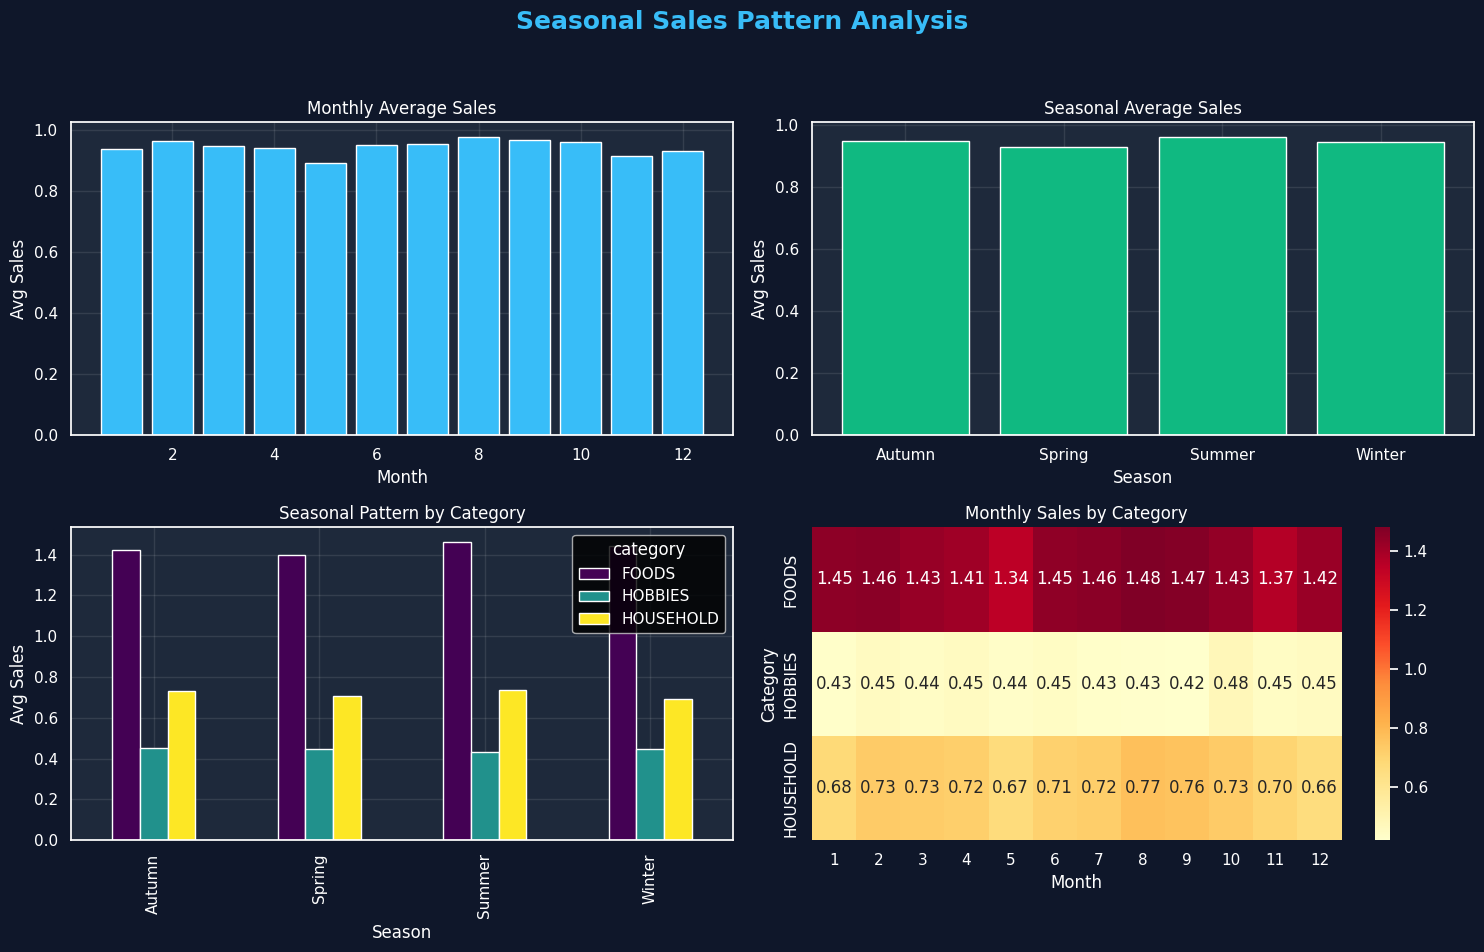

In [46]:
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import seaborn as sns

# --- Visualization Logic (English Labels) ---
plt.style.use('dark_background')
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.patch.set_facecolor('#0f172a')
for ax in axes.ravel(): ax.set_facecolor('#1e293b')

fig.suptitle('Seasonal Sales Pattern Analysis', fontsize=18, fontweight='bold', color='#38bdf8')

# 1. Monthly Trend
monthly_avg = merged_data.groupby('month')['avg_sales'].mean()
axes[0, 0].bar(monthly_avg.index, monthly_avg.values, color='#38bdf8')
axes[0, 0].set_title('Monthly Average Sales')
axes[0, 0].set_xlabel('Month')
axes[0, 0].set_ylabel('Avg Sales')
axes[0, 0].grid(alpha=0.1)

# 2. Seasonal Comparison
seasonal_avg = merged_data.groupby('season')['avg_sales'].mean()
axes[0, 1].bar(seasonal_avg.index, seasonal_avg.values, color='#10b981')
axes[0, 1].set_title('Seasonal Average Sales')
axes[0, 1].set_xlabel('Season')
axes[0, 1].set_ylabel('Avg Sales')
axes[0, 1].grid(alpha=0.1)

# 3. Category Seasonal Pattern
pivot_cat_season = merged_data.pivot_table(values='avg_sales', index='season', columns='category', aggfunc='mean')
pivot_cat_season.plot(kind='bar', ax=axes[1, 0], colormap='viridis')
axes[1, 0].set_title('Seasonal Pattern by Category')
axes[1, 0].set_xlabel('Season')
axes[1, 0].set_ylabel('Avg Sales')
axes[1, 0].grid(alpha=0.1)

# 4. Monthly Heatmap
heatmap_data = merged_data.pivot_table(values='avg_sales', index='category', columns='month', aggfunc='mean')
sns.heatmap(heatmap_data, annot=True, fmt='.2f', cmap='YlOrRd', ax=axes[1, 1])
axes[1, 1].set_title('Monthly Sales by Category')
axes[1, 1].set_xlabel('Month')
axes[1, 1].set_ylabel('Category')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# --- Advanced HTML/CSS Display for Insights ---
insight_cards = ""
for cat in merged_data['category'].unique():
    data = merged_data[merged_data['category'] == cat]
    peak = data.groupby('season')['avg_sales'].mean().idxmax()
    low = data.groupby('season')['avg_sales'].mean().idxmin()
    vol = (data.groupby('season')['avg_sales'].mean().max() - data.groupby('season')['avg_sales'].mean().min()) / data.groupby('season')['avg_sales'].mean().mean() * 100
    
    insight_cards += f"""
    <div class="insight-card">
        <div class="cat-name">{cat}</div>
        <div class="detail">Peak: <span style="color:#10b981">{peak}</span></div>
        <div class="detail">Low: <span style="color:#ef4444">{low}</span></div>
        <div class="vol-bar"><div class="vol-fill" style="width:{min(vol, 100)}%"></div></div>
        <small>Volatility: {vol:.1f}%</small>
    </div>
    """

html_dashboard = f"""
<style>
    @import url('https://fonts.cdnfonts.com/css/vazirmatn');
    .report-wrapper {{
        background: #0f172a; font-family: 'Vazirmatn', sans-serif; direction: ltr;
        padding: 25px; border-radius: 20px; color: #f8fafc; max-width: 950px; margin: 20px auto;
    }}
    .grid-insights {{ display: grid; grid-template-columns: repeat(auto-fit, minmax(200px, 1fr)); gap: 15px; margin-top: 20px; }}
    .insight-card {{
        background: rgba(255,255,255,0.03); border: 1px solid rgba(255,255,255,0.1);
        padding: 15px; border-radius: 15px; transition: 0.3s;
    }}
    .insight-card:hover {{ background: rgba(255,255,255,0.07); transform: translateY(-3px); }}
    .cat-name {{ font-weight: 800; color: #38bdf8; font-size: 18px; margin-bottom: 10px; border-bottom: 1px solid #334155; }}
    .detail {{ font-size: 13px; margin: 5px 0; }}
    .vol-bar {{ background: #334155; height: 6px; border-radius: 3px; margin-top: 10px; overflow: hidden; }}
    .vol-fill {{ background: #38bdf8; height: 100%; }}
    .actions {{
        background: linear-gradient(90deg, #1e293b, #334155); padding: 20px; 
        border-radius: 15px; margin-top: 30px; border-left: 5px solid #38bdf8;
    }}
    .actions li {{ margin-bottom: 8px; font-size: 14px; list-style-type: '🚀 '; }}
</style>

<div class="report-wrapper">
    <h2 style="text-align:center; color:#38bdf8;">💡 Smart Analysis & Strategic Recommendations</h2>
    
    <div class="grid-insights">{insight_cards}</div>
    
    <div class="actions">
        <h3 style="margin-top:0;">🛠 Action Plan:</h3>
        <ul style="padding-left: 20px;">
            <li><b>Inventory Management:</b> Increase stock levels during peak seasons to avoid sales disruptions.</li>
            <li><b>Targeted Marketing:</b> Focus marketing budgets on high-volatility categories ahead of peak seasons.</li>
            <li><b>Pricing Strategy:</b> Apply periodic discounts during low seasons to stimulate demand.</li>
        </ul>
    </div>
</div>
"""

display(HTML(html_dashboard))









<div style="
    width: 90%; 
    max-width: 400px; 
    margin: 20px auto;
    padding: 18px 10px;
    background: linear-gradient(145deg, #0f0f0f, #151515);
    border-radius: 12px;
    border: 1px solid #c200b8;
    box-shadow: 0 0 20px rgba(191, 0, 194, 0.2), inset 0 0 5pxrgba(194, 0, 139, 0.1));   
    color: #ffffff;
    text-align: center;
    font-family: 'Segoe UI', system-ui, -apple-system, sans-serif;
    font-size: clamp(18px, 5vw, 24px); /* فونت هوشمند که با سایز صفحه تغییر میکند */
    font-weight: 800;
    text-transform: uppercase;
    letter-spacing: 3px;
    text-shadow: 0 0 10px rgba(194, 0, 133, 0.5);   
    position: relative;
    overflow: hidden;
">
    <div style="position: absolute; top: 0; left: 50%; transform: translateX(-50%); width: 40%; height: 2px; background: #7400c2; box-shadow: 0 0 10px #9e00c2;"></div>   
Impact of SNAP States
</div>





In [47]:


# --- Core datasets ---
daily_data = eda_daily[[
    "d", "total_sales", "month", "year",
    "snap_CA", "snap_TX", "snap_WI"
]].copy()

store_dept = (
    store_dept_eda[["store_id", "dept_id"]]
    .drop_duplicates()
    .reset_index(drop=True)
)

item_data = item_eda[[
    "item_id", "store_id", "dept_id", "d", "sales"
]].copy()

# --- State-wise SNAP normalization ---
state_frames = []
for state in ["CA", "TX", "WI"]:
    tmp = daily_data[["d", "total_sales", "month", "year", f"snap_{state}"]].copy()
    tmp["state"] = state
    tmp.rename(columns={f"snap_{state}": "snap"}, inplace=True)
    state_frames.append(tmp)

state_df = pd.concat(state_frames, ignore_index=True)
state_df["snap_status"] = state_df["snap"].map({0: "Non-SNAP", 1: "SNAP"})

# --- Sanity checks ---
assert state_df.isna().sum().sum() == 0, "Missing values detected"

print("CELL 1 OK")
print("State-level rows:", state_df.shape[0])


CELL 1 OK
State-level rows: 5739


In [48]:

snap_stats = state_df.groupby(["state", "snap_status"]).agg(
    mean_sales=("total_sales", "mean"),
    std_sales=("total_sales", "std"),
    days=("total_sales", "count")
).round(2).reset_index()

impact_rows = []
for state in snap_stats["state"].unique():
    s = snap_stats[snap_stats["state"] == state].set_index("snap_status")
    if {"SNAP", "Non-SNAP"} <= set(s.index):
        impact = (s.loc["SNAP", "mean_sales"] - s.loc["Non-SNAP", "mean_sales"]) / s.loc["Non-SNAP", "mean_sales"] * 100
        impact_rows.append({
            "state": state,
            "snap_days": s.loc["SNAP", "days"],
            "non_snap_days": s.loc["Non-SNAP", "days"],
            "snap_avg": round(s.loc["SNAP", "mean_sales"], 2),
            "non_snap_avg": round(s.loc["Non-SNAP", "mean_sales"], 2),
            "impact_pct": round(impact, 2)
        })

snap_summary = pd.DataFrame(impact_rows)


rows_html = ""
for _, row in snap_summary.iterrows():
    color = "#10b981" if row['impact_pct'] > 0 else "#ef4444"
    rows_html += f"""
    <div class="state-card">
        <div class="state-header">
            <span class="state-name">{row['state']}</span>
            <span class="impact-badge" style="background: {color}22; color: {color}">
                {"+" if row['impact_pct'] > 0 else ""}{row['impact_pct']}% Impact
            </span>
        </div>
        <div class="metrics-grid">
            <div class="m-item">
                <small>SNAP Avg</small>
                <strong>{row['snap_avg']}</strong>
            </div>
            <div class="m-item">
                <small>Non-SNAP Avg</small>
                <strong>{row['non_snap_avg']}</strong>
            </div>
        </div>
        <div class="progress-container">
            <div class="progress-bar" style="width: {min(abs(row['impact_pct']) * 2, 100)}%; background: {color}"></div>
        </div>
        <div style="display: flex; justify-content: space-between; font-size: 10px; margin-top: 5px; opacity: 0.6;">
            <span>Days: {int(row['snap_days'])} SNAP</span>
            <span>{int(row['non_snap_days'])} Normal</span>
        </div>
    </div>
    """

html_dashboard = f"""
<style>
    @import url('https://fonts.cdnfonts.com/css/vazirmatn');
    .snap-container {{
        background: #0f172a; color: #f8fafc; font-family: 'Vazirmatn', sans-serif;
        direction: ltr; padding: 25px; border-radius: 20px; max-width: 900px; margin: auto;
        border: 1px solid #1e293b; box-shadow: 0 10px 30px rgba(0,0,0,0.4);
    }}
    .snap-grid {{ display: grid; grid-template-columns: repeat(3, 1fr); gap: 15px; margin-top: 20px; }}
    .state-card {{
        background: rgba(30, 41, 59, 0.5); padding: 15px; border-radius: 16px; 
        border: 1px solid rgba(255,255,255,0.05); transition: 0.3s;
    }}
    .state-card:hover {{ transform: translateY(-5px); border-color: #38bdf8; }}
    .state-header {{ display: flex; justify-content: space-between; align-items: center; margin-bottom: 15px; }}
    .state-name {{ font-size: 20px; font-weight: 800; color: #38bdf8; }}
    .impact-badge {{ padding: 3px 10px; border-radius: 8px; font-size: 12px; font-weight: bold; }}
    .metrics-grid {{ display: grid; grid-template-columns: 1fr 1fr; gap: 10px; margin-bottom: 10px; }}
    .m-item {{ background: #1e293b; padding: 8px; border-radius: 8px; text-align: center; }}
    .m-item small {{ display: block; font-size: 10px; color: #94a3b8; }}
    .m-item strong {{ font-size: 14px; }}
    .progress-container {{ background: #334155; height: 6px; border-radius: 10px; overflow: hidden; margin-top: 10px; }}
    .progress-bar {{ height: 100%; border-radius: 10px; }}
</style>

<div class="snap-container">
    <div style="text-align: center; margin-bottom: 20px;">
        <h2 style="margin: 0; color: #38bdf8;">🛒 SNAP Impact on Demand (State-Level)</h2>
        <p style="font-size: 13px; opacity: 0.7;">Comparison of average sales on SNAP benefit days vs. regular days</p>
    </div>
    
    <div class="snap-grid">
        {rows_html}
    </div>
    
    <div style="margin-top: 25px; background: rgba(56, 189, 248, 0.1); padding: 15px; border-radius: 12px; border-left: 4px solid #38bdf8;">
        <p style="margin: 0; font-size: 14px;">
            💡 <b>Business Insight:</b> In states with higher <b>Impact %</b>, the supply chain must operate with full readiness (inventory buffering) on SNAP benefit disbursement days.
        </p>
    </div>
</div>
"""


display(HTML(html_dashboard))

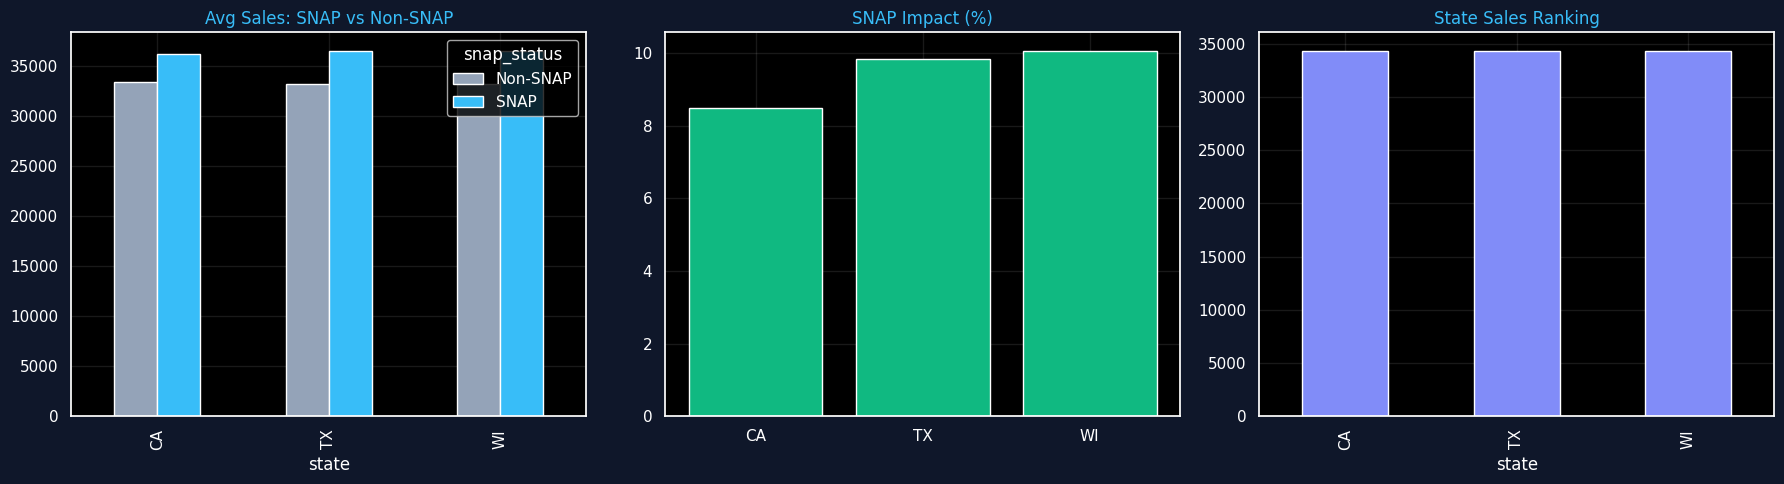

In [49]:

fig, ax = plt.subplots(1, 3, figsize=(18, 5))
plt.style.use('dark_background')
fig.patch.set_facecolor('#0f172a')

pivot_sales = state_df.pivot_table(values="total_sales", index="state", columns="snap_status", aggfunc="mean")
pivot_sales.plot(kind="bar", ax=ax[0], color=['#94a3b8', '#38bdf8'])
ax[0].set_title("Avg Sales: SNAP vs Non-SNAP", color='#38bdf8')
ax[0].grid(alpha=0.1)


ax[1].bar(snap_summary["state"], snap_summary["impact_pct"], color='#10b981')
ax[1].axhline(0, color="white", linewidth=0.8)
ax[1].set_title("SNAP Impact (%)", color='#38bdf8')
ax[1].grid(alpha=0.1)


state_rank = state_df.groupby("state")["total_sales"].mean().sort_values(ascending=False)
state_rank.plot(kind="bar", ax=ax[2], color='#818cf8')
ax[2].set_title("State Sales Ranking", color='#38bdf8')
ax[2].grid(alpha=0.1)

plt.tight_layout()
plt.show()


best_state = state_rank.idxmax()
most_sensitive = snap_summary.loc[snap_summary["impact_pct"].abs().idxmax()]

strategy_list = ""
for _, r in snap_summary.iterrows():
    if r["impact_pct"] > 5:
        strategy_list += f'<div class="strategy-item plus">🚀 {r["state"]}: <b>Scale inventory UP</b> on SNAP days.</div>'
    elif r["impact_pct"] < -5:
        strategy_list += f'<div class="strategy-item minus">⚠️ {r["state"]}: SNAP days underperform – investigate logic.</div>'
    else:
        strategy_list += f'<div class="strategy-item neutral">⚖️ {r["state"]}: Stable demand during SNAP cycles.</div>'


html_final = f"""
<style>
    @import url('https://fonts.cdnfonts.com/css/vazirmatn');
    .decision-panel {{
        background: #0f172a; font-family: 'Vazirmatn', sans-serif; direction: ltr;
        padding: 30px; border-radius: 24px; color: #f8fafc; max-width: 950px; margin: 20px auto;
        border: 1px solid #1e293b; box-shadow: 0 20px 40px rgba(0,0,0,0.4);
    }}
    .panel-header {{ border-bottom: 2px solid #334155; padding-bottom: 15px; margin-bottom: 25px; text-align: center; }}
    .rank-grid {{ display: grid; grid-template-columns: 1fr 1fr; gap: 20px; margin-bottom: 30px; }}
    .rank-card {{
        background: rgba(56, 189, 248, 0.05); padding: 20px; border-radius: 16px;
        border: 1px solid rgba(56, 189, 248, 0.2); text-align: center;
    }}
    .rank-card.highlight {{ border-color: #f59e0b; background: rgba(245, 158, 11, 0.05); }}
    .val-text {{ font-size: 28px; font-weight: 800; display: block; margin-top: 5px; color: #38bdf8; }}
    .strategy-box {{ background: #1e293b; padding: 20px; border-radius: 16px; }}
    .strategy-item {{ padding: 12px; margin-bottom: 8px; border-radius: 8px; font-size: 14px; direction: ltr; text-align: left; }}
    .strategy-item.plus {{ background: rgba(16, 185, 129, 0.1); border-left: 4px solid #10b981; }}
    .strategy-item.minus {{ background: rgba(239, 68, 68, 0.1); border-left: 4px solid #ef4444; }}
    .strategy-item.neutral {{ background: rgba(148, 163, 184, 0.1); border-left: 4px solid #94a3b8; }}
</style>

<div class="decision-panel">
    <div class="panel-header">
        <h2 style="margin:0; color:#38bdf8;">🧠 Final Output & Strategic Decisions</h2>
    </div>

    <div class="rank-grid">
        <div class="rank-card">
            <span style="font-size: 14px; color: #94a3b8;">🥇 Top State by Sales</span>
            <span class="val-text">{best_state}</span>
        </div>
        <div class="rank-card highlight">
            <span style="font-size: 14px; color: #94a3b8;">📊 Most SNAP-Sensitive State</span>
            <span class="val-text" style="color:#f59e0b">{most_sensitive['state']} ({most_sensitive['impact_pct']}%)</span>
        </div>
    </div>

    <div class="strategy-box">
        <h3 style="margin-top:0; font-size: 18px; color: #38bdf8; text-align: left;">📋 Actionable Recommendations:</h3>
        {strategy_list}
    </div>
</div>
"""


display(HTML(html_final))

<div style="direction:ltr;font-family:Tahoma,Arial,sans-serif;max-width:900px;margin:20px auto;background:#fff;padding:25px;border-radius:12px;box-shadow:0 4px 15px rgba(0,0,0,0.1);line-height:1.6;color:#333;">
    <h1 style="text-align:center;color:#0044cc;border-bottom:2px solid #eee;padding-bottom:10px;font-size:24px;">SNAP Impact Analysis Report</h1>
    <div style="margin-bottom:30px;">
        <h2 style="color:#0044cc;font-size:20px;">Key Decisions</h2>
        <ul style="list-style:none;padding:0;">
            <li><strong>Top State:</strong> CA</li>
            <li><strong>Most Sensitive To SNAP:</strong> WI (10.07%)</li>
        </ul>
        <table style="width:100%; border-collapse:collapse; margin-top:15px;">
            <thead>
                <tr style="background:#e6f2ff;">
                    <th style="padding:10px;border:1px solid #ddd;">State</th>
                    <th style="padding:10px;border:1px solid #ddd;">SNAP Days</th>
                    <th style="padding:10px;border:1px solid #ddd;">Sales (SNAP)</th>
                    <th style="padding:10px;border:1px solid #ddd;">Sales (Normal)</th>
                    <th style="padding:10px;border:1px solid #ddd;">Influence</th>
                </tr>
            </thead>
            <tbody>
                <tr>
                    <td style="padding:10px;border:1px solid #ddd;">CA</td>
                    <td style="padding:10px;border:1px solid #ddd;">630</td>
                    <td style="padding:10px;border:1px solid #ddd;">36,241</td>
                    <td style="padding:10px;border:1px solid #ddd;">33,408</td>
                    <td style="padding:10px;border:1px solid #ddd;">8.48%</td>
                </tr>
                <tr style="background:#f9f9f9;">
                    <td style="padding:10px;border:1px solid #ddd;">TX</td>
                    <td style="padding:10px;border:1px solid #ddd;">630</td>
                    <td style="padding:10px;border:1px solid #ddd;">36,538</td>
                    <td style="padding:10px;border:1px solid #ddd;">33,263</td>
                    <td style="padding:10px;border:1px solid #ddd;">9.85%</td>
                </tr>
                <tr>
                    <td style="padding:10px;border:1px solid #ddd;">WI</td>
                    <td style="padding:10px;border:1px solid #ddd;">630</td>
                    <td style="padding:10px;border:1px solid #ddd;">36,585</td>
                    <td style="padding:10px;border:1px solid #ddd;">33,239</td>
                    <td style="padding:10px;border:1px solid #ddd;">10.07%</td>
                </tr>
            </tbody>
        </table>
    </div>
    <div style="margin-top:20px;">
        <h2 style="color:#0044cc;font-size:20px;">Strategic Recommendations</h2>
        <div style="background:#f0f7ff;padding:15px;margin:10px 0;border-left:5px solid #007bff;border-radius:4px;">
            <strong>Product Optimization:</strong> Focus on the FOODS category and increase product supply proportional to the influence percentage of each state (8.5% to 10.1%).
        </div>
        <div style="background:#f0f7ff;padding:15px;margin:10px 0;border-left:5px solid #007bff;border-radius:4px;">
            <strong>Operations:</strong> Set staff shifts and advertising budgets based on the SNAP deposit calendar.
        </div>
    </div>
</div>










<div style="
    width: 90%; 
    max-width: 400px; 
    margin: 20px auto;
    padding: 18px 10px;
    background: linear-gradient(145deg, #0f0f0f, #151515);
    border-radius: 12px;
    border: 1px solid #c200b8;
    box-shadow: 0 0 20px rgba(191, 0, 194, 0.2), inset 0 0 5pxrgba(194, 0, 139, 0.1));   
    color: #ffffff;
    text-align: center;
    font-family: 'Segoe UI', system-ui, -apple-system, sans-serif;
    font-size: clamp(18px, 5vw, 24px); /* فونت هوشمند که با سایز صفحه تغییر میکند */
    font-weight: 800;
    text-transform: uppercase;
    letter-spacing: 3px;
    text-shadow: 0 0 10px rgba(194, 0, 133, 0.5);   
    position: relative;
    overflow: hidden;
">
    <div style="position: absolute; top: 0; left: 50%; transform: translateX(-50%); width: 40%; height: 2px; background: #7400c2; box-shadow: 0 0 10px #9e00c2;"></div>   
Outliers & Peak Days
</div>





In [50]:


eda_daily["is_peak"] = eda_daily["sales_zscore"] > 1.5
eda_daily["is_low"]  = eda_daily["sales_zscore"] < -1.5

peak_days = eda_daily[eda_daily["is_peak"]]
low_days  = eda_daily[eda_daily["is_low"]]


peak_list = "".join([f"<tr><td>{r['d']}</td><td>{r['total_sales']}</td><td style='color:#4ade80'>+{r['sales_zscore']}</td></tr>" 
                     for _, r in peak_days.head(10).round(2).iterrows()])

low_list = "".join([f"<tr><td>{r['d']}</td><td>{r['total_sales']}</td><td style='color:#fb7185'>{r['sales_zscore']}</td></tr>" 
                    for _, r in low_days.head(10).round(2).iterrows()])





# ______________________________________________________________________________________________________
html_outliers = f"""
<style>
    @import url('https://fonts.cdnfonts.com/css/vazirmatn');
    .monitor-panel {{
        background: #020617; font-family: 'Vazirmatn', sans-serif; direction: ltr;
        padding: 25px; border-radius: 20px; color: #f8fafc; max-width: 900px; margin: auto;
        border: 2px solid #1e293b;
    }}
    .monitor-header {{
        display: flex; justify-content: space-between; align-items: center;
        margin-bottom: 20px; border-bottom: 1px solid #334155; padding-bottom: 15px;
    }}
    .stat-row {{ display: grid; grid-template-columns: repeat(3, 1fr); gap: 15px; margin-bottom: 25px; }}
    .stat-box {{ background: #1e293b; padding: 15px; border-radius: 12px; text-align: center; border: 1px solid #334155; }}
    .grid-tables {{ display: grid; grid-template-columns: 1fr 1fr; gap: 20px; }}
    table {{ width: 100%; border-collapse: collapse; font-size: 12px; background: rgba(0,0,0,0.2); }}
    th {{ background: #334155; padding: 10px; color: #94a3b8; text-align: center; }}
    td {{ padding: 8px; text-align: center; border-bottom: 1px solid #1e293b; }}
    .alert-green {{ color: #4ade80; font-weight: bold; }}
    .alert-red {{ color: #fb7185; font-weight: bold; }}
</style>

<div class="monitor-panel">
    <div class="monitor-header">
        <h2 style="margin:0;">🔍 Sales Outlier Monitoring System</h2>
        <span style="font-size: 12px; background: #334155; padding: 4px 12px; border-radius: 20px;">Z-Score Threshold: 1.5</span>
    </div>

    <div class="stat-row">
        <div class="stat-box">
            <small style="color: #94a3b8;">Total Days Analyzed</small>
            <div style="font-size: 20px; font-weight: bold;">{len(eda_daily)}</div>
        </div>
        <div class="stat-box" style="border-bottom: 3px solid #4ade80;">
            <small style="color: #4ade80;">Peak Days</small>
            <div style="font-size: 20px; font-weight: bold;">{len(peak_days)}</div>
        </div>
        <div class="stat-box" style="border-bottom: 3px solid #fb7185;">
            <small style="color: #fb7185;">Low Days</small>
            <div style="font-size: 20px; font-weight: bold;">{len(low_days)}</div>
        </div>
    </div>

    <div class="grid-tables">
        <div>
            <h4 class="alert-green" style="text-align:center;">📈 Top 10 Peak Days</h4>
            <table>
                <thead><tr><th>ID</th><th>Sales</th><th>Z-Score</th></tr></thead>
                <tbody>{peak_list}</tbody>
            </table>
        </div>
        <div>
            <h4 class="alert-red" style="text-align:center;">📉 Bottom 10 Low Days</h4>
            <table>
                <thead><tr><th>ID</th><th>Sales</th><th>Z-Score</th></tr></thead>
                <tbody>{low_list}</tbody>
            </table>
        </div>
    </div>
</div>
"""

display(HTML(html_outliers))


ID,Sales,Z-Score
d_435,45638,+1.54
d_562,45798,+1.56
d_590,46649,+1.68
d_596,45959,+1.58
d_715,45878,+1.57
d_736,51032,+2.27
d_743,45852,+1.57
d_764,49772,+2.1
d_765,48247,+1.89
d_792,46410,+1.64


In [51]:

eda_daily["event"] = eda_daily["event_name_1"].fillna("No_occasion")
event_summary = (
    eda_daily
    .groupby("event")
    .agg(
        avg_sales=("total_sales", "mean"),
        count=("total_sales", "count"),
        max_sales=("total_sales", "max"),
        min_sales=("total_sales", "min")
    )
    .round(0)
)

No_occasion_avg = event_summary.loc["No_occasion", "avg_sales"]
event_summary["impact_vs_No_occasion_%"] = (
    (event_summary["avg_sales"] - No_occasion_avg) / No_occasion_avg * 100
).round(1)


event_outliers = eda_daily.groupby("event")[["is_peak", "is_low"]].any().any(axis=1)
event_summary["contains_outlier"] = event_outliers


sorted_events = event_summary.sort_values("impact_vs_No_occasion_%", ascending=False).head(10)


table_rows = ""
for event, row in sorted_events.iterrows():
    impact = row['impact_vs_No_occasion_%']
    color = "#4ade80" if impact > 0 else "#fb7185"
    outlier_badge = "⚠️ Yes" if row['contains_outlier'] else "✅ Stable"
    outlier_color = "#f59e0b" if row['contains_outlier'] else "#94a3b8"
    
    table_rows += f"""
    <tr>
        <td style="text-align:right; font-weight:bold;">{event}</td>
        <td>{int(row['avg_sales']):,}</td>
        <td style="color:{color}; font-weight:bold;">{"+" if impact > 0 else ""}{impact}%</td>
        <td>{int(row['count'])}</td>
        <td style="color:{outlier_color}; font-size:11px;">{outlier_badge}</td>
    </tr>
    """

html_events = f"""
<style>
    @import url('https://fonts.cdnfonts.com/css/vazirmatn');
    .event-panel {{
        background: #0f172a; font-family: 'Vazirmatn', sans-serif; direction: ltr;
        padding: 25px; border-radius: 20px; color: #f1f5f9; max-width: 900px; margin: auto;
        border: 1px solid #334155; box-shadow: 0 15px 30px rgba(0,0,0,0.5);
    }}
    .event-header {{ text-align: center; margin-bottom: 25px; }}
    .base-avg-box {{
        background: rgba(56, 189, 248, 0.1); border: 1px dashed #38bdf8;
        padding: 10px; border-radius: 12px; display: inline-block; margin-bottom: 20px;
    }}
    table {{ width: 100%; border-collapse: collapse; background: #1e293b; border-radius: 15px; overflow: hidden; }}
    th {{ background: #334155; padding: 12px; color: #38bdf8; font-size: 13px; text-align: center; }}
    td {{ padding: 12px; text-align: center; border-bottom: 1px solid #0f172a; font-size: 13px; }}
    tr:hover td {{ background: rgba(255,255,255,0.05); }}
    .legend {{ display: flex; gap: 20px; justify-content: center; margin-top: 15px; font-size: 11px; color: #94a3b8; }}
</style>

<div class="event-panel">
    <div class="event-header">
        <h2 style="margin:0; color:#38bdf8;">🎭 Event Impact on Sales Analysis</h2>
        <div class="base-avg-box">
            Average Sales on Regular Days (No Event): <b>{int(No_occasion_avg):,}</b>
        </div>
    </div>

    <table>
        <thead>
            <tr>
                <th>Event Name</th>
                <th>Average Sales</th>
                <th>Impact vs Baseline (%)</th>
                <th>Occurrences (Days)</th>
                <th>Volatility Status</th>
            </tr>
        </thead>
        <tbody>
            {table_rows}
        </tbody>
    </table>

    <div class="legend">
        <span>🔹 Comparison Baseline: Average sales on No Event days</span>
        <span>⚠️ Outlier: Indicates presence of abnormal peaks during this event</span>
    </div>
</div>
"""

display(HTML(html_events))


Event Name,Average Sales,Impact vs Baseline (%),Occurrences (Days),Volatility Status
LaborDay,"42,155",+22.2%,5,⚠️ Yes
SuperBowl,"40,924",+18.7%,6,⚠️ Yes
Easter,"39,518",+14.6%,5,⚠️ Yes
OrthodoxEaster,"38,277",+11.0%,4,⚠️ Yes
Father's day,"36,562",+6.0%,4,✅ Stable
Purim End,"35,957",+4.3%,6,⚠️ Yes
Eid al-Fitr,"35,268",+2.3%,5,⚠️ Yes
ColumbusDay,"35,165",+2.0%,5,✅ Stable
VeteransDay,"35,119",+1.8%,5,✅ Stable
Ramadan starts,"34,780",+0.8%,5,✅ Stable


In [52]:


peak_days["event"] = eda_daily["event_name_1"].fillna("No Event")
pos_list = [str(e) for e in event_summary[event_summary["impact_vs_No_occasion_%"] > 0].index if str(e) != 'No_occasion']
neg_list = [str(e) for e in event_summary[event_summary["impact_vs_No_occasion_%"] < 0].index if str(e) != 'No_occasion']
unique_peaks = [str(e) for e in peak_days['event'].unique() if str(e) != 'nan']

# -------------------------------
# (UI)
# -------------------------------
html_insights = f"""
<style>
    @import url('https://fonts.cdnfonts.com/css/vazirmatn');
    .insight-wrapper {{
        background: #0f172a; font-family: 'Vazirmatn', sans-serif; direction: ltr;
        padding: 30px; border-radius: 24px; color: #f8fafc; max-width: 950px; margin: auto;
        border: 1px solid #1e293b; box-shadow: 0 25px 50px -12px rgba(0,0,0,0.5);
    }}
    .insight-header {{
        border-bottom: 2px solid #334155; padding-bottom: 15px; margin-bottom: 25px;
        display: flex; align-items: center; gap: 15px;
    }}
    .insight-card {{
        background: #1e293b; padding: 20px; border-radius: 16px; margin-bottom: 15px;
        border-right: 5px solid #38bdf8; position: relative;
    }}
    .insight-card.warning {{ border-right-color: #fb7185; }}
    .insight-card.success {{ border-right-color: #4ade80; }}
    
    .tag-container {{ display: flex; flex-wrap: wrap; gap: 8px; margin-top: 10px; }}
    .tag {{
        padding: 4px 12px; border-radius: 20px; font-size: 11px; font-weight: bold;
        background: rgba(255,255,255,0.05); border: 1px solid rgba(255,255,255,0.1);
    }}
    .tag.pos {{ color: #4ade80; border-color: rgba(74, 222, 128, 0.3); }}
    .tag.neg {{ color: #fb7185; border-color: rgba(251, 113, 133, 0.3); }}
    .tag.peak {{ color: #38bdf8; border-color: rgba(56, 189, 248, 0.3); }}
    
    .label {{ font-weight: 800; font-size: 16px; display: block; margin-bottom: 5px; }}
    .desc {{ font-size: 14px; color: #94a3b8; line-height: 1.6; }}
</style>

<div class="insight-wrapper">
    <div class="insight-header">
        <h2 style="margin:0;">🧠 Final Analysis & Key EDA Insights</h2>
    </div>

    <div class="insight-card">
        <span class="label" style="color:#38bdf8;">📈 Peak Sales Patterns</span>
        <span class="desc">Peak sales days strongly correlate with calendar events. This means demand on these days is not "organic" but directly driven by events:</span>
        <div class="tag-container">
            {" ".join([f'<span class="tag peak">{e}</span>' for e in unique_peaks[:8]])}
            <span class="tag">...</span>
        </div>
    </div>

    <div class="insight-card success">
        <span class="label" style="color:#4ade80;">🚀 Growth Drivers (Positive Impact Events)</span>
        <span class="desc">The following events have, on average, increased sales compared to normal days:</span>
        <div class="tag-container">
            {" ".join([f'<span class="tag pos">{e}</span>' for e in pos_list[:12]])}
        </div>
    </div>

    <div class="insight-card warning">
        <span class="label" style="color:#fb7185;">🔻 Suppressive Factors (Negative Impact Events)</span>
        <span class="desc">These events show a drop or suppression in demand relative to average no-event days:</span>
        <div class="tag-container">
            {" ".join([f'<span class="tag neg">{e}</span>' for e in neg_list[:12]])}
        </div>
    </div>

    <div style="font-size: 12px; color: #475569; text-align: center; margin-top: 20px;">
        💡 These insights form the foundation for inventory planning and marketing campaign strategies.
    </div>
</div>
"""

display(HTML(html_insights))


<div style="direction:ltr;font-family:Tahoma,Arial,sans-serif;max-width:900px;margin:20px auto;background:#fff;padding:25px;border-radius:12px;box-shadow:0 4px 15px rgba(0,0,0,0.1);line-height:1.6;color:#333;"><h1 style="text-align:center;color:#d32f2f;border-bottom:2px solid #eee;padding-bottom:10px;font-size:24px;">Special Events & Sales Calendar Analysis</h1><div style="margin-bottom:25px;"><h2 style="color:#d32f2f;font-size:20px;">🚀 Peak Points (Key Occasions)</h2><div style="background:#f1f8e9;padding:15px;margin:10px 0;border-right:5px solid #4caf50;border-radius:4px;">Sales peak during occasions like <strong>Labor Day</strong>, <strong>Eid al-Fitr</strong>, and <strong>Super Bowl</strong>. These days are golden opportunities for marketing campaigns.</div></div><div style="margin-bottom:25px;"><h2 style="color:#d32f2f;font-size:20px;">🛑 Complete Sales Stop (100% Drop)</h2><div style="background:#fff1f0;padding:15px;margin:10px 0;border-right:5px solid #f5222d;border-radius:4px;">Events like <strong>Christmas</strong> and <strong>Thanksgiving</strong> cause severe sales drops up to complete halt (100% decrease), indicating store closures or total shift in consumer behavior.</div></div><div style="margin-top:20px;"><h2 style="color:#d32f2f;font-size:20px;">🔍 Low Demand & Slow Periods</h2><div style="background:#f5f5f5;padding:15px;margin:10px 0;border-right:5px solid #9e9e9e;border-radius:4px;">Certain low-sales days appear in the calendar, aligning with <strong>non-promotional periods</strong> or <strong>intentional demand suppression</strong>, requiring inventory planning adjustments.</div></div><div style="background:#2c3e50;color:#fff;padding:12px;border-radius:8px;text-align:center;margin-top:20px;font-size:14px;">Note: Aligning the supply chain with these extreme fluctuations (0–100%) is critical to avoid losses.</div></div>


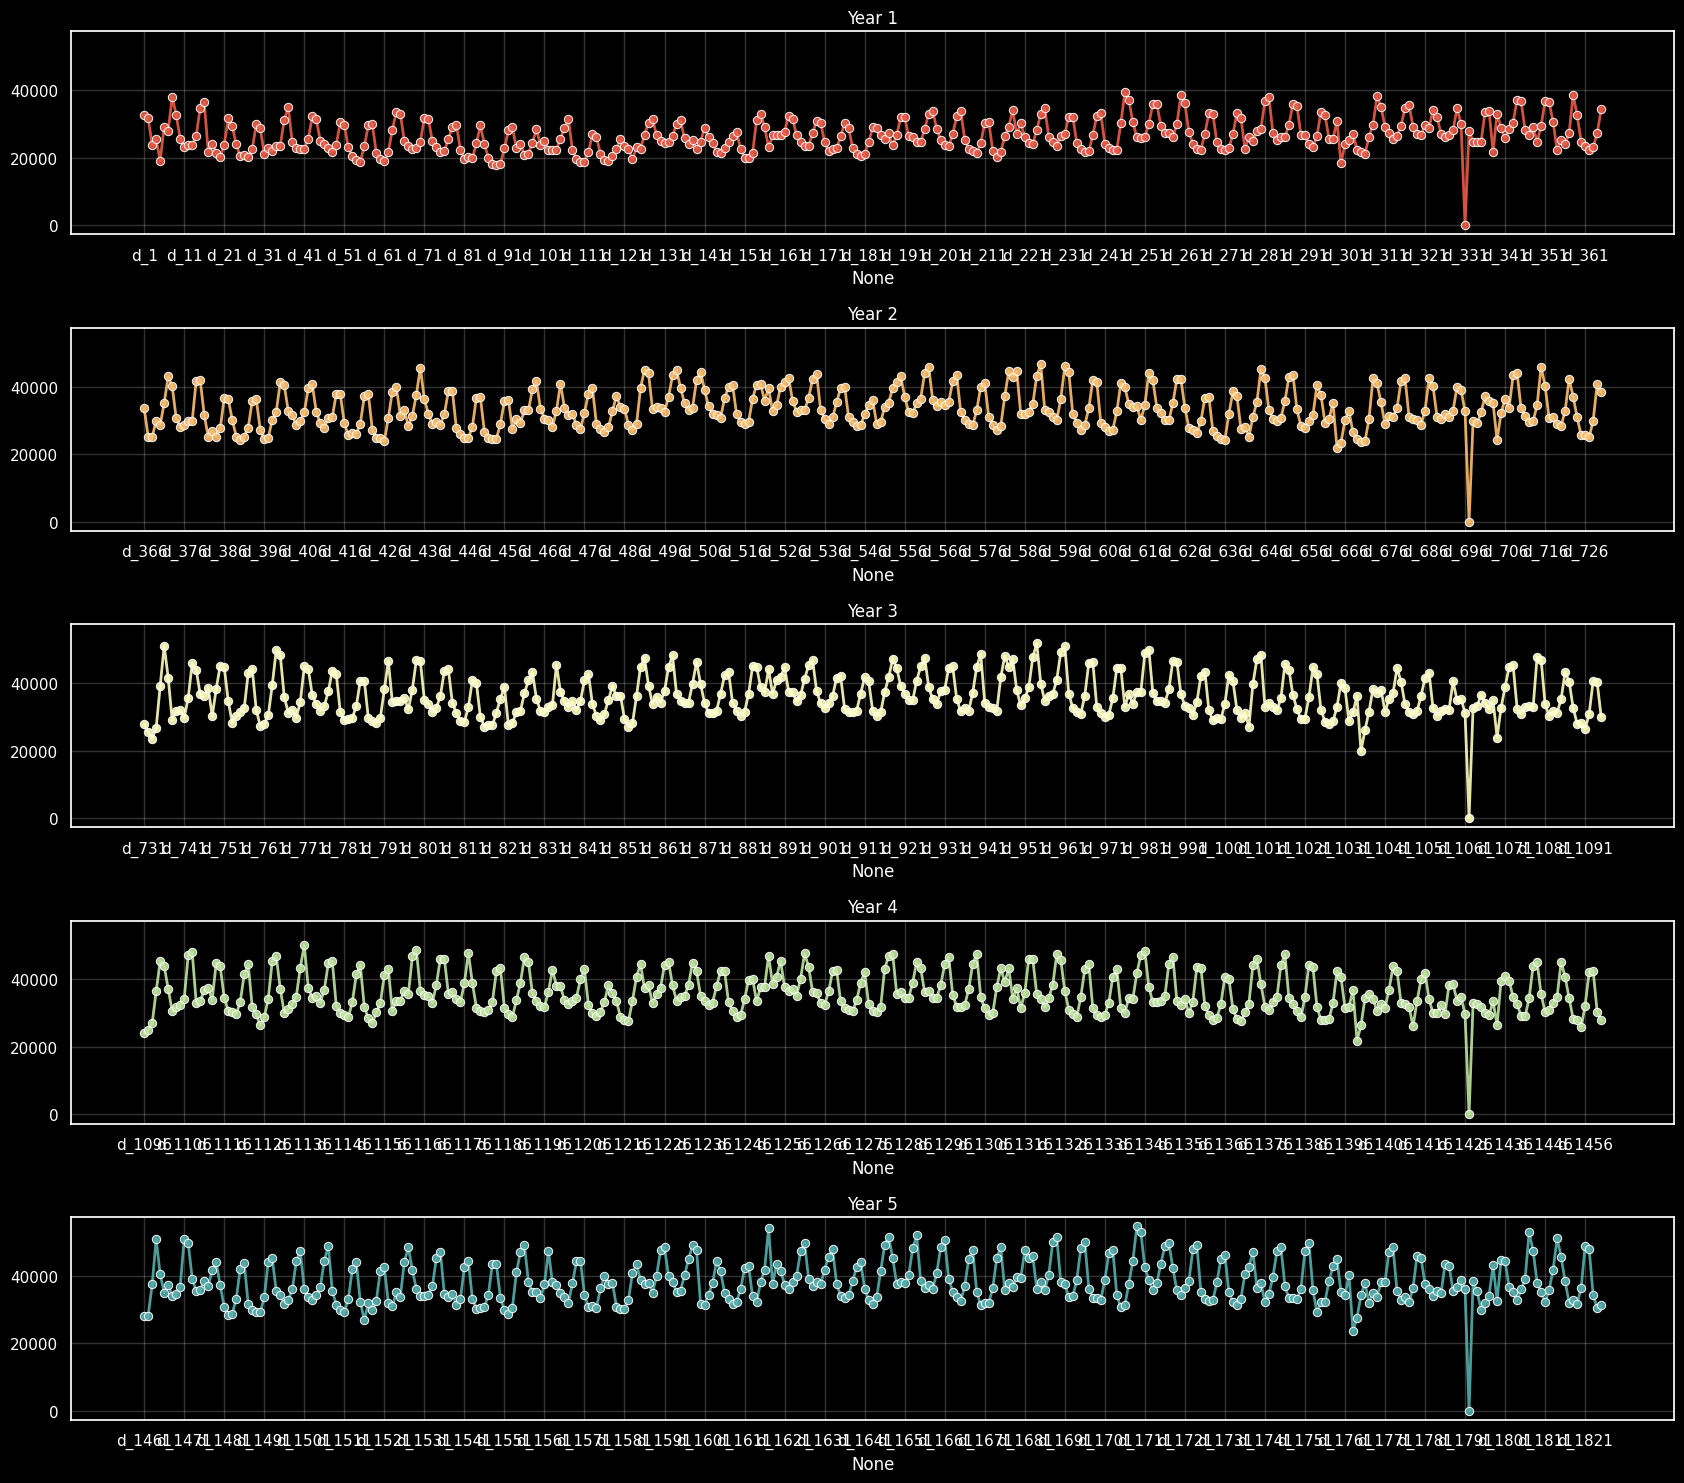

In [58]:


years_to_plot = 5
days_per_year = 365

colors = sns.color_palette("Spectral", n_colors=years_to_plot)

fig, axes = plt.subplots(years_to_plot, 1, figsize=(17, 3*years_to_plot), sharey=True)
fig.patch.set_facecolor('black') 

for i in range(years_to_plot):
    start = i * days_per_year
    end = start + days_per_year
    
    means = day.iloc[:, start:end].apply(pd.to_numeric, errors='coerce').sum(axis=0)
    
    ax = axes[i] if years_to_plot > 1 else axes
    sns.lineplot(
        x=means.index,
        y=means.values,
        marker="o",
        markersize=6,
        linewidth=2,
        color=colors[i],
        alpha=0.9,
        ax=ax
    )
    
    ax.set_facecolor('black')
    ax.set_title(f"Year {i+1}", color='white', fontsize=12)
    ax.tick_params(colors='white', which='both')
    ax.grid(True, color="white", alpha=0.2)
    
    ax.set_xticks(means.index[::10])
    
plt.tight_layout()
plt.show()


In [59]:
tet=eda_daily[eda_daily["total_sales"]<=20]
tet

,d,total_sales,wday,weekday,month,year,event_name_1,event_type_1,snap_CA,snap_TX,snap_WI,log_total_sales,sales_zscore,is_peak,is_low,event
330,d_331,13,2,Sunday,12,2011,Christmas,National,0,0,0,2.639057,-4.673156,False,True,Christmas
696,d_697,11,4,Tuesday,12,2012,Christmas,National,0,0,0,2.484907,-4.673428,False,True,Christmas
1061,d_1062,20,5,Wednesday,12,2013,Christmas,National,0,0,0,3.044522,-4.672203,False,True,Christmas
1426,d_1427,20,6,Thursday,12,2014,Christmas,National,0,0,0,3.044522,-4.672203,False,True,Christmas
1791,d_1792,14,7,Friday,12,2015,Christmas,National,0,0,0,2.708050,-4.673020,False,True,Christmas


In [60]:
days = ['d_1062', 'd_1427', 'd_1792', 'd_697', 'd_331']
filtered_df = eda_daily[eda_daily['d'].isin(days)][['d', 'event_name_1']].fillna("—")

html = """
<style>
.event-table {
    border-collapse: collapse;
    width: 70%;
    margin: 20px 0;
    font-family: "Segoe UI", Arial, sans-serif;
    background-color: #020617;
    color: #e5e7eb;
    box-shadow: 0 18px 45px rgba(0,0,0,0.7);
    border-radius: 14px;
    overflow: hidden;
}
.event-table th {
    background-color: #020617;
    color: #c7d2fe;
    padding: 16px;
    font-size: 14px;
    letter-spacing: 1px;
    border-bottom: 1px solid #1e293b;
}
.event-table td {
    padding: 14px;
    text-align: center;
    font-size: 14px;
    border-bottom: 1px solid #1e293b;
}
.event-table tr:nth-child(even) {
    background-color: #020617;
}
.event-table tr:nth-child(odd) {
    background-color: #020617cc;
}
.event-table tr:hover {
    background-color: #1e293b;
    transition: background-color 0.2s ease;
}
.day-col {
    font-weight: 700;
    color: #94a3b8;
    font-family: monospace;
}
</style>

<table class="event-table">
    <tr>
        <th>DAY</th>
        <th>EVENT NAME</th>
    </tr>
"""

for _, row in filtered_df.iterrows():
    html += f"""
    <tr>
        <td class="day-col">{row['d']}</td>
        <td>{row['event_name_1']}</td>
    </tr>
    """

html += "</table>"

display(HTML(html))


DAY,EVENT NAME
d_331,Christmas
d_697,Christmas
d_1062,Christmas
d_1427,Christmas
d_1792,Christmas


<div class="analysis-report" dir="rtl">
  <style>
    @import url('https://fonts.cdnfonts.com/css/vazirmatn');
    .analysis-report {
      background: linear-gradient(135deg, #f4f6f9, #dfe6e9);
      padding: 32px 20px;
      border-radius: 24px;
      font-family: 'Vazirmatn', sans-serif;
      color: #2f3640;
      max-width: 1000px;
      margin: 30px auto;
      box-shadow: 0 18px 40px rgba(0, 0, 0, .08);
    }
    .report-header {
      text-align: center;
      margin-bottom: 36px;
    }
    .report-header h2 {
      font-weight: 900;
      color: #1e3799;
      font-size: 26px;
      margin-bottom: 8px;
    }
    .report-header p {
      font-size: 14px;
      color: #636e72;
    }
    .divider {
      width: 70px;
      height: 4px;
      background: #4834d4;
      margin: 12px auto 0;
      border-radius: 2px;
    }
    .grid-container {
      display: grid;
      grid-template-columns: repeat(auto-fit, minmax(260px, 1fr));
      gap: 22px;
    }
    .card {
      background: rgba(255, 255, 255, .9);
      padding: 22px 20px;
      border-radius: 18px;
      border: 1px solid rgba(0, 0, 0, .05);
      display: flex;
      flex-direction: column;
      justify-content: space-between;
    }
    .card-title {
      font-weight: 800;
      font-size: 16px;
      color: #273c75;
      margin-bottom: 10px;
      display: flex;
      align-items: center;
      gap: 8px;
    }
    .card-content {
      font-size: 14px;
      line-height: 1.9;
      color: #57606f;
    }
    .highlight {
      font-weight: 700;
      color: #c0392b;
      background: rgba(192, 57, 43, .08);
      padding: 2px 6px;
      border-radius: 4px;
      display: inline-block;
      direction: ltr;
    }
    .badge {
      background: #27ae60;
      color: #fff;
      padding: 3px 10px;
      border-radius: 50px;
      font-size: 11px;
      font-weight: 700;
    }
    @media(max-width: 600px) {
      .report-header h2 { font-size: 22px; }
      .card-title { font-size: 15px; }
      .card-content { font-size: 13.5px; }
    }
  </style>

  <div class="report-header">
    <h2>Analysis Report</h2>
    <p>Strategic Insights & Operational Action Plan</p>
    <div class="divider"></div>
  </div>

  <div class="grid-container">
    <div class="card">
      <div class="card-title">📅 Peak Sales Days Analysis</div>
      <p class="card-content">
        Data shows the highest revenue occurs on <span class="highlight">Saturday & Sunday</span>. It is recommended to increase <b>inventory levels</b> and <b>sales staff</b> during these periods.
      </p>
    </div>
    <div class="card">
      <div class="card-title">📉 Midweek Sales Optimization</div>
      <p class="card-content">
        Demand drops in the middle of the week. Implementing <b>targeted discounts</b> and promotional campaigns is advised to boost sales.
      </p>
    </div>
    <div class="card">
      <div class="card-title">☀️ Seasonal Demand Patterns</div>
      <p class="card-content">
        Demand peaks in months <span class="highlight">July & August</span>, requiring increased warehouse capacity. During low-demand seasons, <b>flexible pricing strategies</b> are more effective.
      </p>
    </div>
    <div class="card">
      <div class="card-title">🔔 Events & SNAP Payments</div>
      <p class="card-content">
        During <span class="badge">SNAP</span> payment periods in CA, TX, and WI, inventory levels should be higher. Special planning is also required for events such as <span class="highlight">Labor Day</span> and <span class="highlight">Super Bowl</span>.
      </p>
    </div>
  </div>
</div>


 Charts

Average sales per product category

In [61]:
hOBBIES=df[df["cat_id"]=="HOBBIES"]
fOODS=df[df["cat_id"]=="FOODS"]
hOUSEHOLD=df[df["cat_id"]=="HOUSEHOLD"]

In [62]:
day_hs = hOBBIES.iloc[:, 6:]
day_f = fOODS.iloc[:, 6:]
day_hd = hOUSEHOLD.iloc[:, 6:]

x = day_hs.values.sum()
x1 = day_f.values.sum()
x2 = day_hd.values.sum()

html_output = f"""
<div style="
    background-color: #1e1e1e;
    color: white;
    padding: 20px;
    border-radius: 15px;
    font-family: Arial, sans-serif;
    width: 300px;
">
    <h3 style="text-align:center;">Total Expenses</h3>
    <p><strong>HOBBIES ➡️</strong> {x} $</p>
    <p><strong>FOODS ➡️</strong> {x1} $</p>
    <p><strong>HOUSEHOLD ➡️</strong> {x2} $</p>
</div>
"""

# نمایش در Jupyter Notebook یا محیط HTML
from IPython.core.display import display, HTML
display(HTML(html_output))


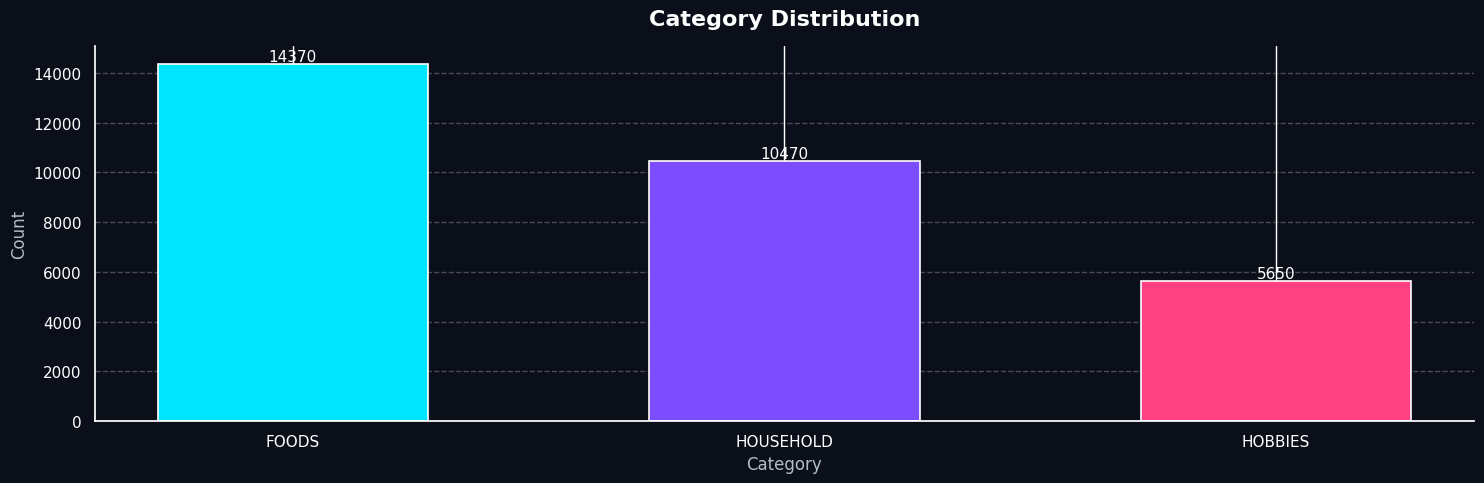

In [63]:
import matplotlib.pyplot as plt
import numpy as np

counts = df["cat_id"].value_counts()

plt.style.use("dark_background")

fig, ax = plt.subplots(figsize=(15, 5))
fig.patch.set_facecolor("#0b0f1a")
ax.set_facecolor("#0b0f1a")

bars = ax.bar(
    counts.index,
    counts.values,
    color=["#00E5FF", "#7C4DFF", "#FF4081"],
    width=0.55,
    edgecolor="white",
    linewidth=1.2
)


ax.set_title(
    "Category Distribution",
    fontsize=16,
    fontweight="bold",
    color="white",
    pad=15
)
ax.set_xlabel("Category", fontsize=12, color="#B0BEC5")
ax.set_ylabel("Count", fontsize=12, color="#B0BEC5")


ax.grid(axis="y", linestyle="--", alpha=0.25)


for bar in bars:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f"{height}",
        ha="center",
        va="bottom",
        fontsize=11,
        color="white"
    )


ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.tight_layout()
plt.show()


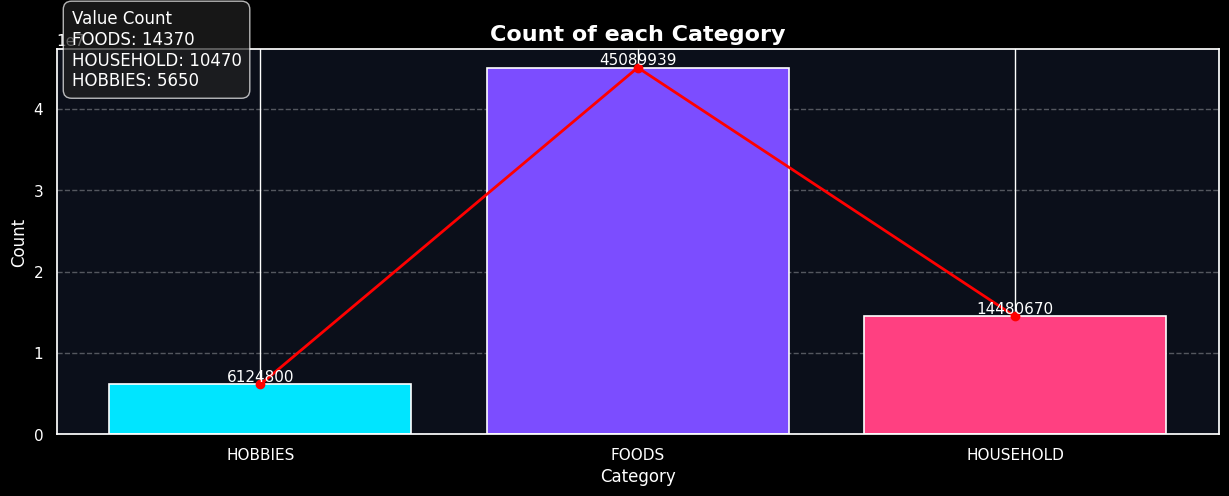

In [64]:
list_pro = ['HOBBIES', 'FOODS', 'HOUSEHOLD']
arr = [x, x1, x2]

# Set figure size and background color
plt.figure(figsize=(15,5))
plt.rcParams['axes.facecolor'] = '#0b0f1a'   # Axes background
plt.rcParams['figure.facecolor'] = '#0b0f1a' # Figure background

colors = ['#00E5FF', '#7C4DFF', '#FF4081']

# Draw bars
bars = plt.bar(list_pro, arr, color=colors, edgecolor='white', linewidth=1.2)

# Draw line connecting the tops of bars
plt.plot(list_pro, arr, color="red", marker='o', linewidth=2)

# Set title and axis labels
plt.title("Count of each Category", fontsize=16, fontweight='bold', color='white')
plt.xlabel("Category", fontsize=12, color='white')
plt.ylabel("Count", fontsize=12, color='white')

# Show value on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, int(yval), 
             ha='center', va='bottom', color='white', fontsize=11)

# Add a light grid for y-axis
plt.grid(axis='y', linestyle='--', alpha=0.3, color='white')

# Prepare value counts as string
total_text = df["cat_id"].value_counts()
total_text_str = "\n".join([f"{cat}: {val}" for cat, val in zip(total_text.index, total_text.values)])

# Add box inside plot
plt.text(
    -0.5, max(arr)*0.95,  # position inside plot
    "Value Count\n" + total_text_str,
    fontsize=12,
    color='white',
    bbox=dict(facecolor='#222', alpha=0.7, boxstyle='round,pad=0.5')
)

plt.show()


هر ایالات 

In [6]:
CA=df[df["state_id"]=="CA"].iloc[:, 6:]
TX=df[df["state_id"]=="TX"].iloc[:, 6:]
WI=df[df["state_id"]=="WI"].iloc[:, 6:]

c = CA.values.sum()
t = TX.values.sum()
wi = WI.values.sum()


# mean 

/tmp/ipykernel_55/2787531263.py:17: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




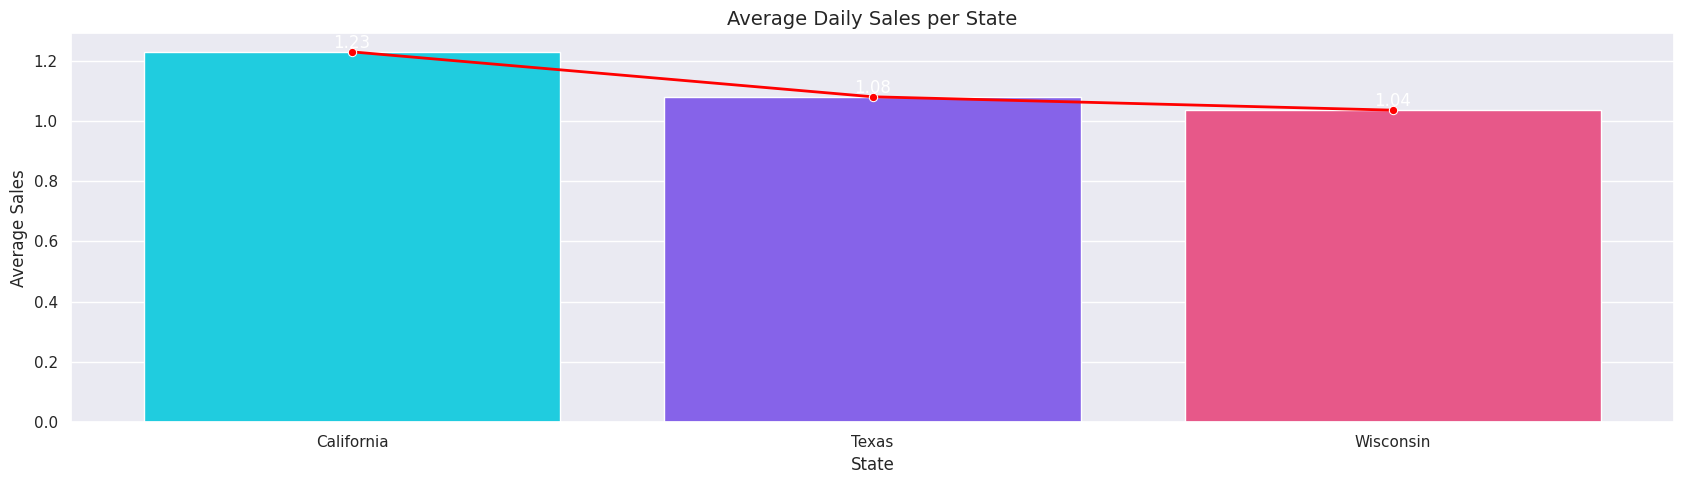

In [7]:

data = {
    'State': ['California', 'Texas', 'Wisconsin'],
    'Average Sales': [
        CA.values.mean(),
        TX.values.mean(),
        WI.values.mean()
    ]
}

chart = pd.DataFrame(data)

sns.set_theme(style="darkgrid")

plt.figure(figsize=(17, 5))


ax = sns.barplot(
    data=chart,
    x='State',
    y='Average Sales',
    palette=['#00E5FF', '#7C4DFF', '#FF4081']
)

sns.lineplot(
    data=chart,
    x='State',
    y='Average Sales',
    marker='o',
    color='red',
    linewidth=2
)


for i, v in enumerate(chart['Average Sales']):
    ax.text(i, v, f"{v:.2f}", ha='center', va='bottom', color='white')


plt.title('Average Daily Sales per State', fontsize=14)
plt.xlabel('State')
plt.ylabel('Average Sales')
plt.tight_layout()

plt.show()


# sum 

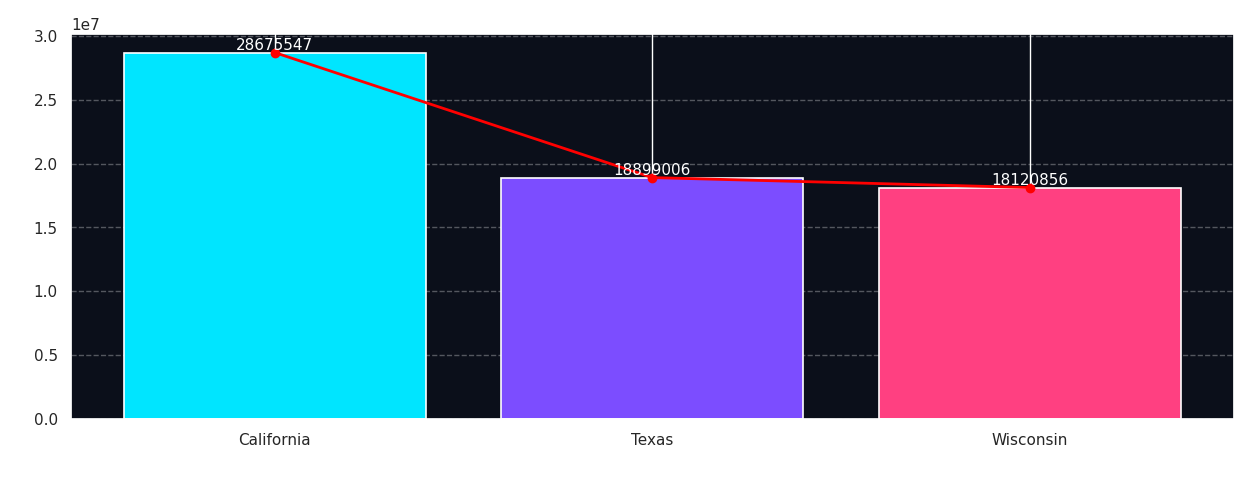

In [8]:
list_pro = ['California', 'Texas', 'Wisconsin']
arr = [c, t, wi]

plt.figure(figsize=(15,5))
plt.rcParams['axes.facecolor'] = '#0b0f1a'   
plt.rcParams['figure.facecolor'] = '#0b0f1a' 

colors = ['#00E5FF', '#7C4DFF', '#FF4081']


bars = plt.bar(list_pro, arr, color=colors, edgecolor='white', linewidth=1.2)


plt.plot(list_pro, arr, color="red", marker='o', linewidth=2)
plt.title("Count of each City", fontsize=16, fontweight='bold', color='white')
plt.xlabel("City", fontsize=12, color='white')
plt.ylabel("Count", fontsize=12, color='white')


for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, int(yval), 
             ha='center', va='bottom', color='white', fontsize=11)


plt.grid(axis='y', linestyle='--', alpha=0.3, color='white')


total_text = df["cat_id"].value_counts()
total_text_str = "\n".join([f"{cat}: {val}" for cat, val in zip(total_text.index, total_text.values)])


plt.show()


# count

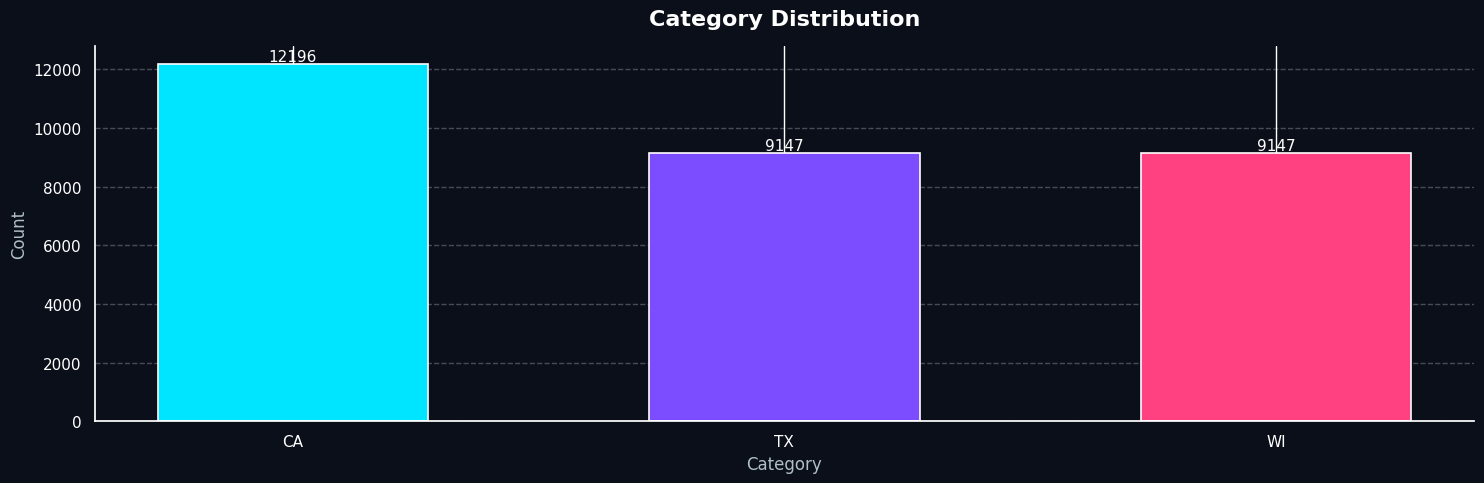

In [9]:
import matplotlib.pyplot as plt
import numpy as np

counts = df["state_id"].value_counts()

plt.style.use("dark_background")

fig, ax = plt.subplots(figsize=(15, 5))
fig.patch.set_facecolor("#0b0f1a")
ax.set_facecolor("#0b0f1a")

bars = ax.bar(
    counts.index,
    counts.values,
    color=["#00E5FF", "#7C4DFF", "#FF4081"],
    width=0.55,
    edgecolor="white",
    linewidth=1.2
)


ax.set_title(
    "Category Distribution",
    fontsize=16,
    fontweight="bold",
    color="white",
    pad=15
)
ax.set_xlabel("Category", fontsize=12, color="#B0BEC5")
ax.set_ylabel("Count", fontsize=12, color="#B0BEC5")


ax.grid(axis="y", linestyle="--", alpha=0.25)


for bar in bars:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f"{height}",
        ha="center",
        va="bottom",
        fontsize=11,
        color="white"
    )


ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.tight_layout()
plt.show()


# How much did each city sell for each product?

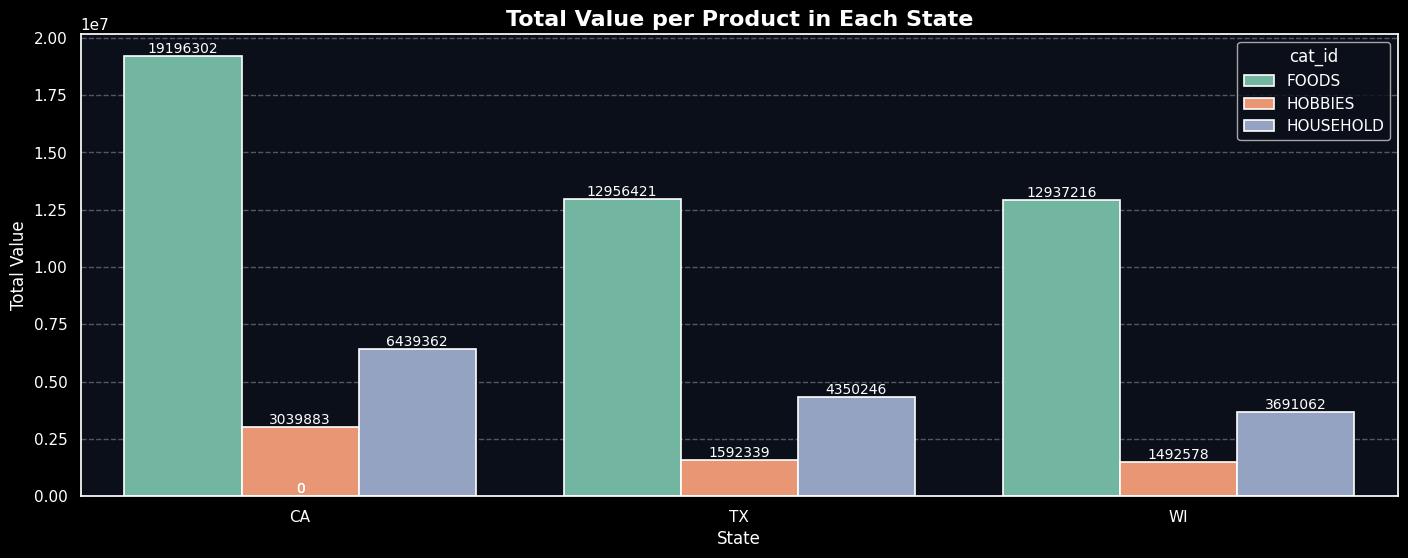

In [10]:

df_melted = df.melt(
    id_vars=["state_id", "cat_id"], 
    value_vars=df.columns[6:], 
    value_name="value"
)


agg_df = df_melted.groupby(["state_id", "cat_id"])["value"].sum().reset_index()


plt.figure(figsize=(17,6))
plt.rcParams['axes.facecolor'] = '#0b0f1a'
plt.rcParams['figure.facecolor'] = '#0b0f1a'


sns.barplot(
    data=agg_df, 
    x="state_id", 
    y="value", 
    hue="cat_id", 
    palette="Set2", 
    edgecolor="white", 
    linewidth=1.2
)
plt.title("Total Value per Product in Each State", fontsize=16, fontweight='bold', color='white')
plt.xlabel("State", fontsize=12, color='white')
plt.ylabel("Total Value", fontsize=12, color='white')


ax = plt.gca()
for p in ax.patches:
    ax.annotate(int(p.get_height()), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', color='white', fontsize=10)


plt.grid(axis='y', linestyle='--', alpha=0.3, color='white')

plt.show()


# HOBBIES 

<table style="width:60%; margin:auto; border-collapse:collapse; font-family:Arial; background:#111; color:white;">
  <thead>
    <tr style="background:#222;">
      <th style="padding:10px; border:1px solid #444;">Category</th>
      <th style="padding:10px; border:1px solid #444;">Description</th>
      <th style="padding:10px; border:1px solid #444;">Examples</th>
      <th style="padding:10px; border:1px solid #444;">Number of Items</th>
    </tr>
  </thead>
  <tbody>
    <tr style="background:#0d47a1;">
      <td style="padding:10px; border:1px solid #444;">HOBBIES</td>
      <td style="padding:10px; border:1px solid #444;">Non-food recreational items</td>
      <td style="padding:10px; border:1px solid #444;">Toys, games, sports equipment, entertainment items</td>
      <td style="padding:10px; border:1px solid #444;">5,650</td>
    </tr>
  </tbody>
</table>


# Find the largest number in days and outliers and display them

In [15]:

outlier_counts = {}

for col in day.columns:
    Q1 = day[col].quantile(0.25)
    Q3 = day[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = day[(day[col] < lower_bound) | (day[col] > upper_bound)]
    outlier_counts[col] = outliers.shape[0]


outlier_df = (
    pd.DataFrame.from_dict(outlier_counts, orient="index", columns=["outlier_count"])
      .sort_values("outlier_count", ascending=False)
)

outlier_df.iloc[:10] 


,outlier_count
d_482,7614
d_374,7613
d_440,7608
d_370,7605
d_642,7593
d_64,7587
d_405,7584
d_480,7583
d_432,7578
d_468,7573


In [16]:
outlier_max = {}

for col in day.columns:
    Q1 = day[col].quantile(0.25)
    Q3 = day[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = day[col][(day[col] < lower) | (day[col] > upper)]

    if not outliers.empty:
        outlier_max[col] = outliers.max()
outlier_max_df = (
    pd.DataFrame.from_dict(outlier_max, orient="index", columns=["max_outlier"])
    .sort_values("max_outlier", ascending=False)
)

outlier_max_df.head(10)
  

,max_outlier
d_960,763
d_959,709
d_938,709
d_337,693
d_511,648
d_98,634
d_329,633
d_908,626
d_957,620
d_330,619


In [17]:
out_max=outlier_max_df.iloc[:20]
out_max = day[out_max.index]
out_max.head()


,d_960,d_959,d_938,d_337,d_511,d_98,d_329,d_908,d_957,d_330,d_958,d_992,d_1116,d_859,d_947,d_336,d_1288,d_299,d_962,d_696
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,2,1,0,1,0,0,0,0,0,0,1,0,0,3
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,1,0,0,1,0,3,0,1,1,4,4,0,1,1,1,2,1,0,0
4,1,2,0,0,0,0,8,0,1,0,0,1,1,1,3,0,3,1,2,4


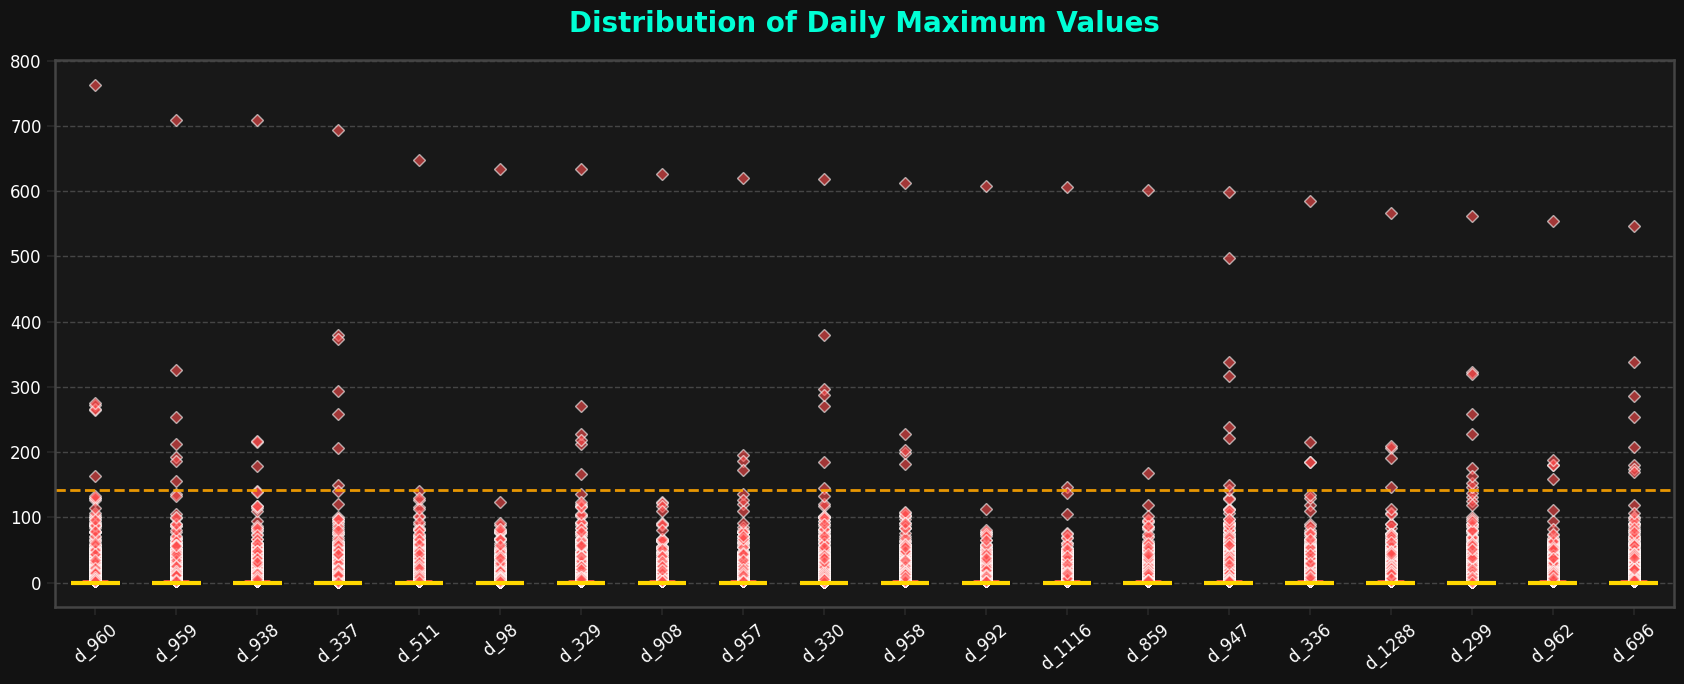

In [18]:
day_1_20 = out_max

plt.close("all")

# ---------- STYLE ----------
sns.set_theme(style="ticks")
plt.rcParams["font.family"] = "DejaVu Sans"

fig, ax = plt.subplots(figsize=(17, 7))
fig.patch.set_facecolor("#121212")
ax.set_facecolor("#181818")

# ---------- COLORS ----------
palette_colors = sns.color_palette("icefire", n_colors=day_1_20.shape[1])

# ---------- BOXPLOT ----------
sns.boxplot(
    data=day_1_20,
    palette=palette_colors,
    width=0.6,
    linewidth=2,
    fliersize=6,
    boxprops=dict(alpha=0.85),
    medianprops=dict(color="#FFD700", linewidth=3),
    whiskerprops=dict(color="#00FFFF", linewidth=2),
    capprops=dict(color="#FF4C4C", linewidth=2),
    flierprops=dict(marker='D', markerfacecolor="#FF4C4C",
                    markeredgecolor="white", alpha=0.6)
)

# ---------- GRID ----------
ax.yaxis.grid(True, linestyle="--", alpha=0.25)
ax.xaxis.grid(False)

# ---------- TICKS ----------
plt.xticks(rotation=40, fontsize=12, color="white")
plt.yticks(fontsize=12, color="white")

# ---------- TITLE ----------
ax.set_title(
    "Distribution of Daily Maximum Values",
    fontsize=20,
    fontweight="bold",
    color="#00FFD5",
    pad=20
)

# ---------- SPINES ----------
for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_color("#444444")
    spine.set_linewidth(1.8)

# ---------- SHADOW EFFECT ----------
for patch in ax.artists:
    patch.set_edgecolor("black")


plt.axhline(
    y=142,
    color="orange",
    linestyle="--",
    linewidth=2,
    alpha=0.9
)

plt.tight_layout()
plt.show()


 # Finding the largest number of outliers and displaying them in a box plot

In [19]:
out=outlier_df.iloc[:20]
out = day[out.index]
out.head()


,d_482,d_374,d_440,d_370,d_642,d_64,d_405,d_480,d_432,d_468,d_481,d_378,d_635,d_404,d_392,d_410,d_438,d_364,d_218,d_444
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,2,0,0,1,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,2,0,1,0,0,1,1,2,0,2,0,0,2,0,2,0,2,0,1
4,0,3,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


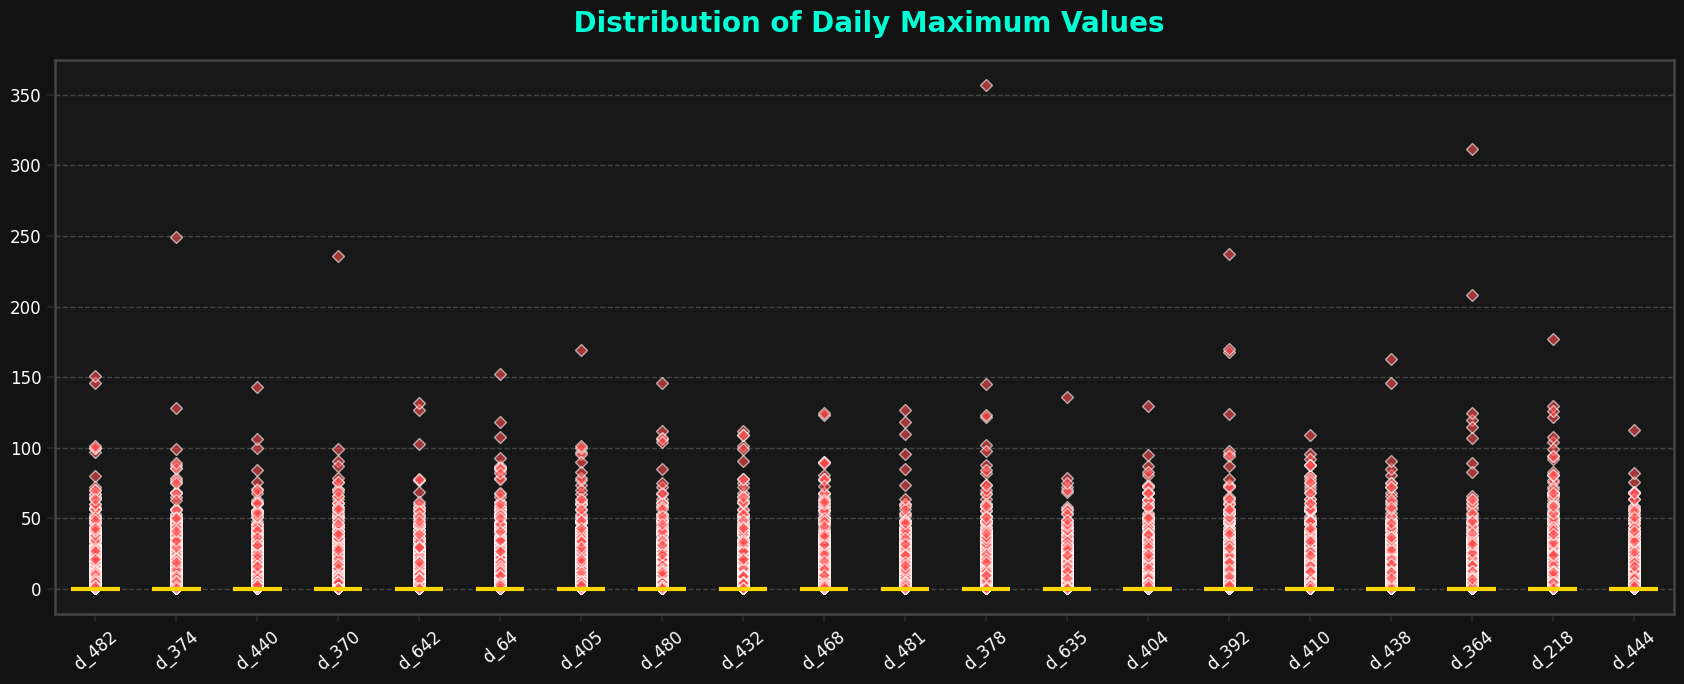

In [20]:
day_1_20 = out

plt.close("all")

# ---------- STYLE ----------
sns.set_theme(style="ticks")
plt.rcParams["font.family"] = "DejaVu Sans"

fig, ax = plt.subplots(figsize=(17, 7))
fig.patch.set_facecolor("#121212")
ax.set_facecolor("#181818")

# ---------- COLORS ----------
palette_colors = sns.color_palette("icefire", n_colors=day_1_20.shape[1])

# ---------- BOXPLOT ----------
sns.boxplot(
    data=day_1_20,
    palette=palette_colors,
    width=0.6,
    linewidth=2,
    fliersize=6,
    boxprops=dict(alpha=0.85),
    medianprops=dict(color="#FFD700", linewidth=3),
    whiskerprops=dict(color="#00FFFF", linewidth=2),
    capprops=dict(color="#FF4C4C", linewidth=2),
    flierprops=dict(marker='D', markerfacecolor="#FF4C4C",
                    markeredgecolor="white", alpha=0.6)
)

# ---------- GRID ----------
ax.yaxis.grid(True, linestyle="--", alpha=0.25)
ax.xaxis.grid(False)

# ---------- TICKS ----------
plt.xticks(rotation=40, fontsize=12, color="white")
plt.yticks(fontsize=12, color="white")

# ---------- TITLE ----------
ax.set_title(
    " Distribution of Daily Maximum Values",
    fontsize=20,
    fontweight="bold",
    color="#00FFD5",
    pad=20
)

# ---------- SPINES ----------
for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_color("#444444")
    spine.set_linewidth(1.8)

# ---------- SHADOW EFFECT ----------
for patch in ax.artists:
    patch.set_edgecolor("black")

plt.tight_layout()
plt.show()


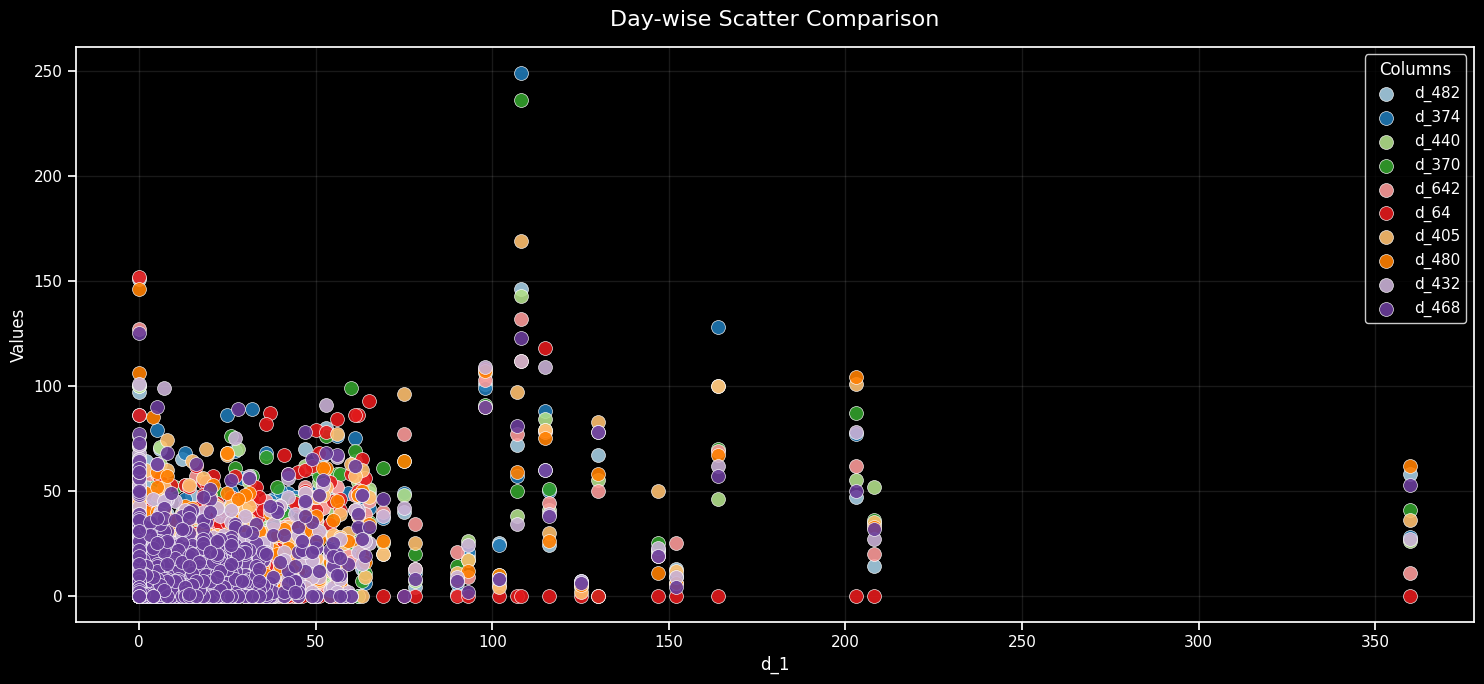

In [21]:

plt.style.use("dark_background")

fig, ax = plt.subplots(figsize=(15, 7))
fig.patch.set_facecolor("black")
ax.set_facecolor("black")



colors = sns.color_palette("Paired", n_colors=10)

for i, col in enumerate(out.iloc[:, :10]):
    sns.scatterplot(
        x=day["d_1"],
        y=day[col],
        s=100,
        color=colors[i],  
        label=col,
        edgecolor="white",
        linewidth=0.5,
        alpha=0.9,
        ax=ax,
    )


ax.set_title("Day-wise Scatter Comparison", fontsize=16, color="white", pad=15)
ax.set_xlabel("d_1", fontsize=12, color="white")
ax.set_ylabel("Values", fontsize=12, color="white")

ax.tick_params(colors="white")
ax.legend(
    title="Columns",
    facecolor="black",
    edgecolor="white",
    labelcolor="white"
)
plt.grid(alpha=0.1)
plt.tight_layout()
plt.show()


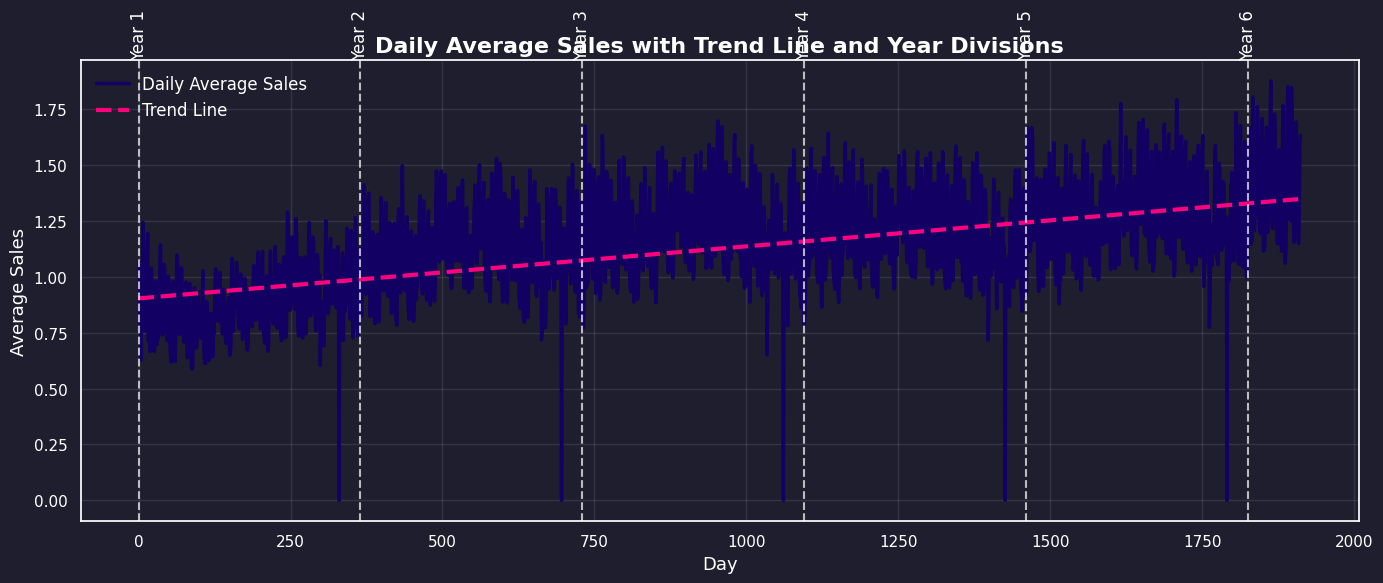

In [22]:

sns.set_style("darkgrid") 

d_cols = [col for col in df.columns if col.startswith("d_")]
daily_mean = df[d_cols].mean().values
x = np.arange(len(daily_mean))


slope, intercept = np.polyfit(x, daily_mean, 1)
trend_line = slope * x + intercept


bg_color = "#1e1e2f"  
line_color = "#120062" 
trend_color = "#ff007f" 
year_line_color = "#ffffff"

plt.figure(figsize=(14,6), facecolor=bg_color)
plt.gca().set_facecolor(bg_color)  

plt.plot(x, daily_mean, label="Daily Average Sales", color=line_color, linewidth=2.5)


plt.plot(x, trend_line, color=trend_color, linestyle="--", linewidth=3, label="Trend Line")


for day in range(0, len(daily_mean), 365):
    plt.axvline(day, color=year_line_color, linestyle='--', alpha=0.7)
    plt.text(day, max(daily_mean)*1.05, f'Year {day//365 + 1}', 
             rotation=90, verticalalignment='bottom', horizontalalignment='center', fontsize=12, color=year_line_color)


plt.title("Daily Average Sales with Trend Line and Year Divisions", fontsize=16, fontweight='bold', color="white")
plt.xlabel("Day", fontsize=13, color="white")
plt.ylabel("Average Sales", fontsize=13, color="white")


plt.grid(alpha=0.1, color="white")
plt.tick_params(colors='white')  

plt.legend(frameon=False, fontsize=12, facecolor=bg_color, labelcolor="white")

plt.tight_layout()
plt.show()
